In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df= pd.read_csv('Cardiotocographic.csv')
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [20]:
df.shape

(2126, 14)

In [21]:
df.isnull()

LB     AC     FM     UC     DL     DS     DP   ASTV   MSTV   ALTV  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2121  False  False  False  False  False  False  False  False  False  False   
2122  False  False  False  False  False  False  False  False  False  False   
2123  False  False  False  False  False  False  False  False  False  False   
2124  False  False  False  False  False  False  False  False  False  False   
2125  False  False  False  False  False  False  False  False  False  False   

       MLTV  Width  Tendency    NSP  
0     False  False     False  False  
1     False  False     False  False  
2     False  False     False  False  
3     False  False     False  False  
4     False  False     False  False  
...     ...    ...       ...    ...  
2121  False  False     False  False  
2122  False  False     False  False  
2123  False  False     False  False  
2124  False  False     False  False  
2125  False  False     False  False  

[2126 rows x 14 columns]

In [22]:
#finding missing values
missing_values= df.isnull().sum()
missing_values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [25]:
# prompt: drop missing values rows from the df

df.dropna(inplace=True)

In [26]:
df.shape

(2105, 14)

In [27]:
#imputation


# Check for columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]
len(columns_with_missing_values)

0

In [28]:
# If there are columns with missing values, impute them
if len(columns_with_missing_values) > 0:
  for column in columns_with_missing_values:
    # Choose an appropriate imputation strategy based on the data type of the column
    if df[column].dtype == np.float64 or df[column].dtype == np.int64:
      # Impute missing values with the mean of the column
      df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == np.object:
      # Impute missing values with the most frequent value of the column
      df[column].fillna(df[column].mode()[0], inplace=True)
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2105 rows x 14 columns]

In [29]:
#Removing Outliers

numerical_columns = df.select_dtypes(include=[np.number]).columns

# Loop through numerical columns and detect outliers using the interquartile range (IQR) method
for column in numerical_columns:
  # Calculate Q1, Q2, Q3
  Q1 = df[column].quantile(0.25)
  Q2 = df[column].quantile(0.5)
  Q3 = df[column].quantile(0.75)


print(numerical_columns)
print(Q1)
print(Q2)
print(Q3)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')
1.0
1.0
1.0


In [30]:
# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[column] < lower_bound) | (df[column] > upper_bound)


df[column] = df[column].mask(outliers, df[column].median())

df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency  NSP  
0      0.5  43.000000   2.4   64.0  0.999926  1.0  
1      2.1   0.000000  10.4  130.0  0.000000  1.0  
2      2.1   0.000000  13.4  130.0  0.000000  1.0  
3      2.4   0.000000  23.0  117.0  1.000000  1.0  
4      2.4   0.000000  19.9  117.0  1.000000  1.0  
...    ...        ...   ...    ...       ...  ...  
2121   0.2  25.000000   7.2   40.0  0.000000  1.0  
2122   0.4  22.000000   7.1   66.0  1.000000  1.0  
2123   0.4  20.000000   6.1   67.0  1.000000  1.0  
2124   0.4  27.000000   7.0   66.0  1.000000  1.0  
2125   0.4  35.857183   5.0   42.0  0.000000  1.0  

[2105 rows x 14 columns]

In [31]:
df.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency     NSP  
count  2105.000000  2105.000000  2105.000000  2105.0  
mean      8.284887    70.429260     0.316371     1.0  
std       7.772858    42.931822     0.645622     0.0  
min     -50.700000  -174.000000    -3.000000     1.0  
25%       4.600000    37.000000     0.000000     1.0  
50%       7.400000    67.000000     0.000000     1.0  
75%      10.900000   100.000000     1.000000     1.0  
max     101.400000   357.000000     3.000000     1.0

In [32]:
#Variance for each variable

df.var(axis=0)


LB          1.270164e+02
AC          1.869389e-05
FM          4.606360e-03
UC          1.122027e-05
DL          1.120996e-05
DS          2.003229e-08
DP          7.052159e-07
ASTV        3.552372e+02
MSTV        1.376315e+00
ALTV        4.529279e+02
MLTV        6.041732e+01
Width       1.843141e+03
Tendency    4.168276e-01
NSP         0.000000e+00
dtype: float64

In [33]:
#standard deviation of each variable

df.std(axis=0)


LB          11.270154
AC           0.004324
FM           0.067870
UC           0.003350
DL           0.003348
DS           0.000142
DP           0.000840
ASTV        18.847737
MSTV         1.173164
ALTV        21.282102
MLTV         7.772858
Width       42.931822
Tendency     0.645622
NSP          0.000000
dtype: float64

In [34]:
#interquartile range of each variable

IQR = df.quantile(0.75) - df.quantile(0.25)
print(IQR)


LB          14.000000
AC           0.005650
FM           0.002554
UC           0.004698
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


In [36]:
#Highlights from the summary

#This dataset contains both numerical and categorical variables
#From the above, variance, standard deviation and interquartile range for each variable are high.
#Considering the zero values in some rows for variables we can say data is not distributed normally.

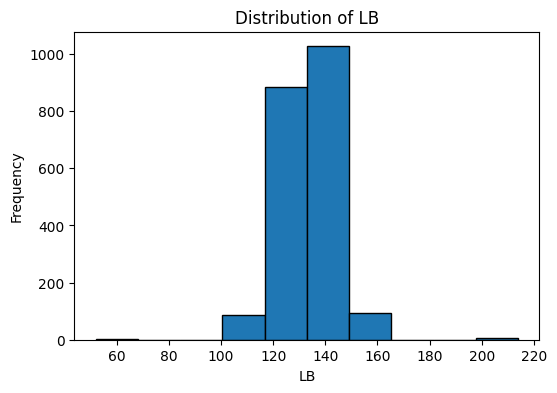

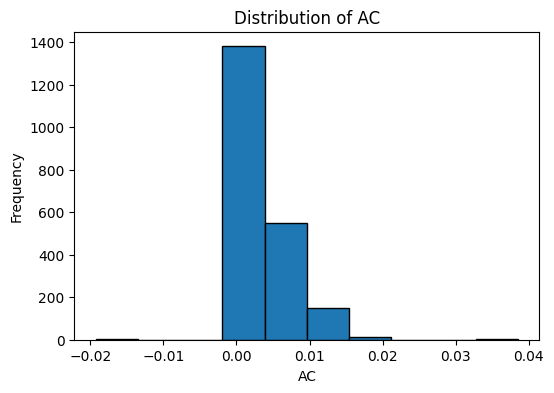

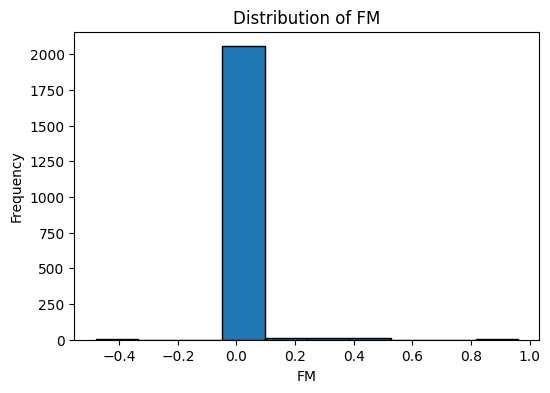

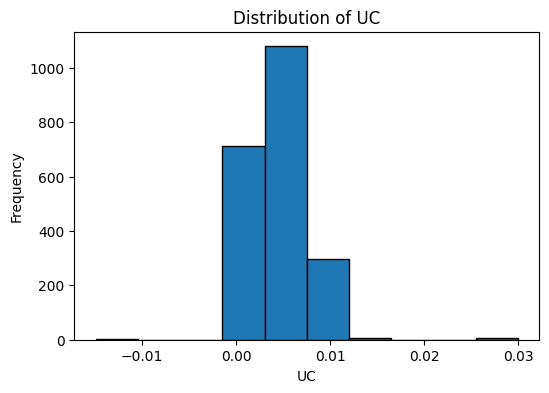

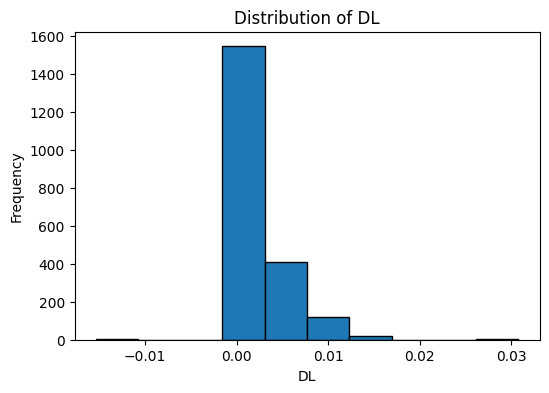

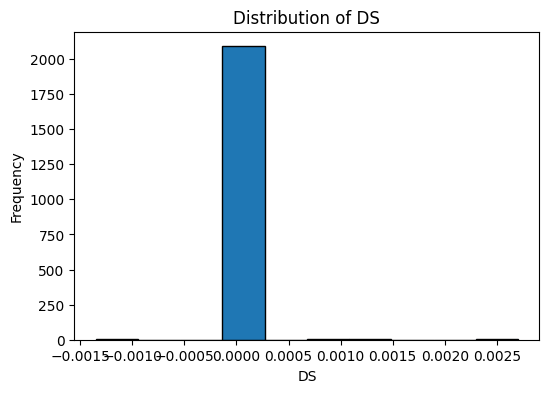

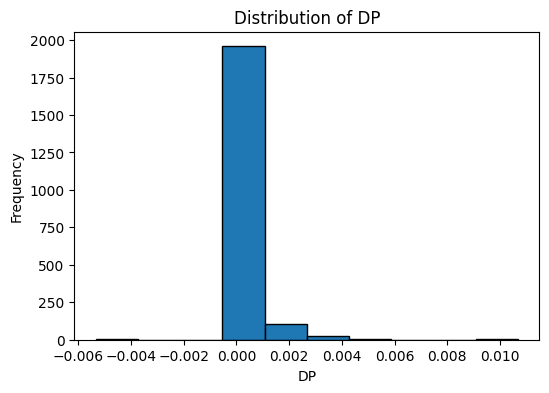

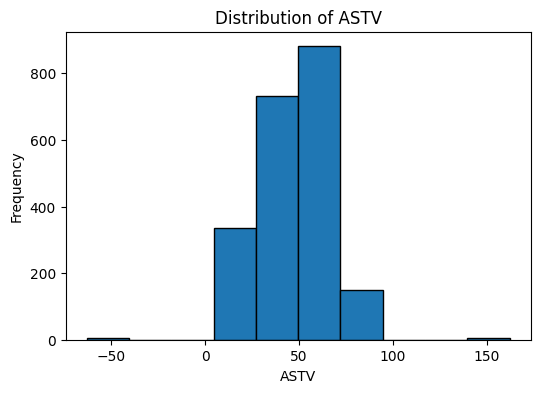

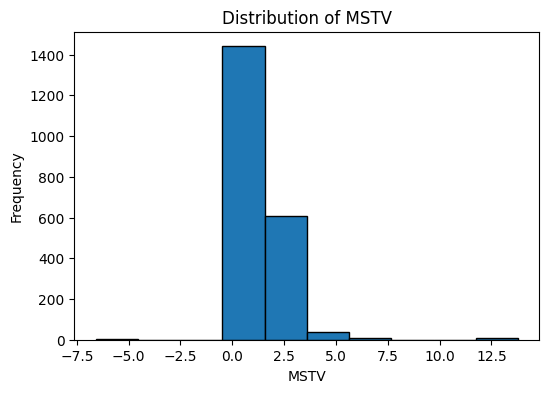

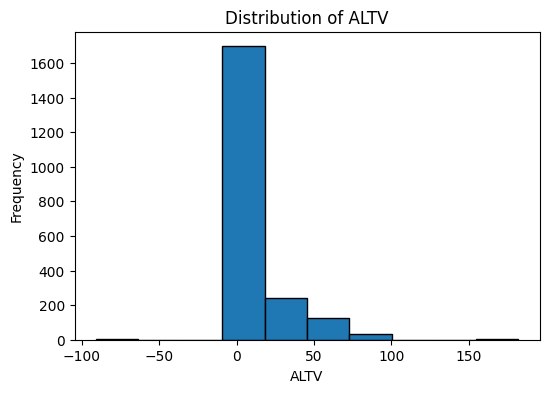

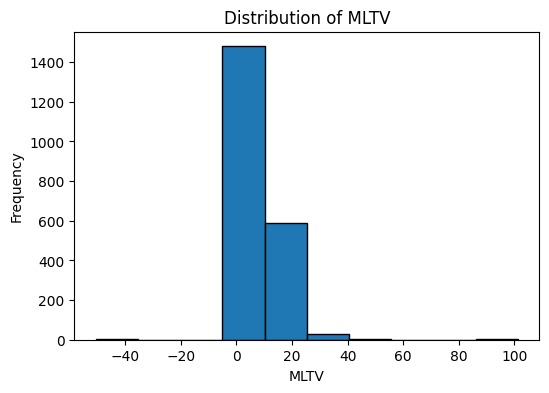

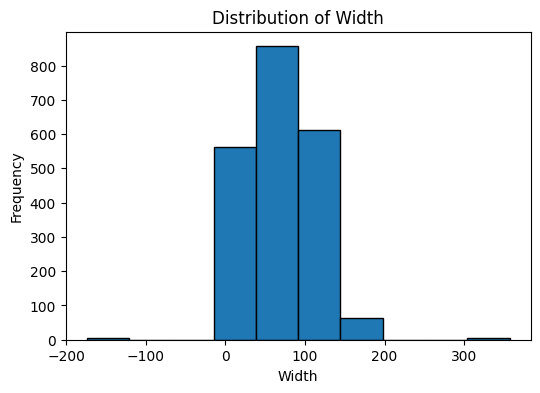

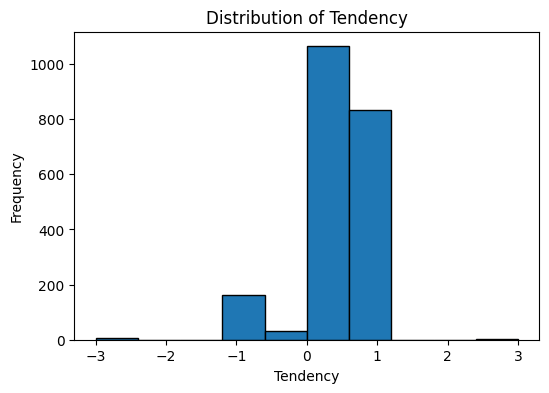

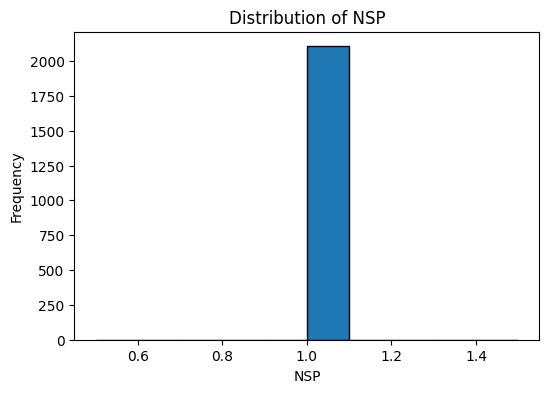

In [40]:
#Plotting histograms for numerical variables
for column in numerical_columns:
  plt.figure(figsize=(6,4))
  plt.hist(df[column], bins=10, edgecolor='black')
  plt.title("Distribution of "+ column)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()


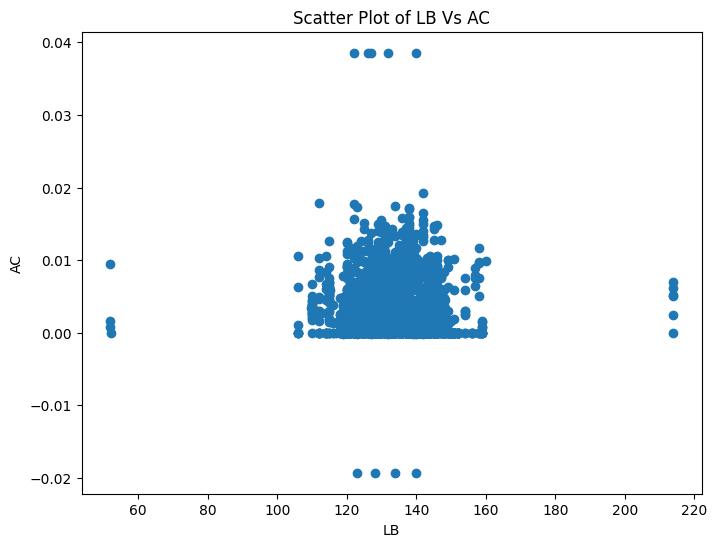

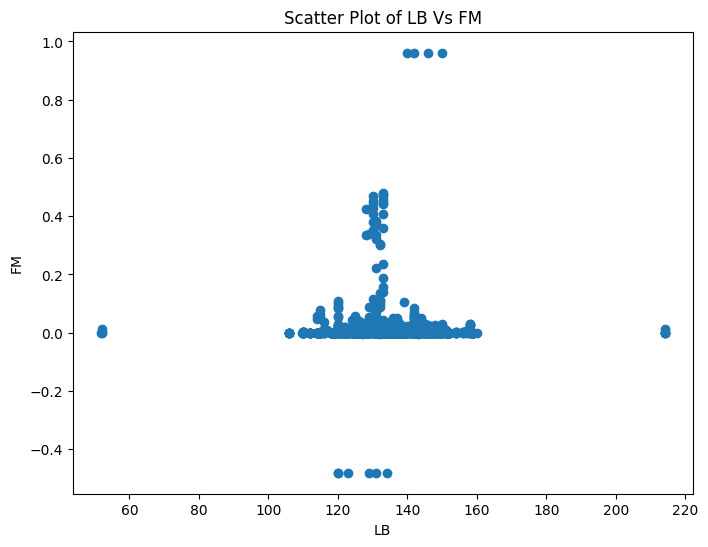

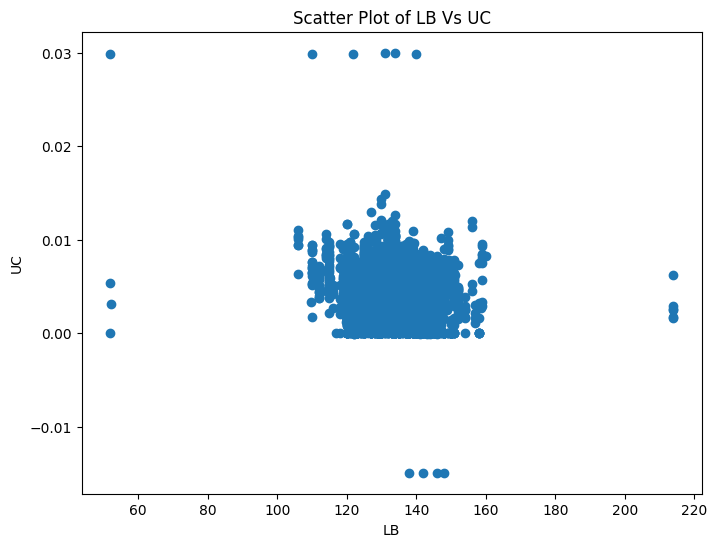

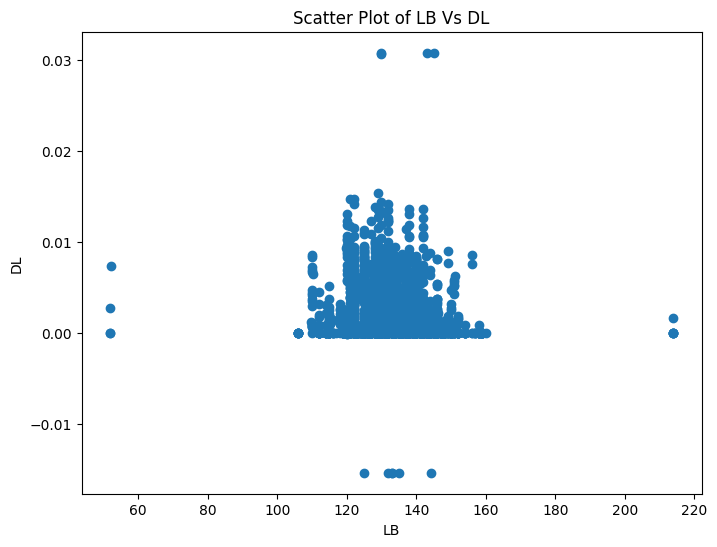

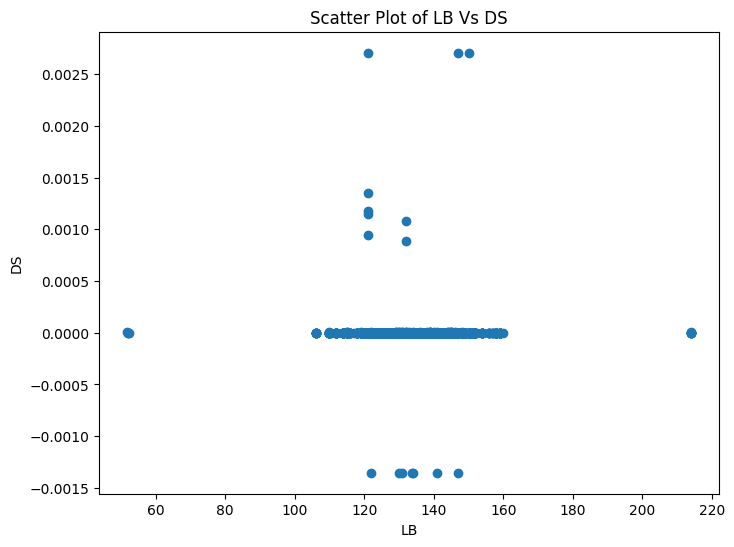

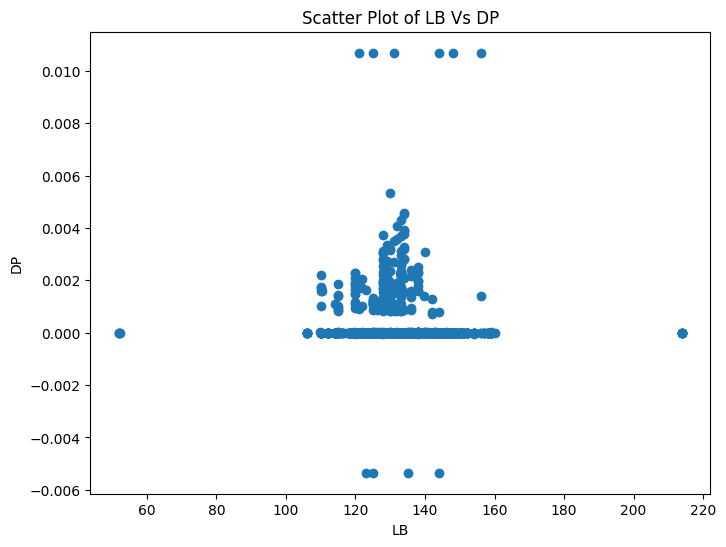

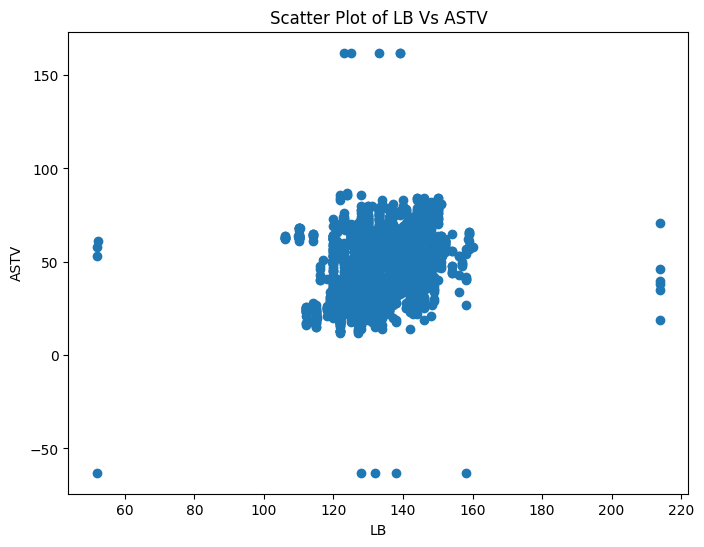

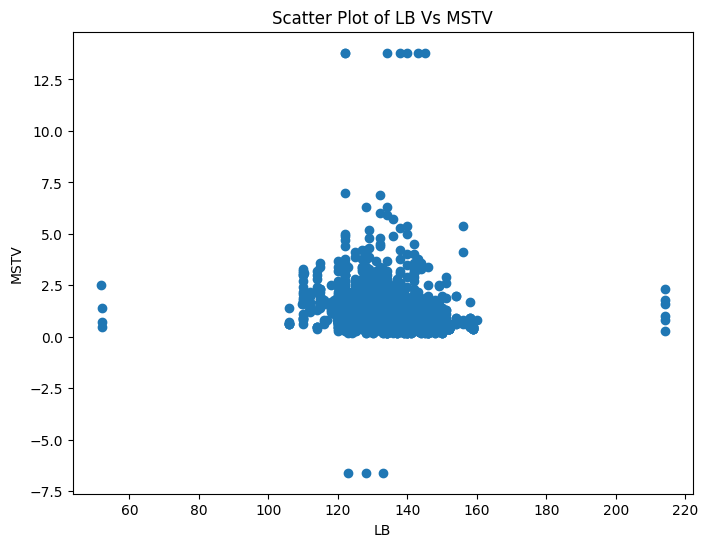

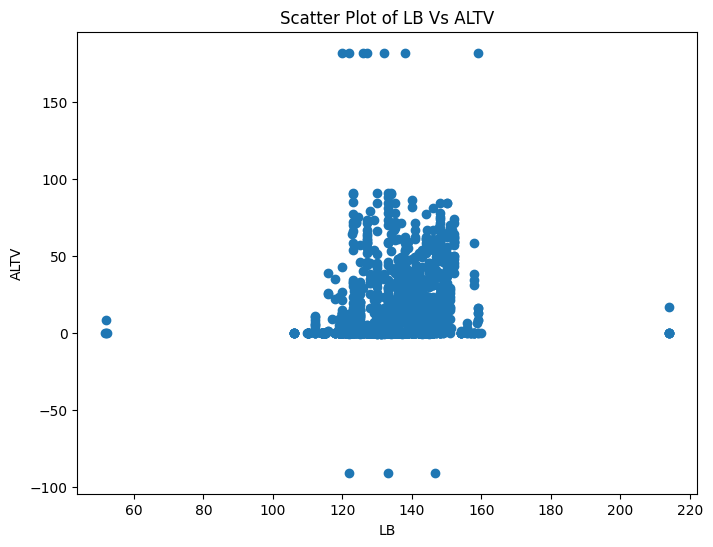

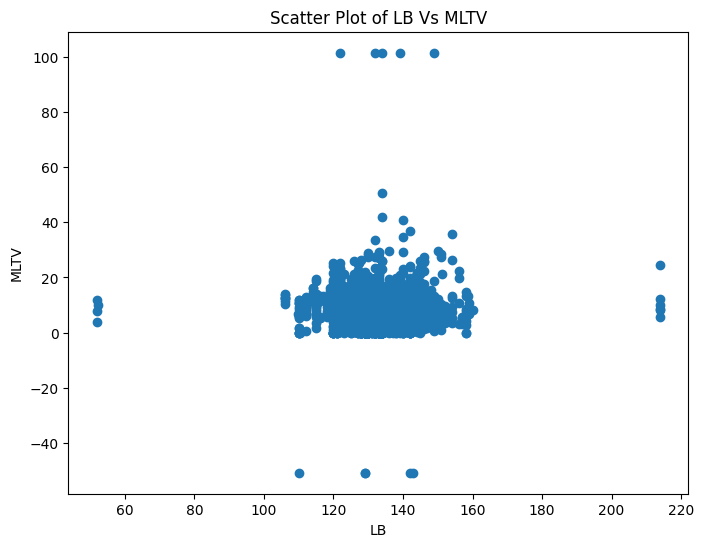

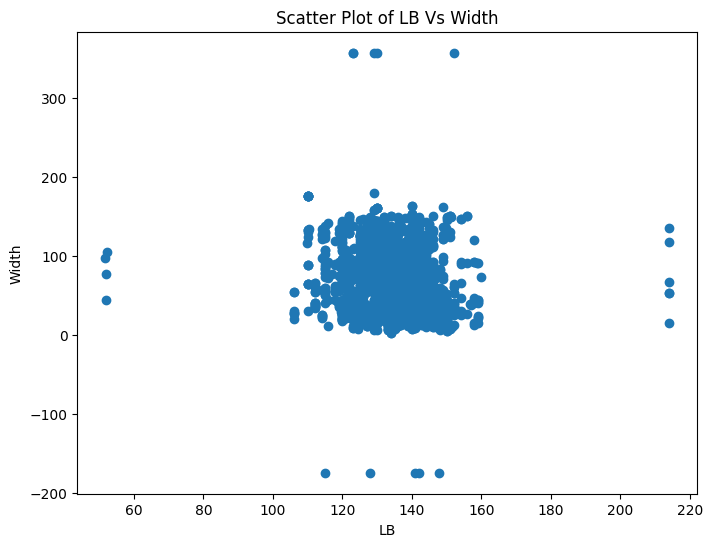

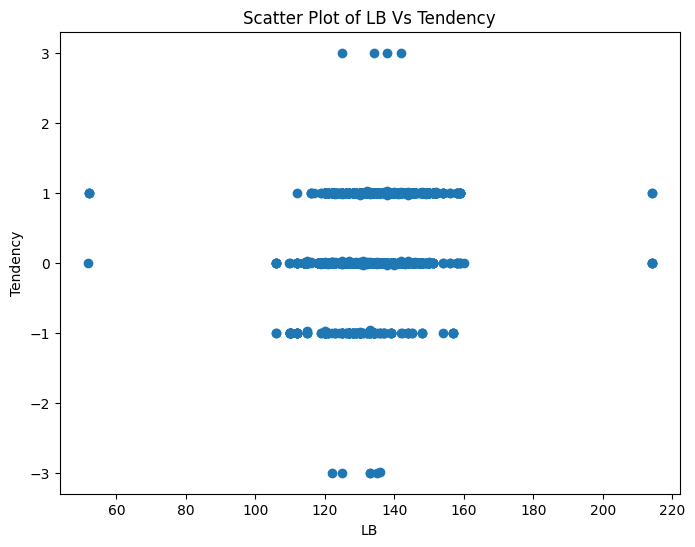

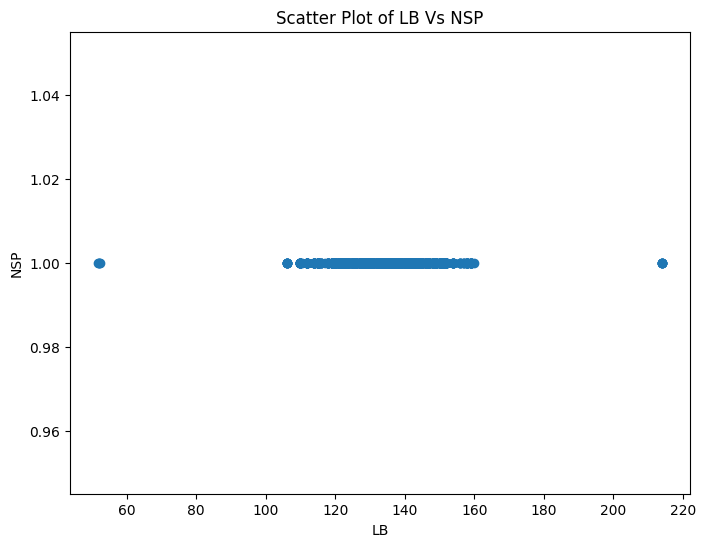

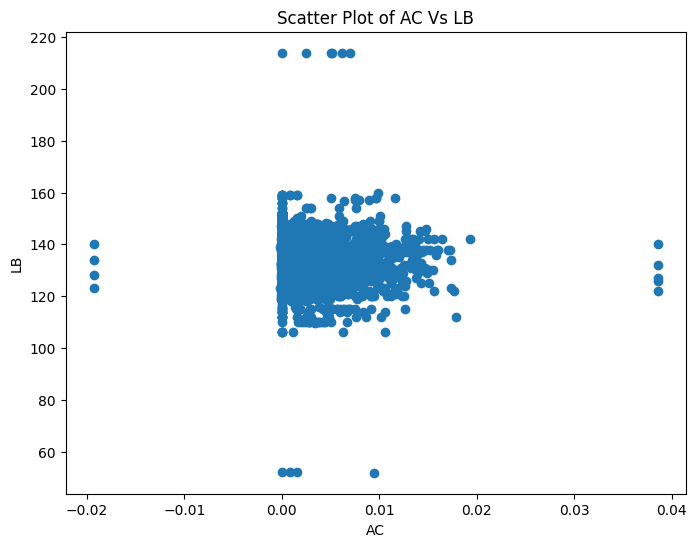

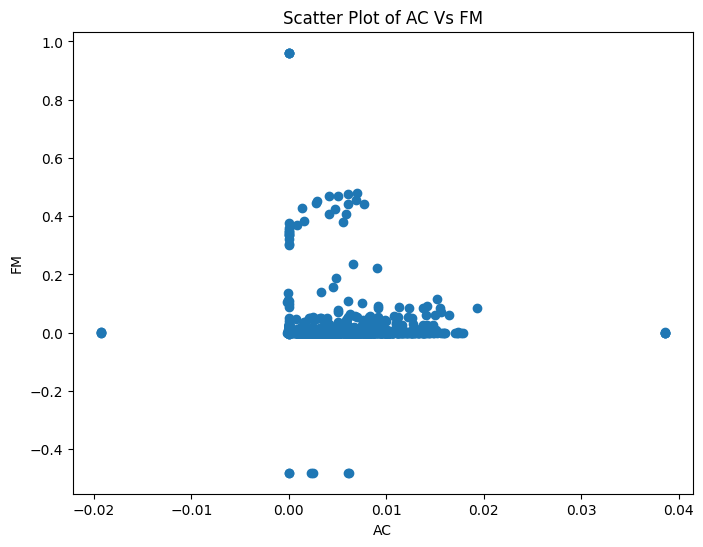

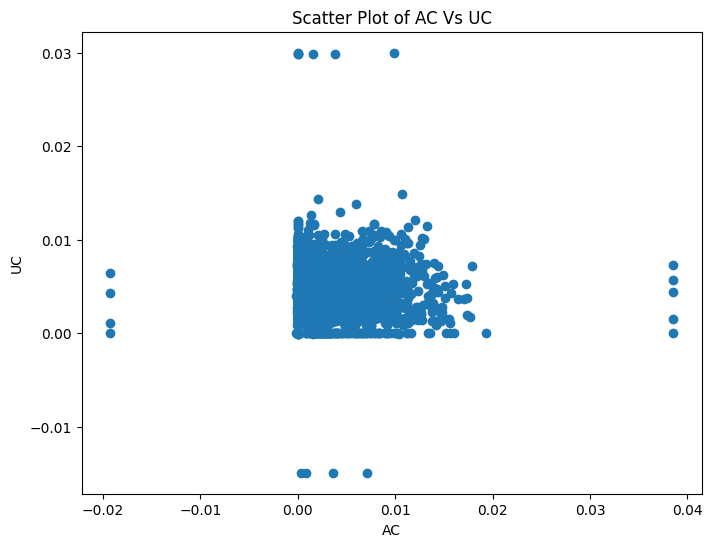

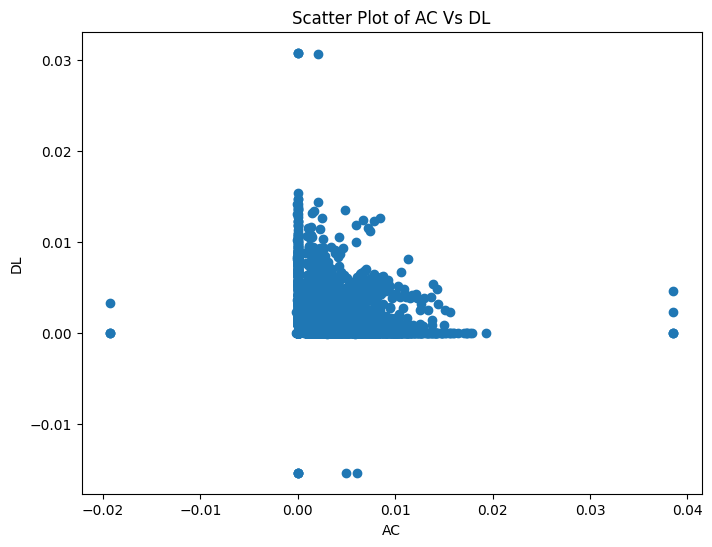

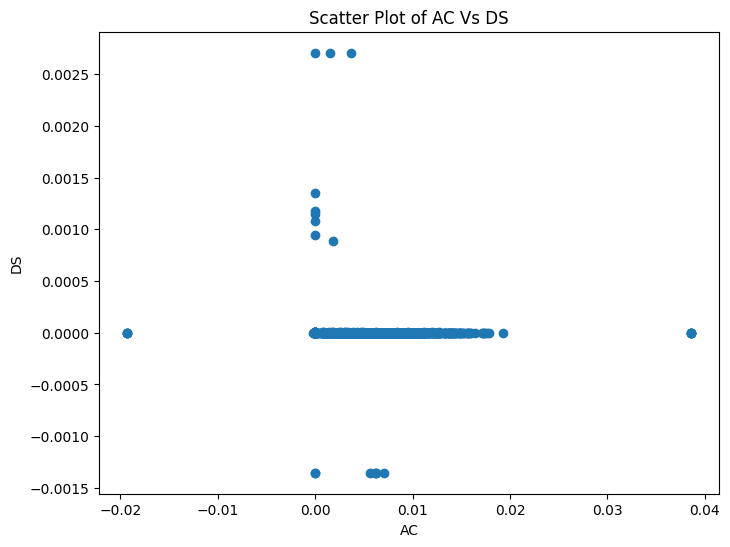

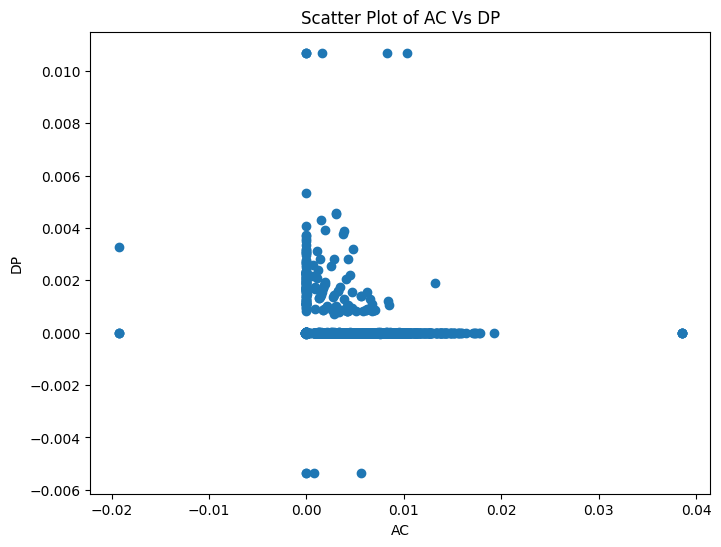

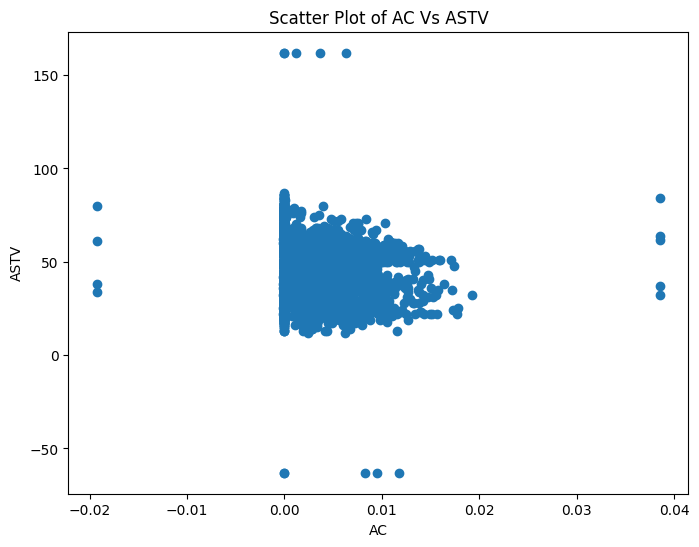

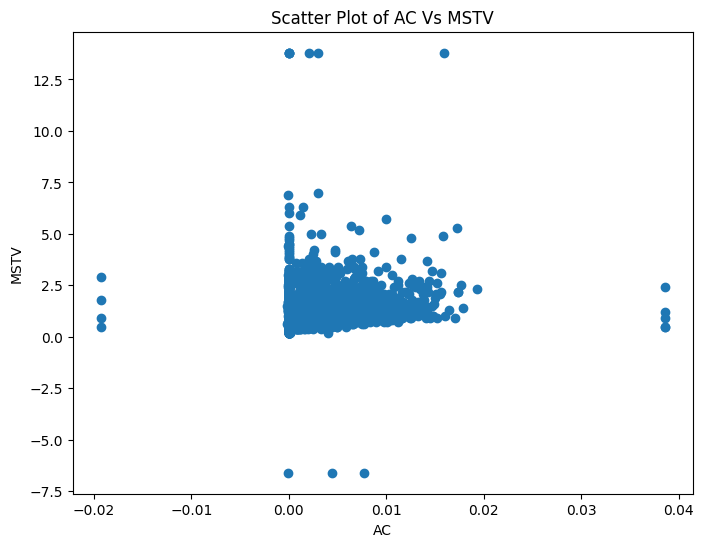

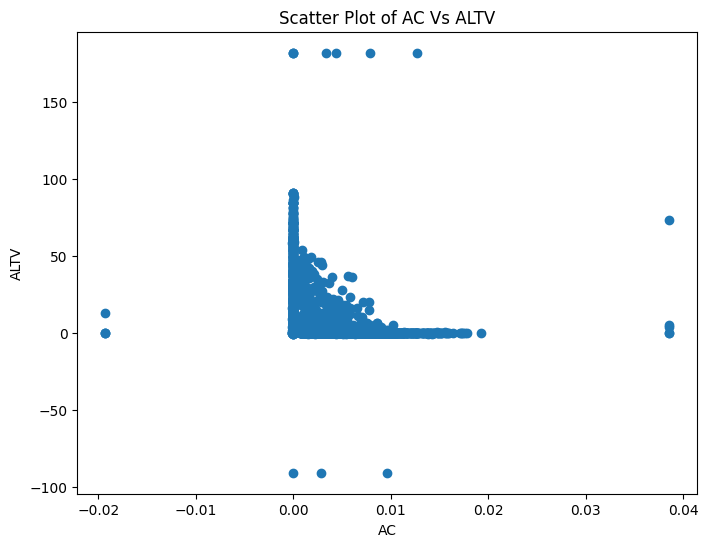

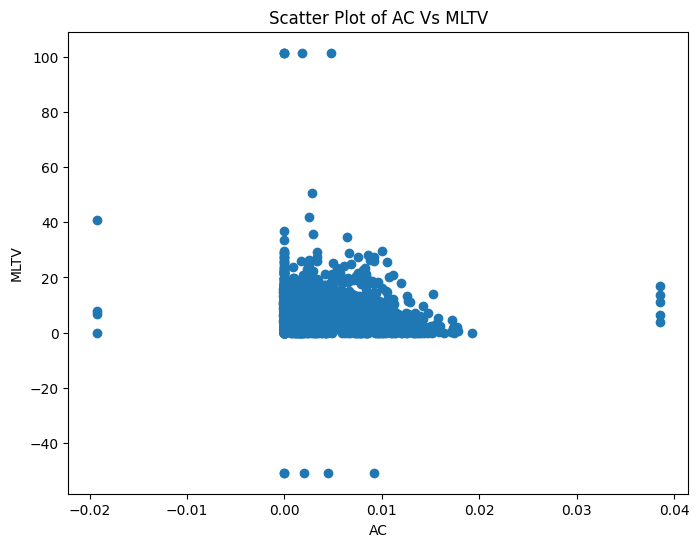

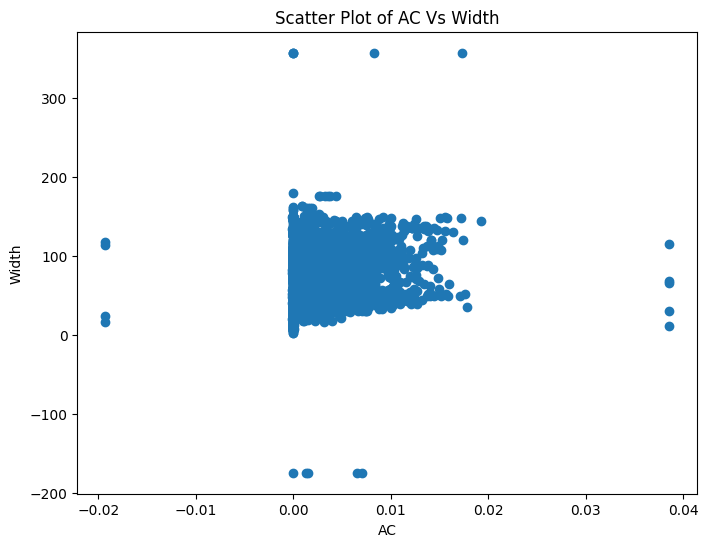

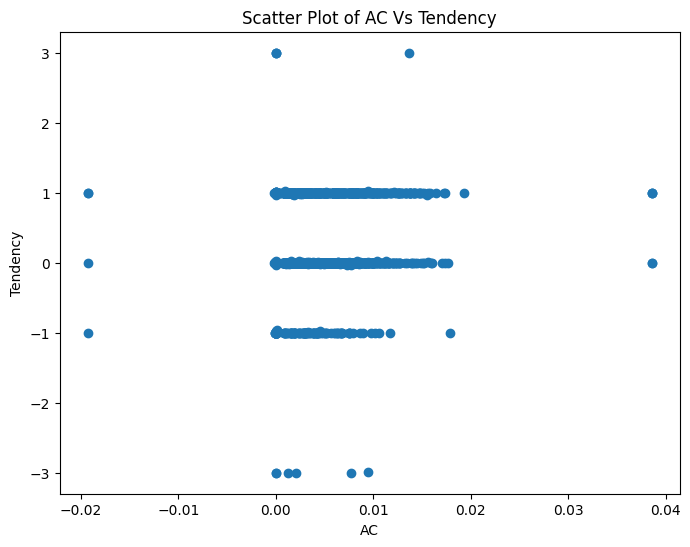

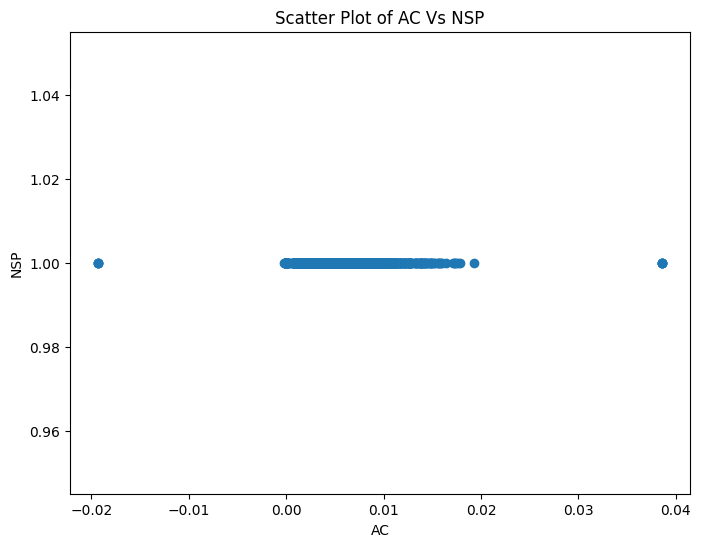

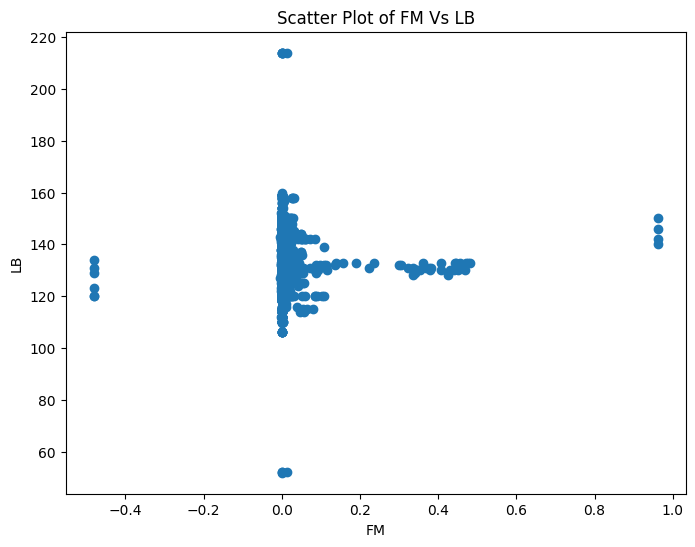

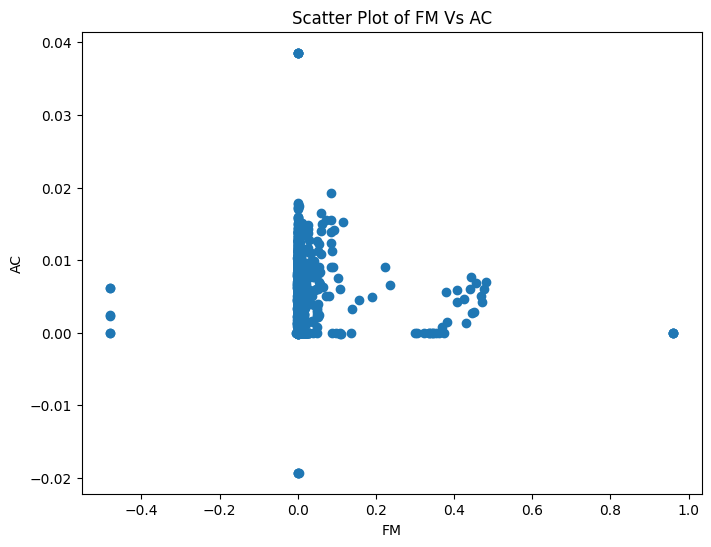

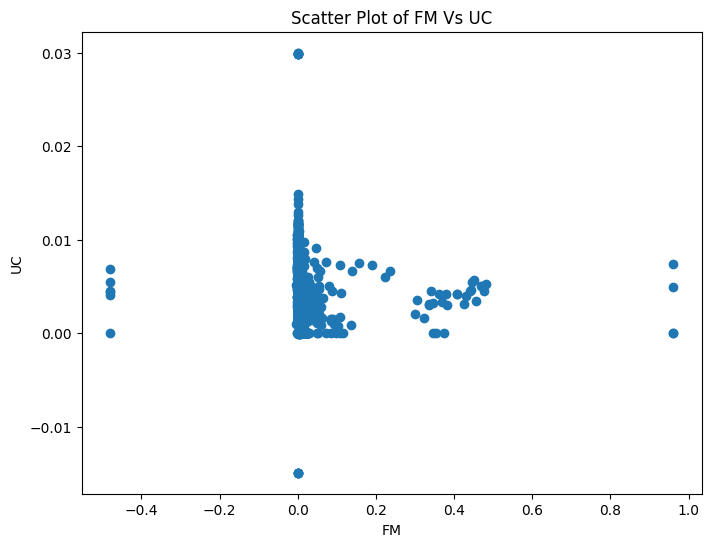

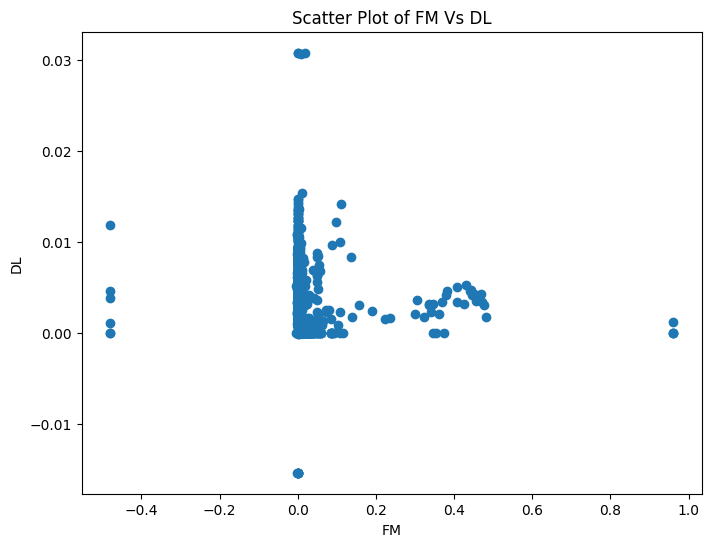

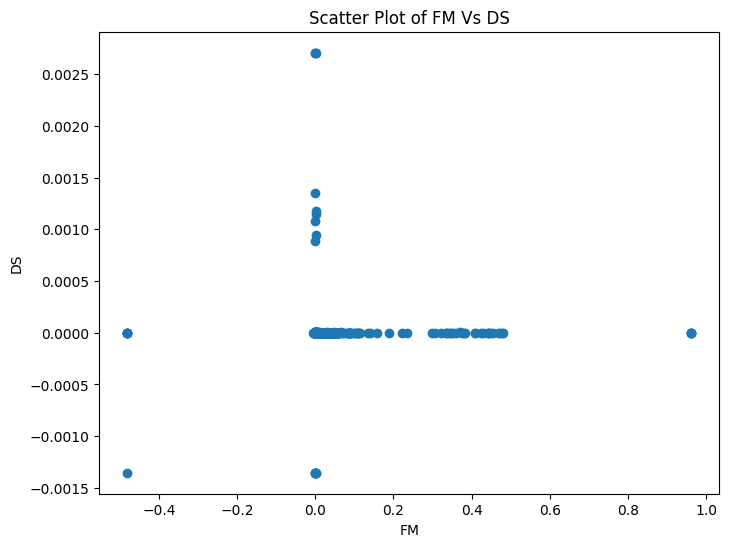

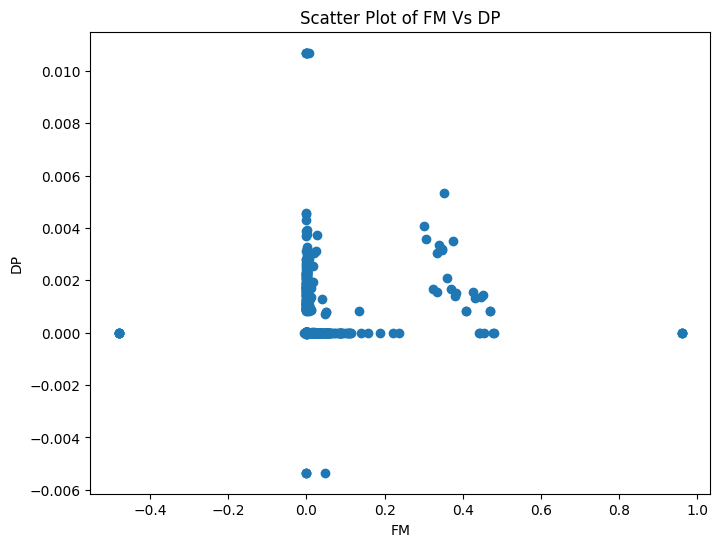

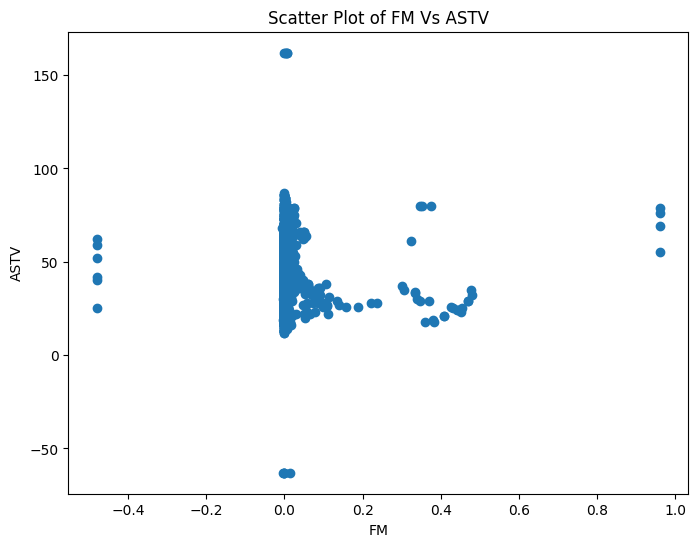

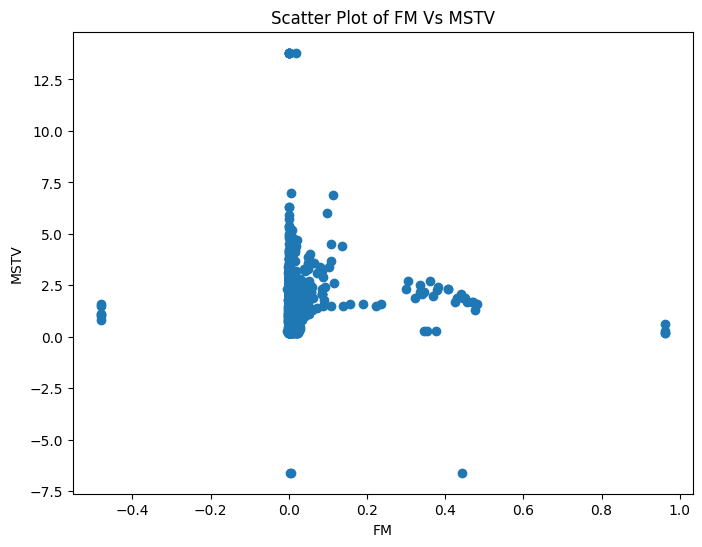

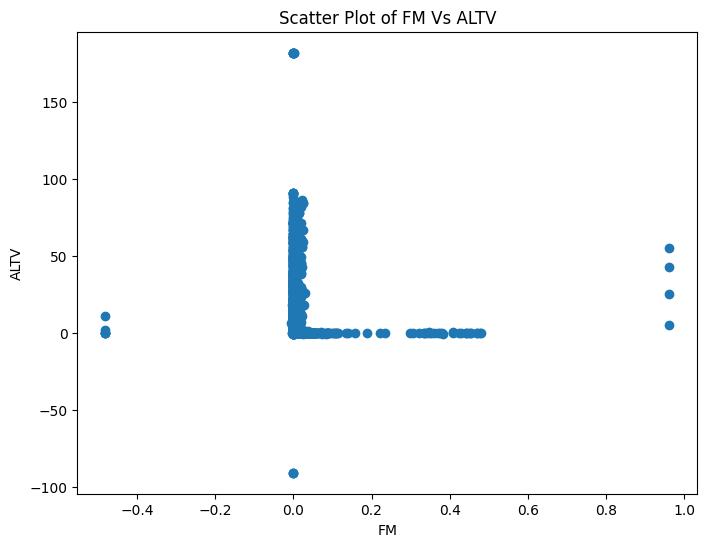

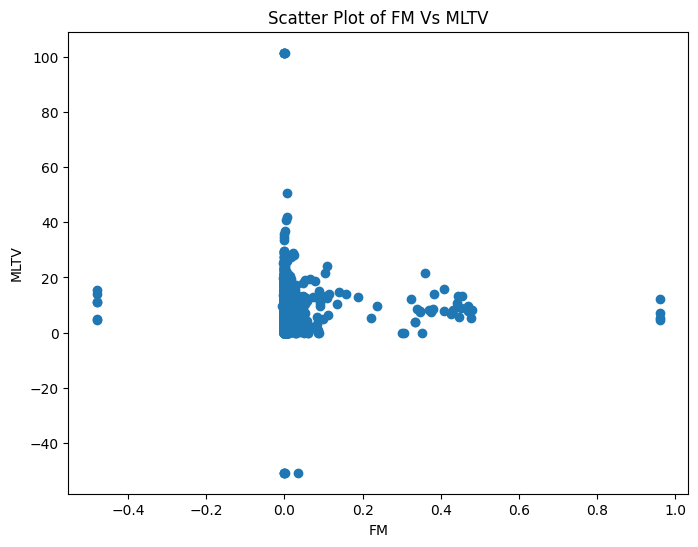

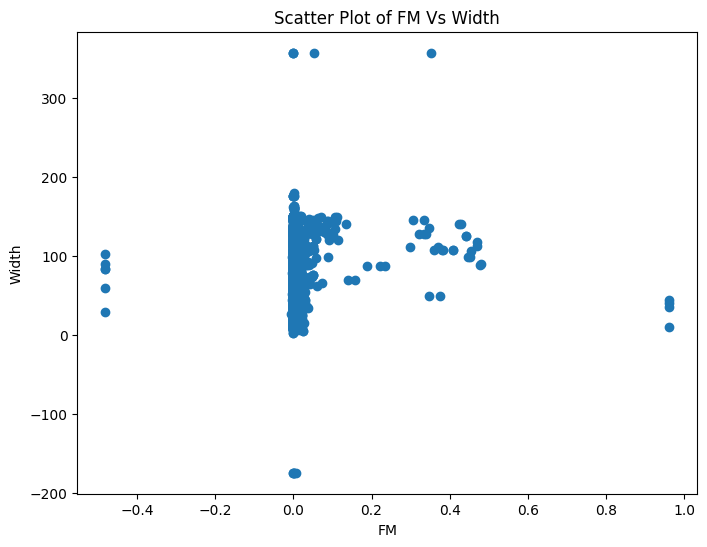

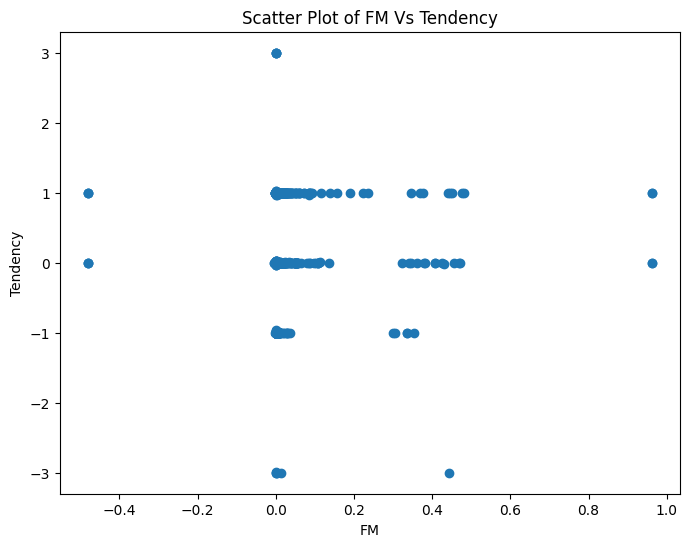

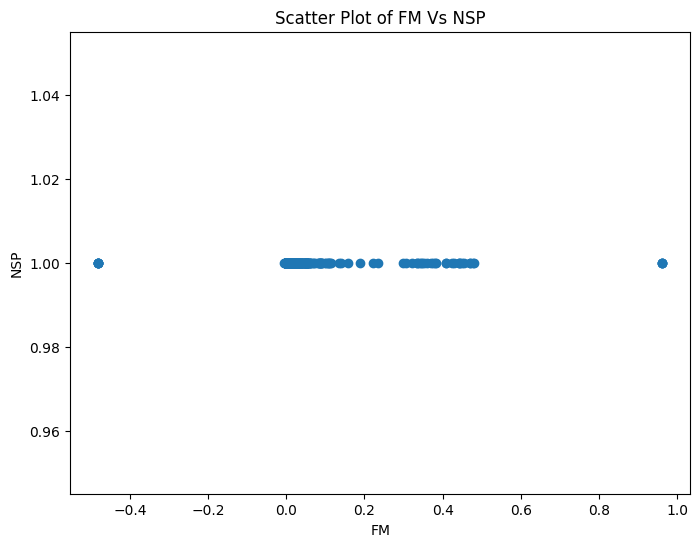

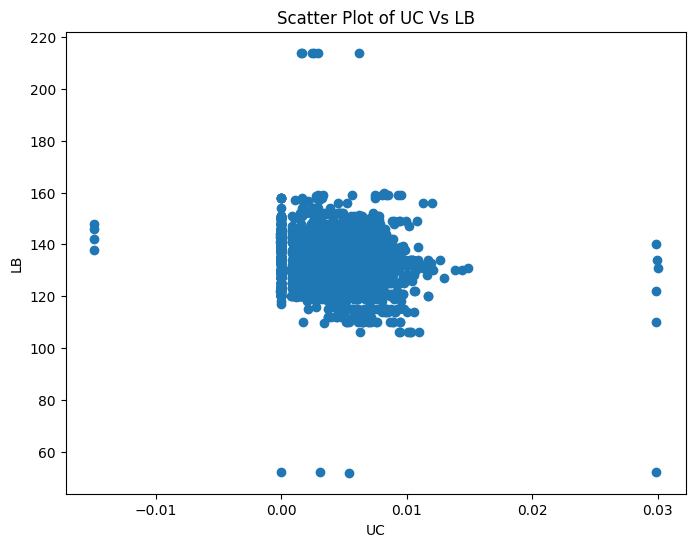

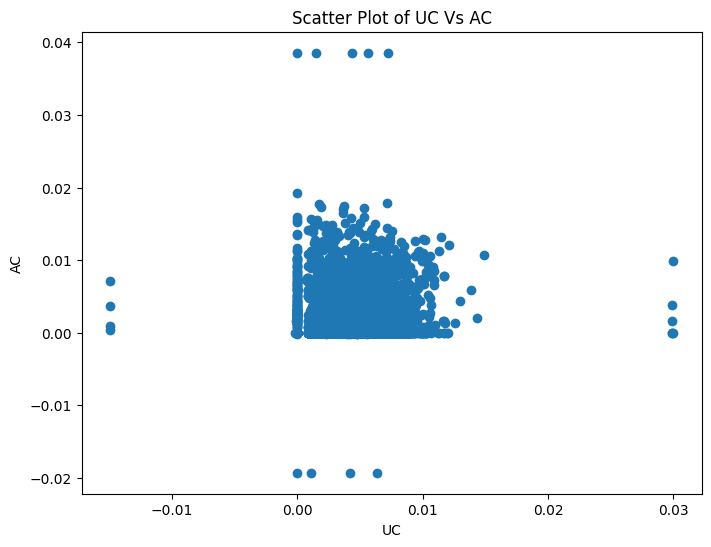

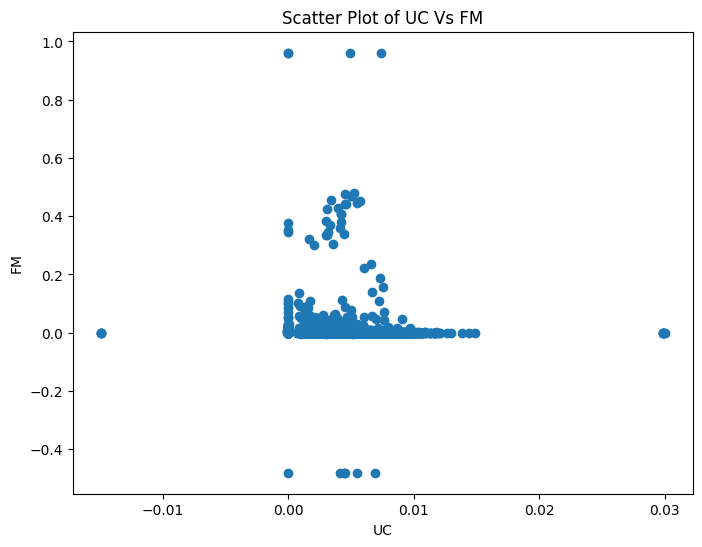

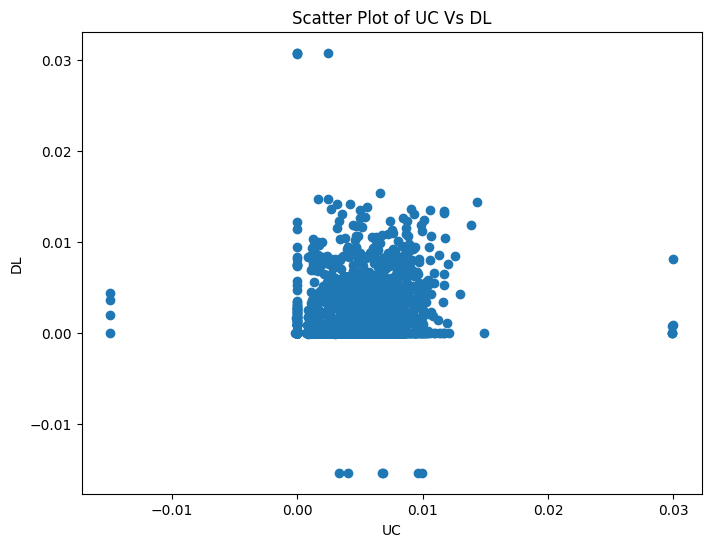

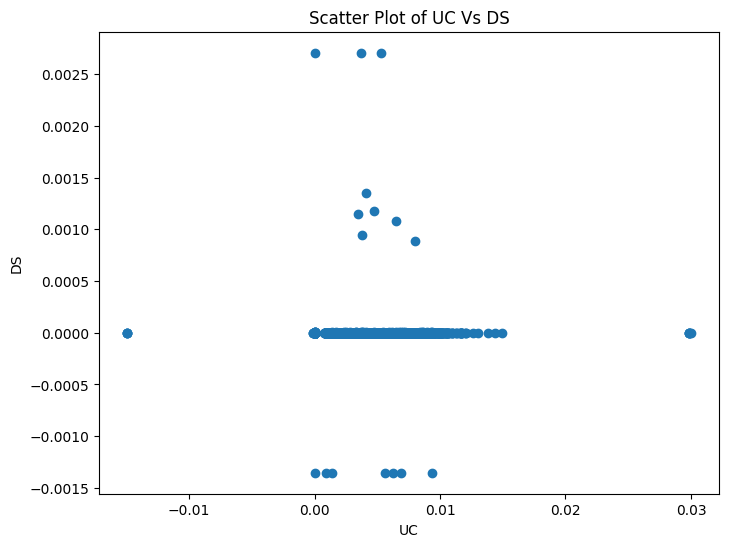

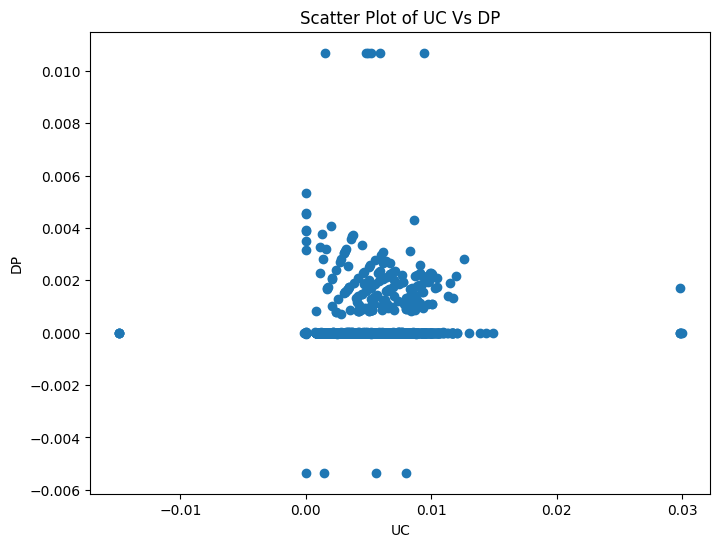

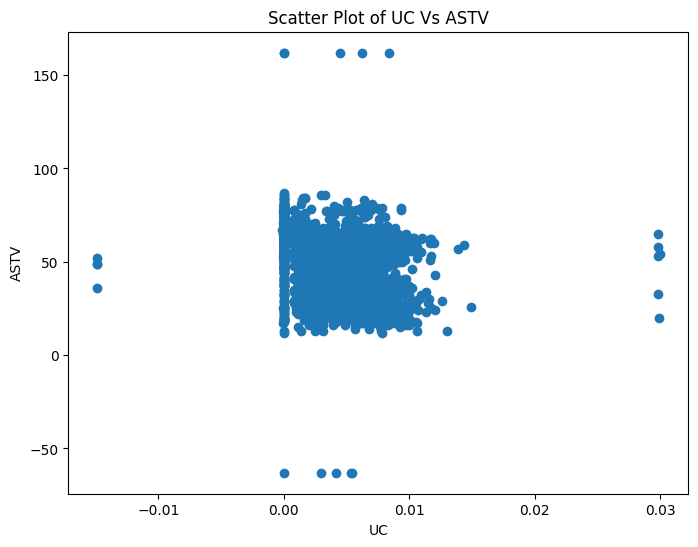

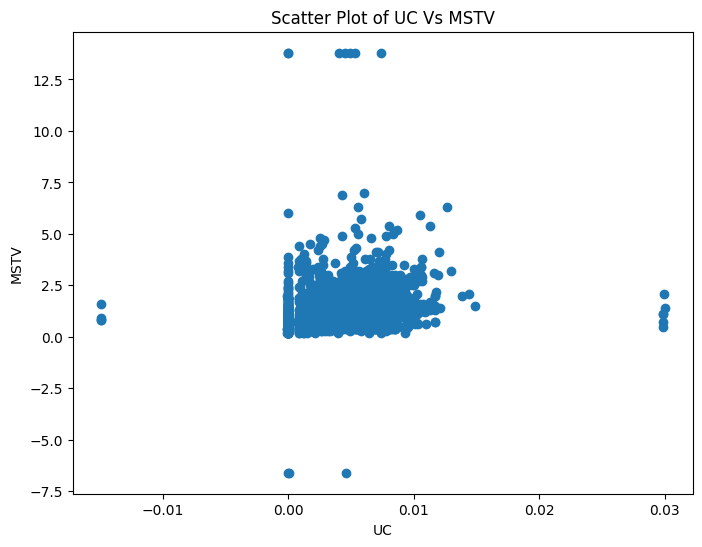

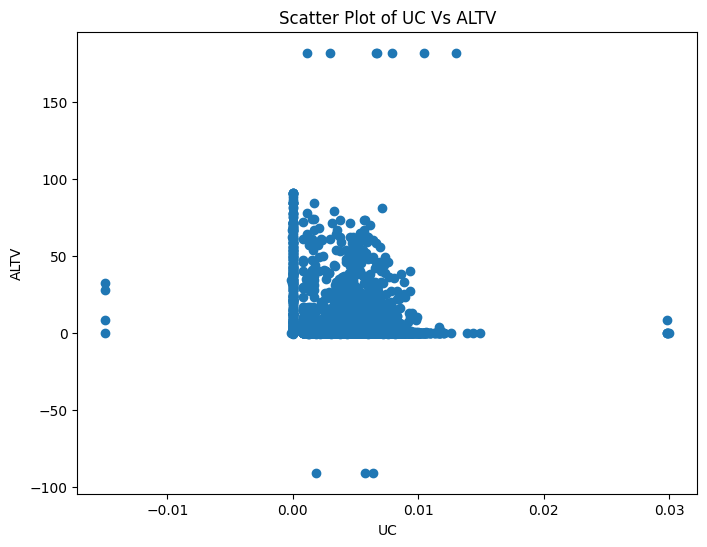

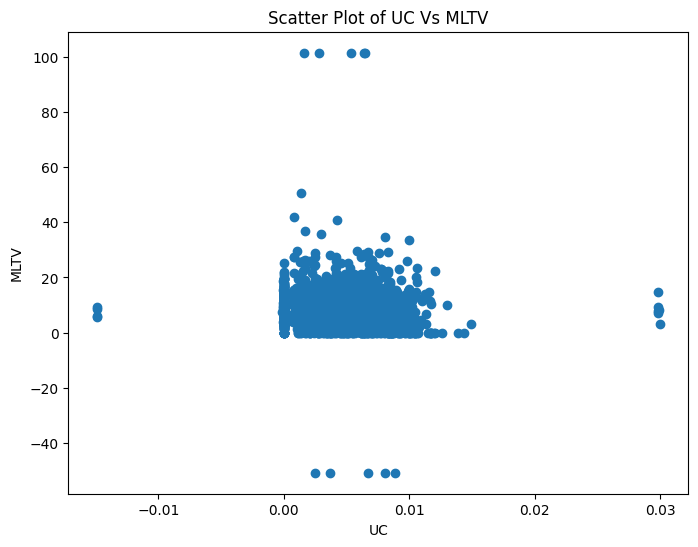

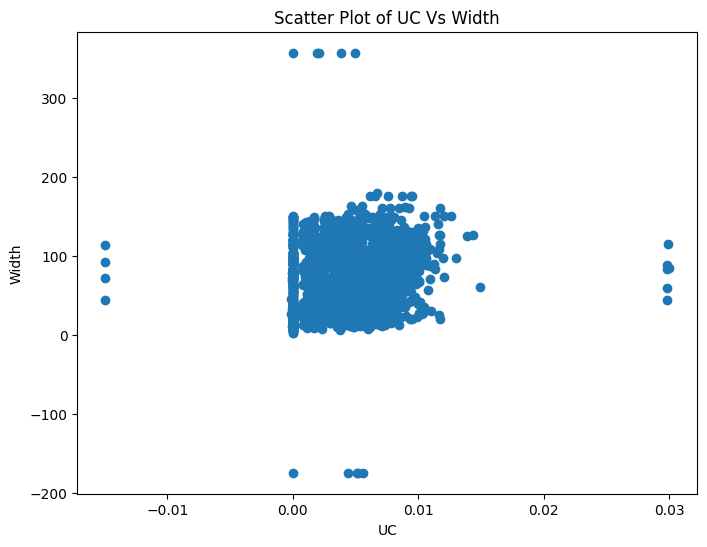

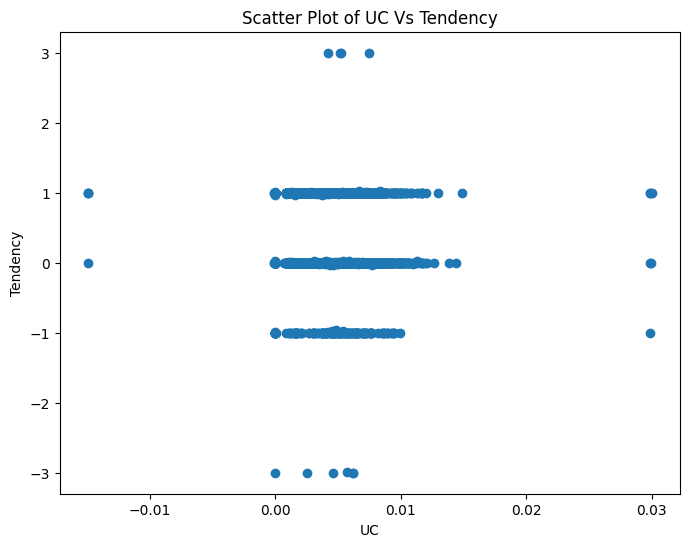

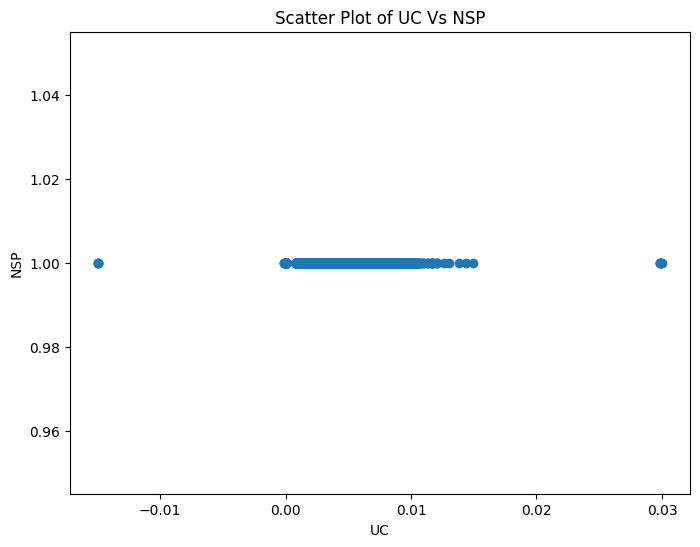

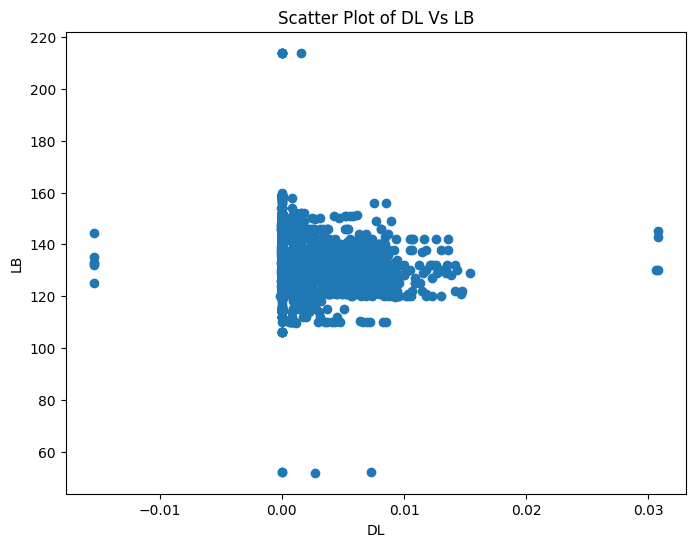

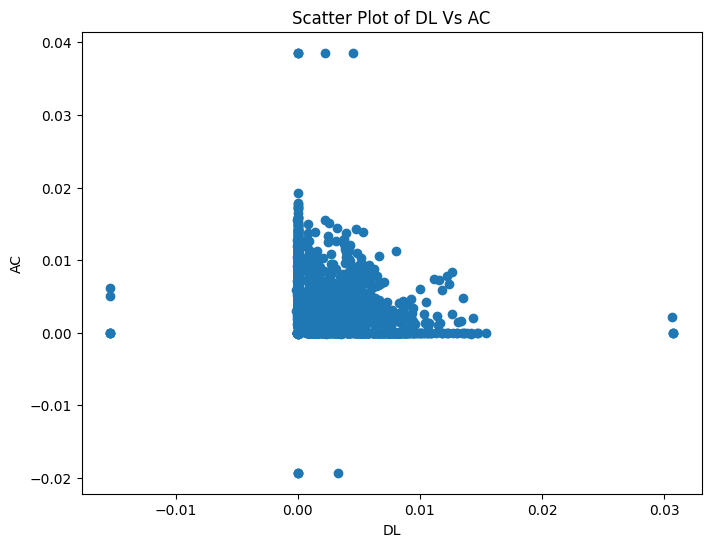

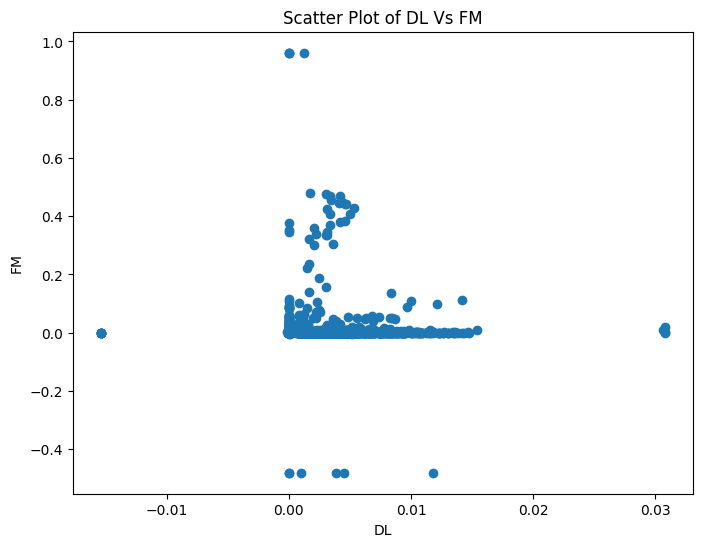

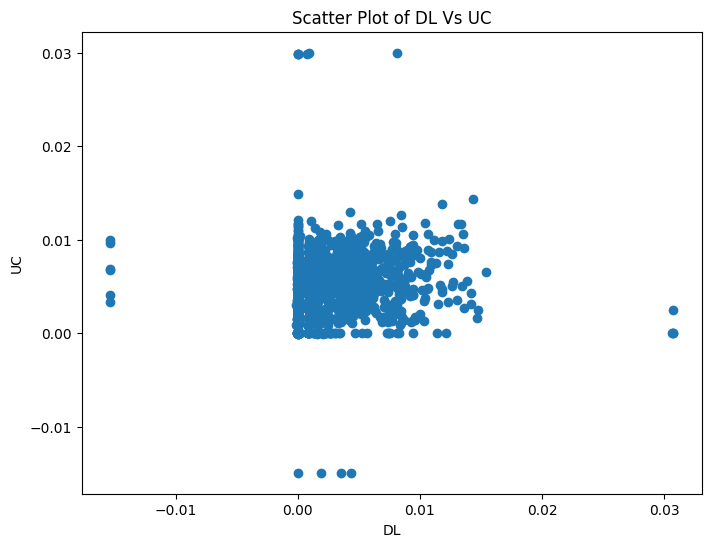

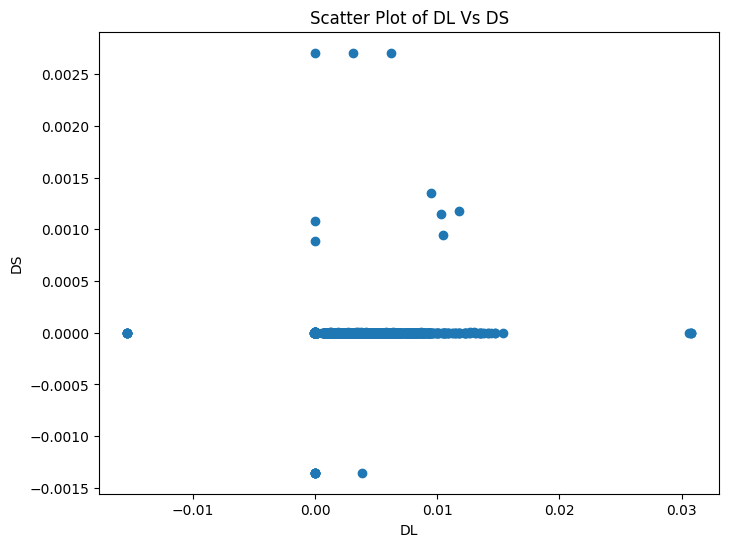

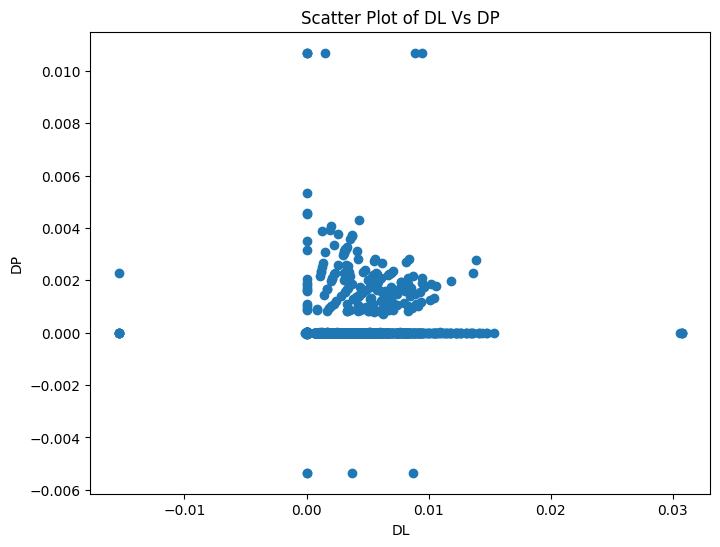

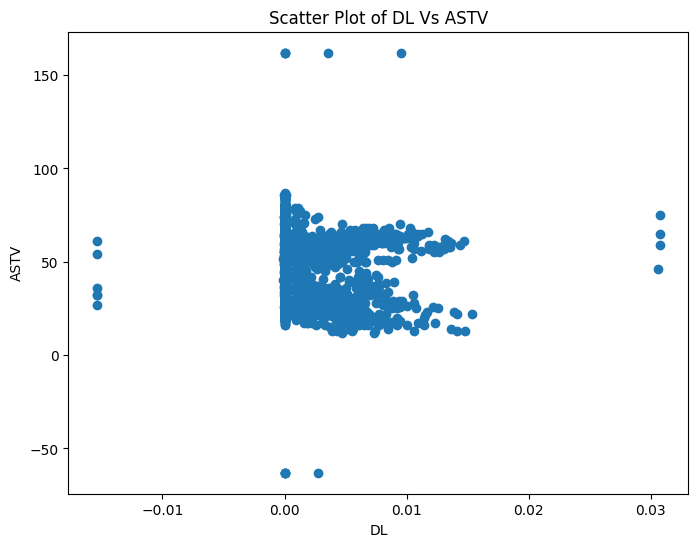

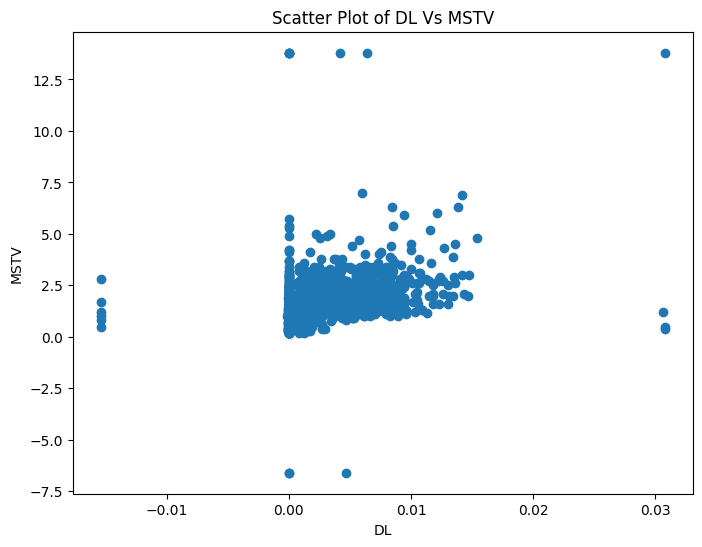

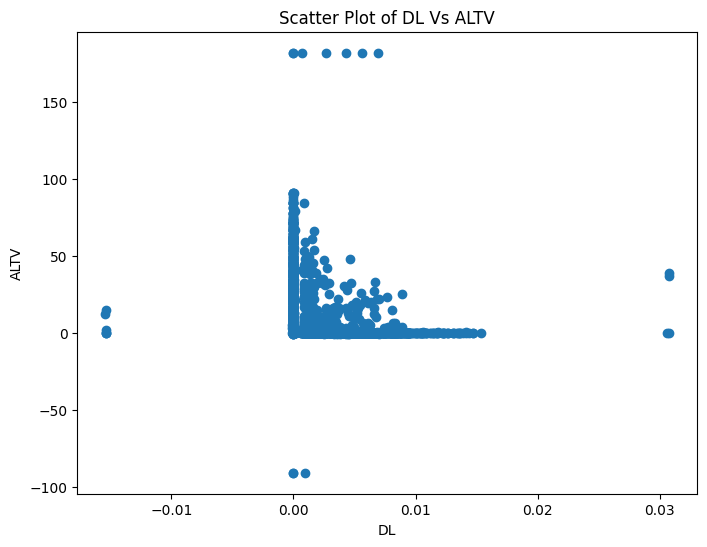

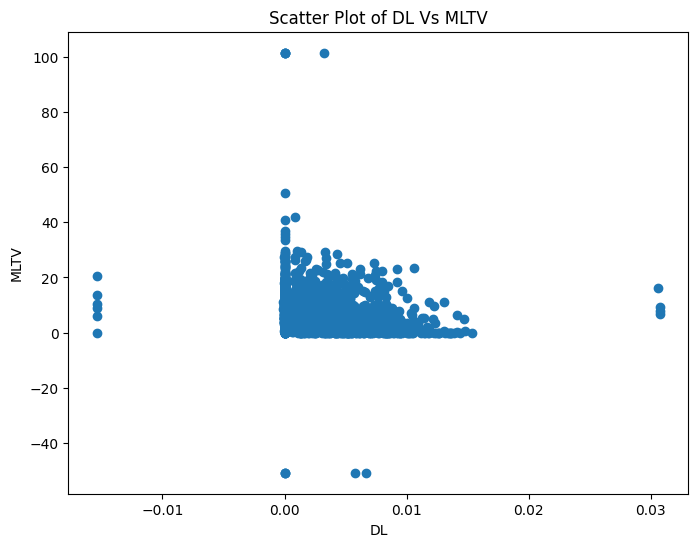

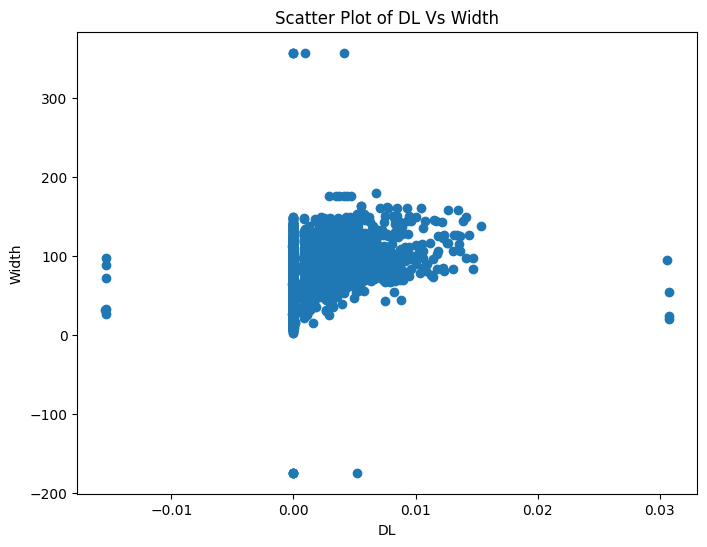

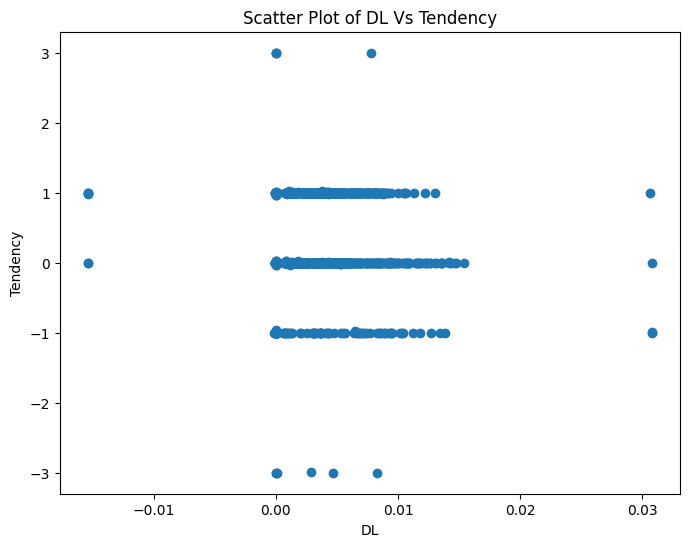

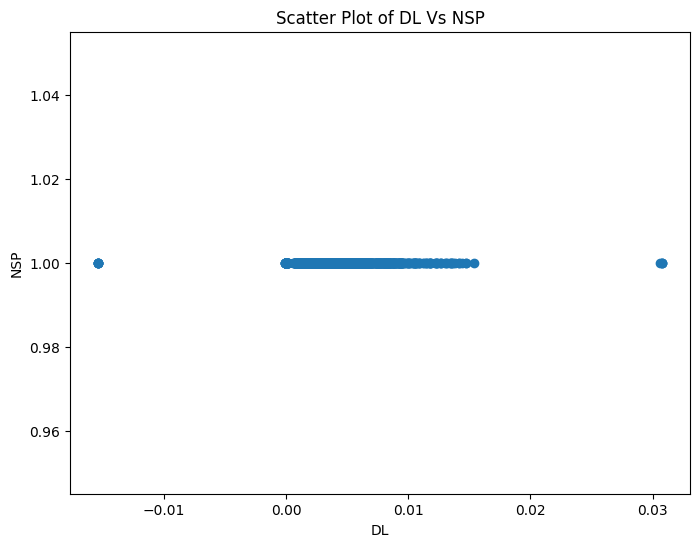

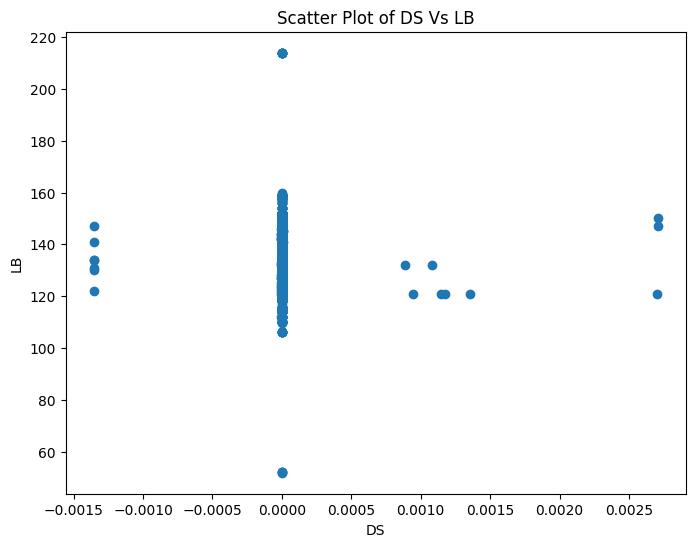

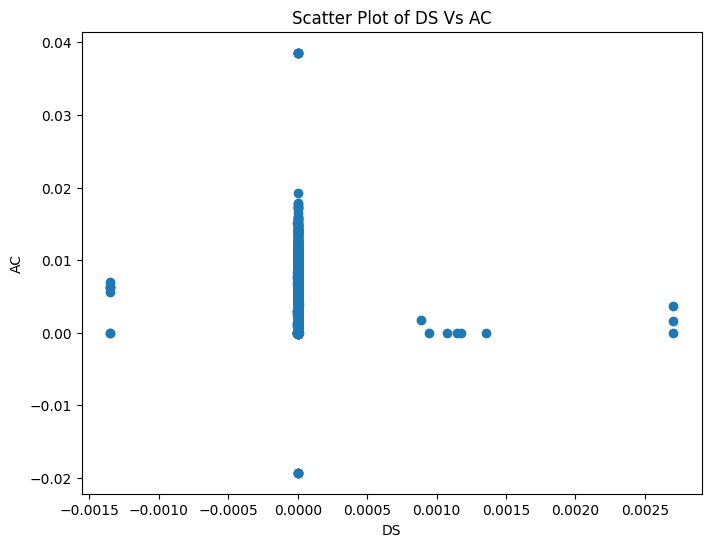

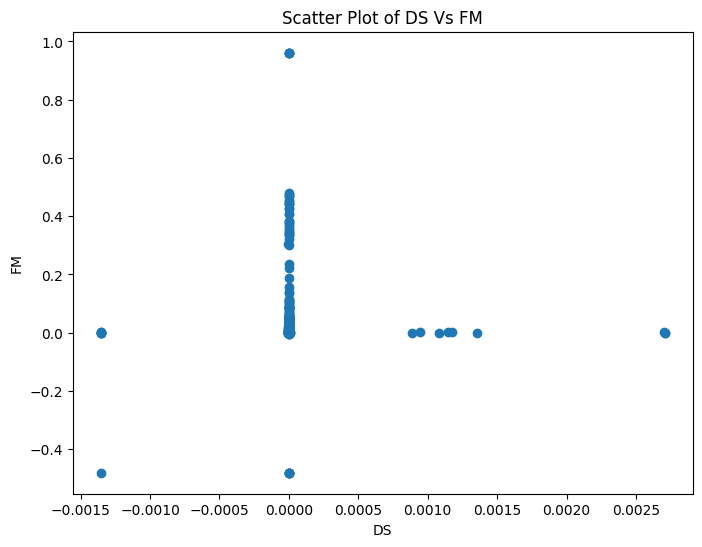

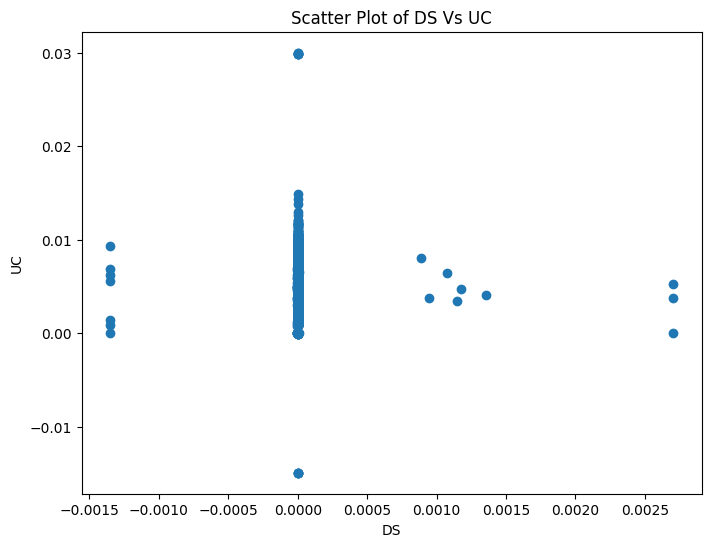

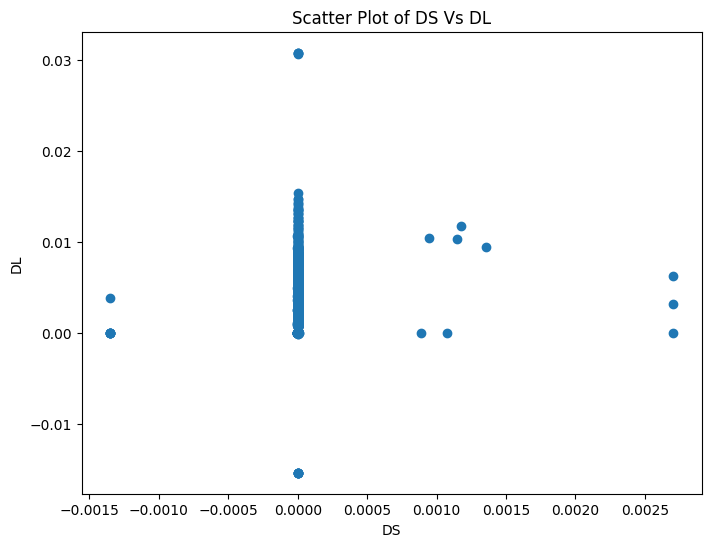

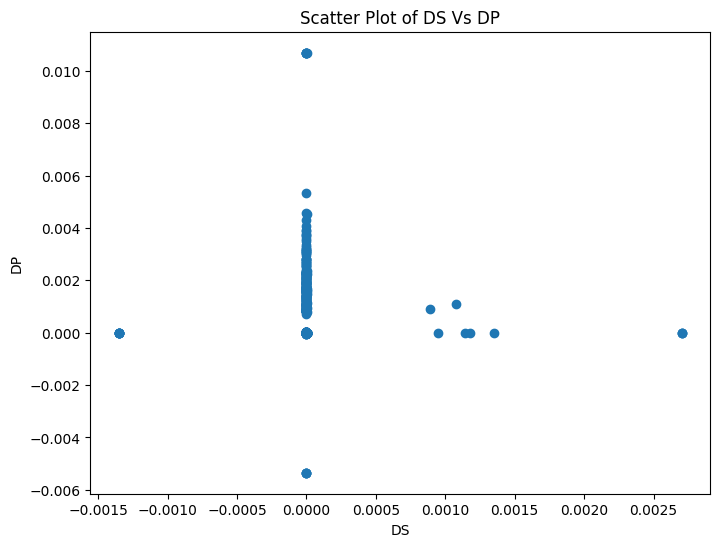

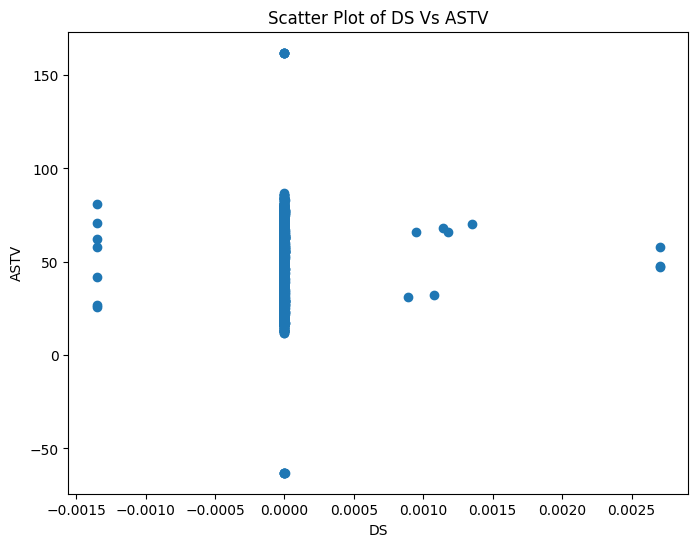

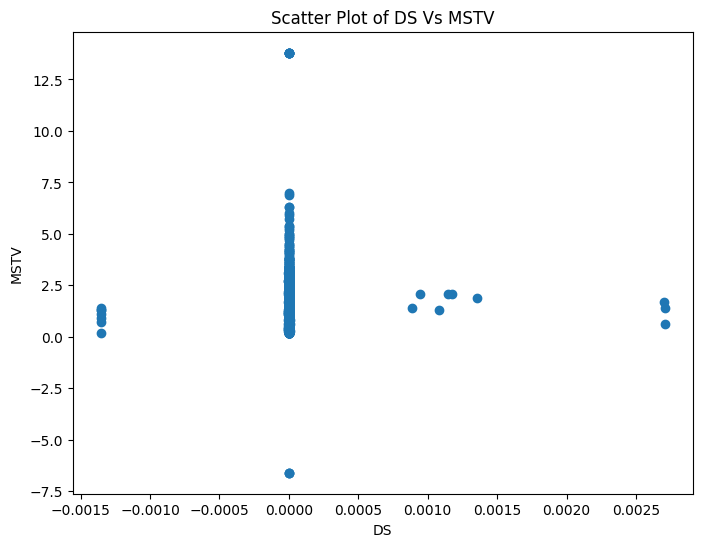

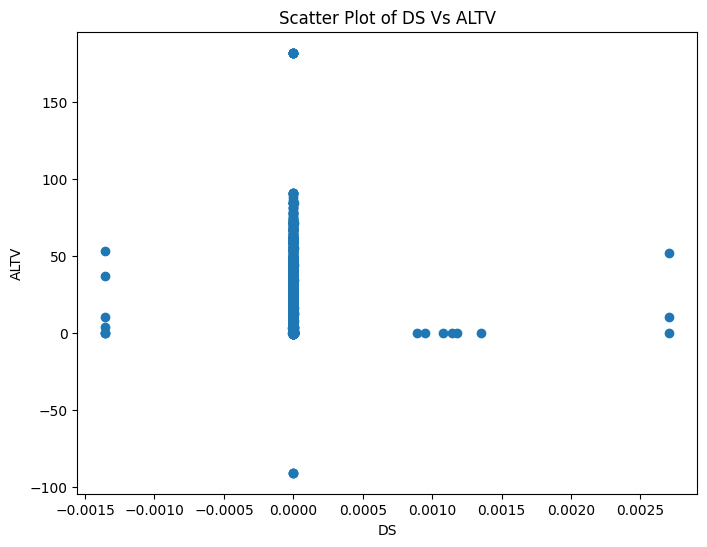

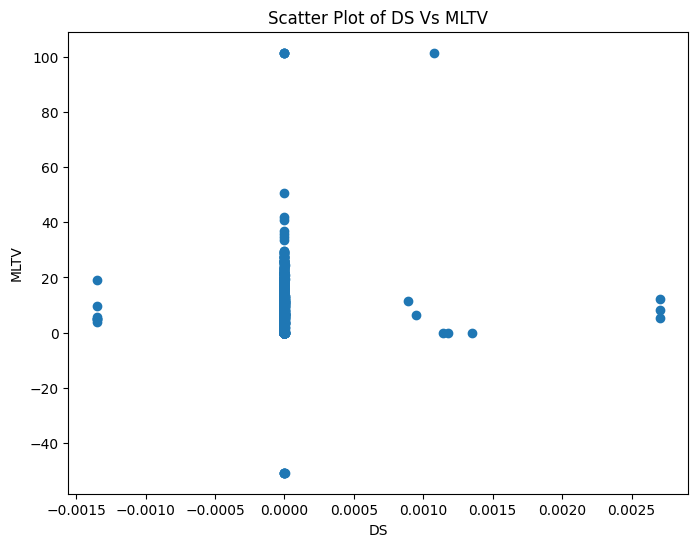

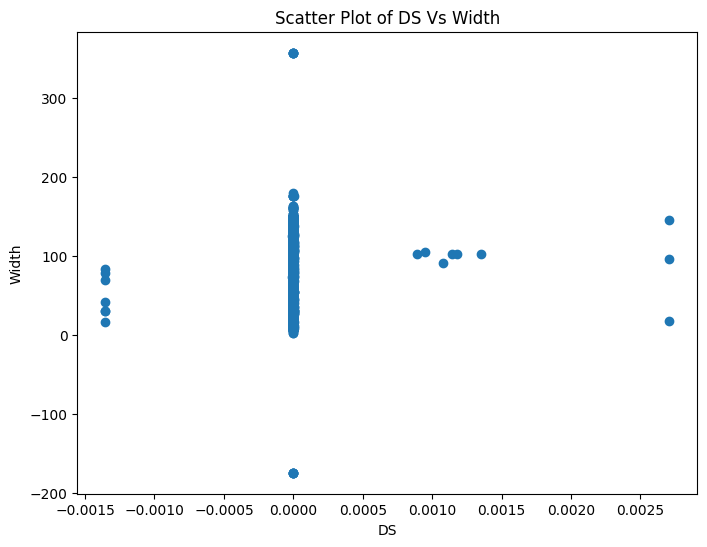

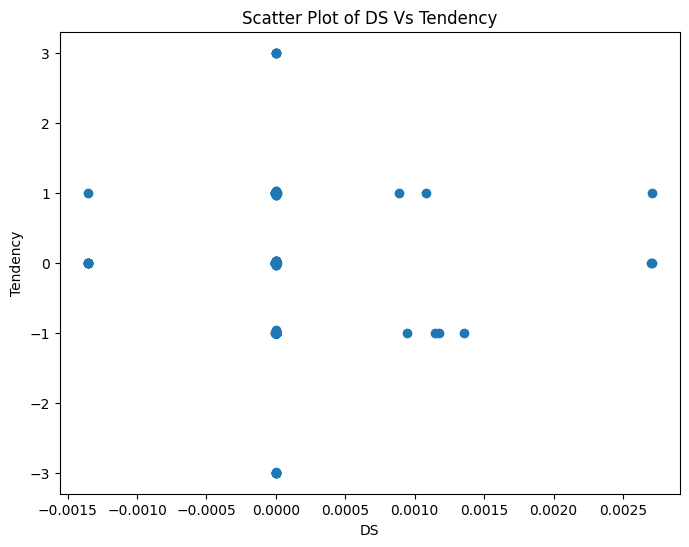

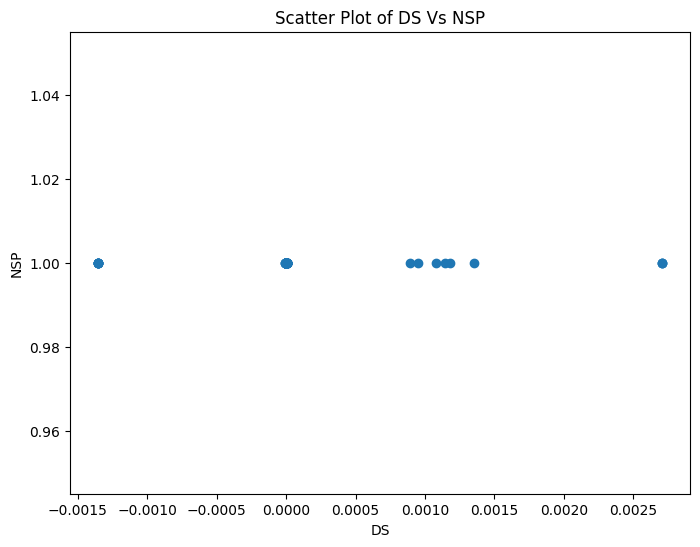

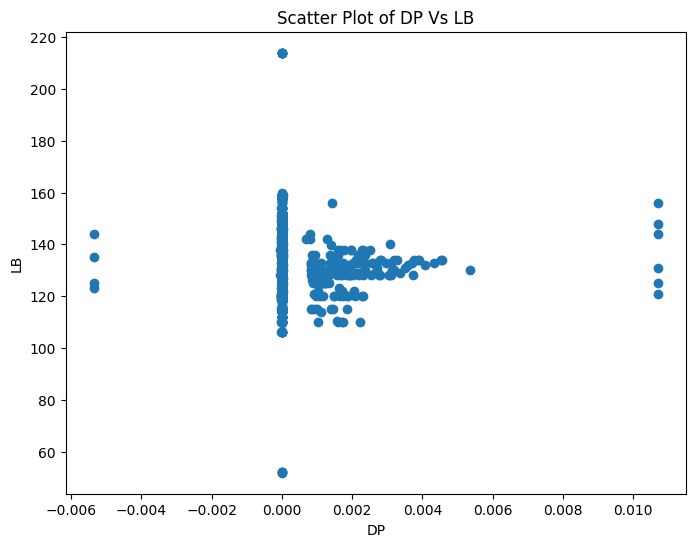

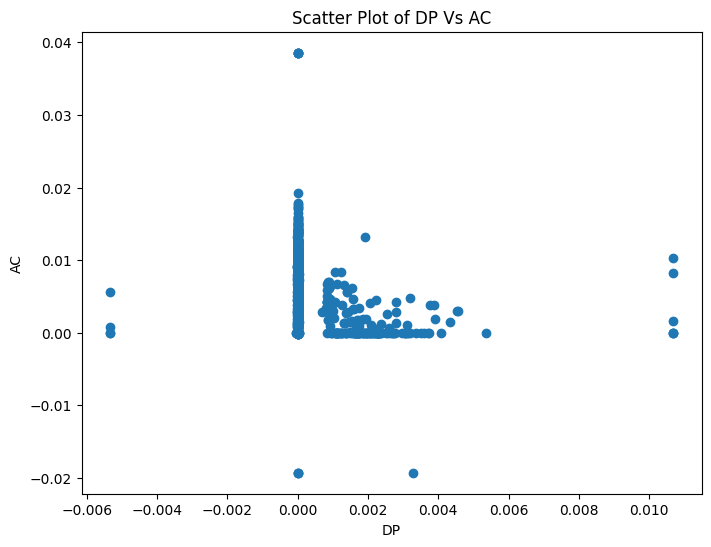

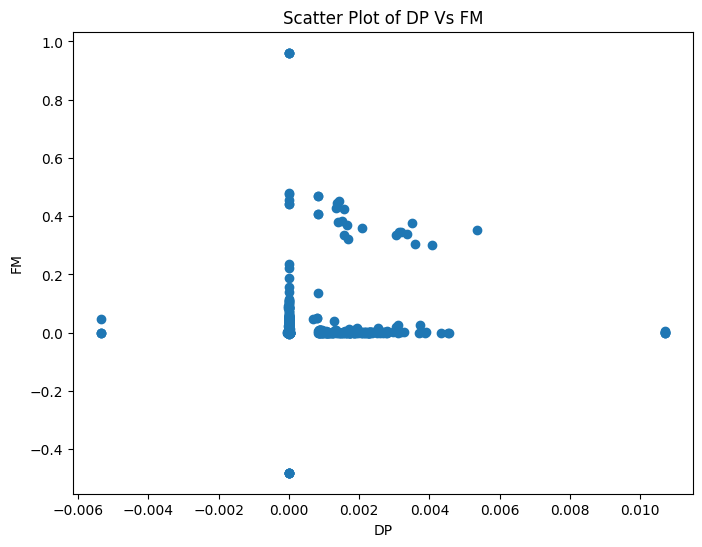

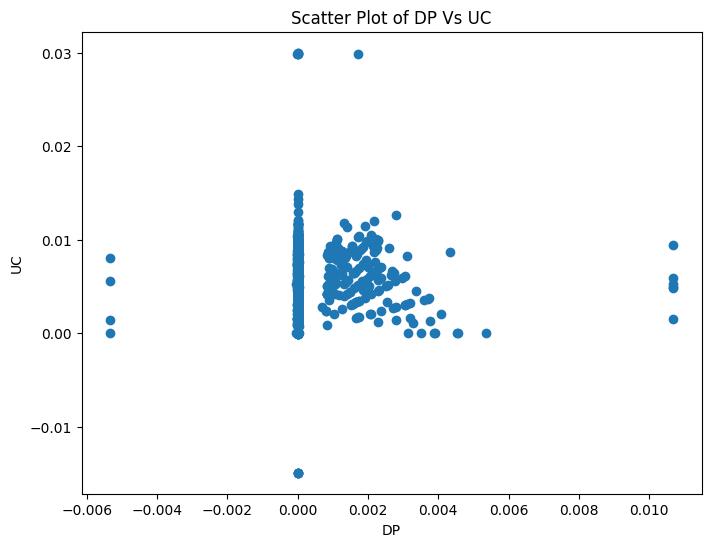

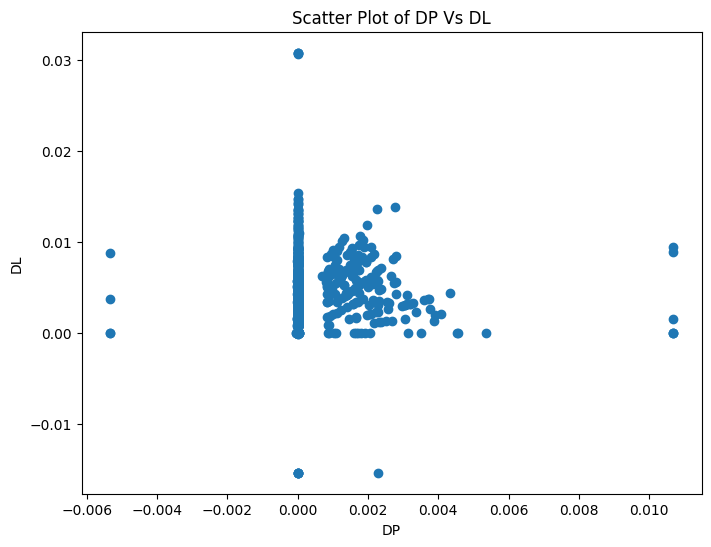

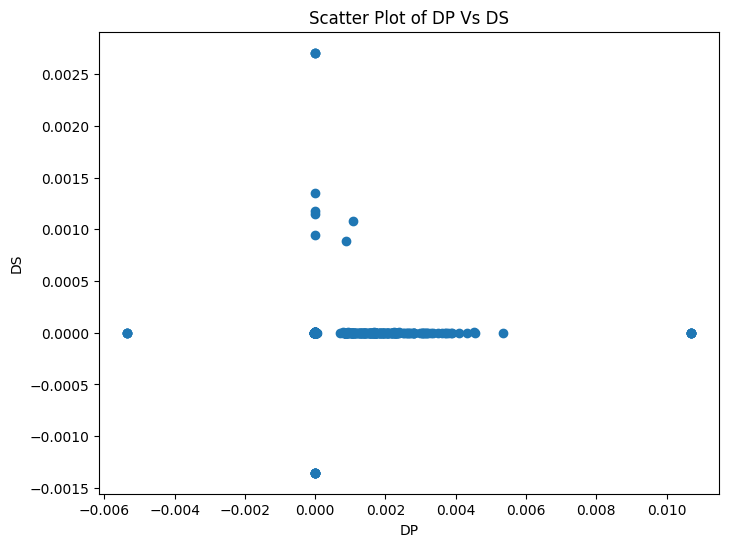

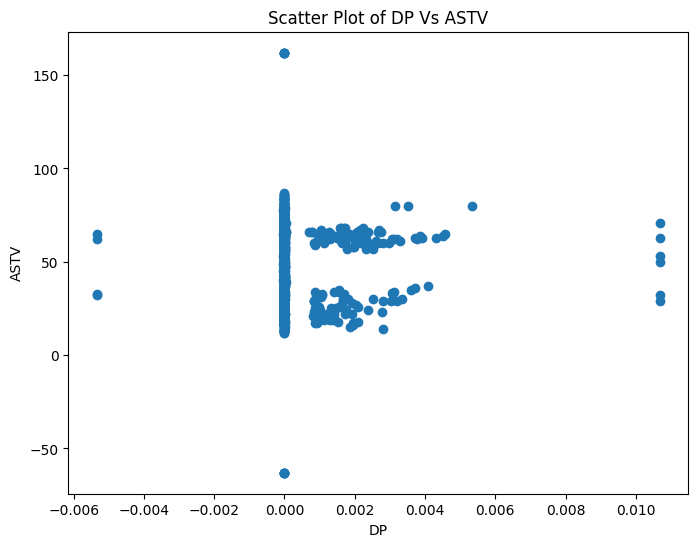

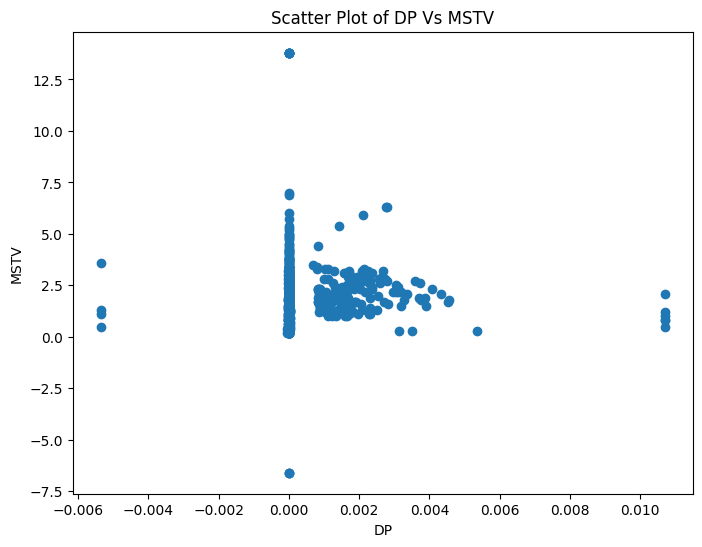

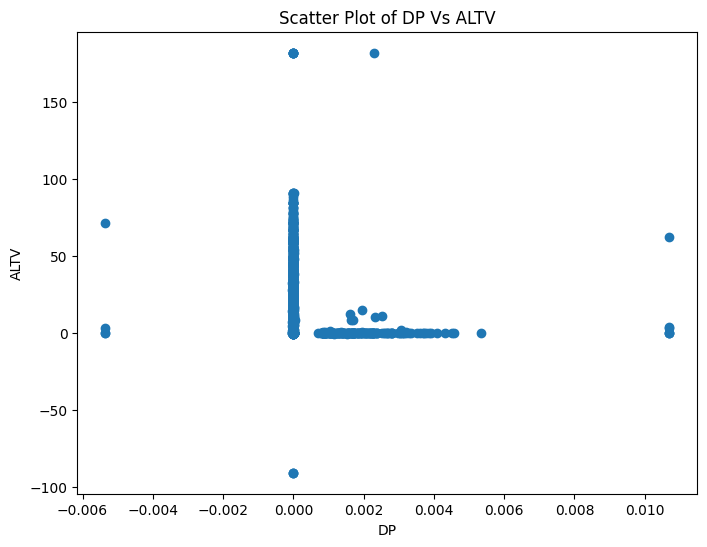

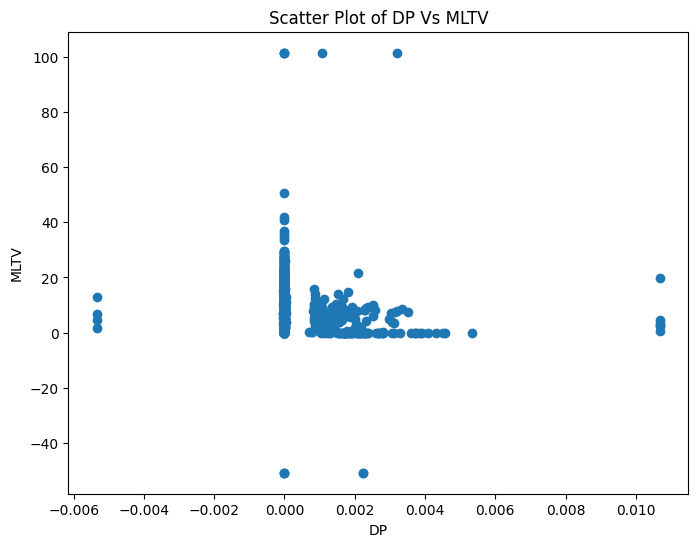

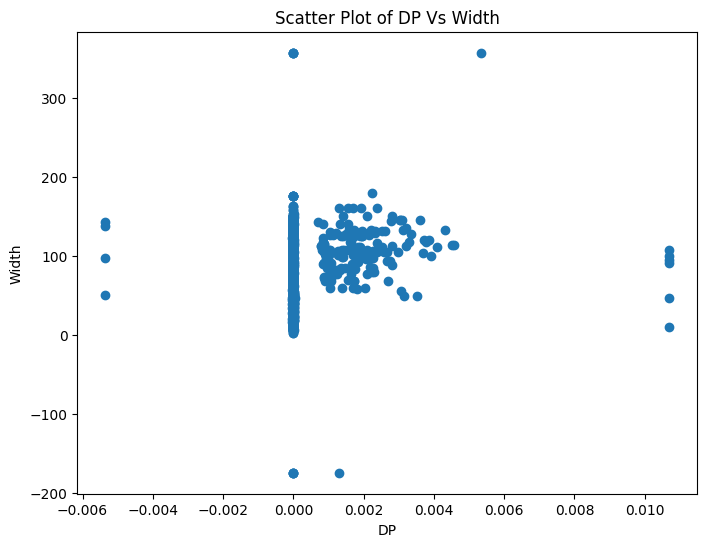

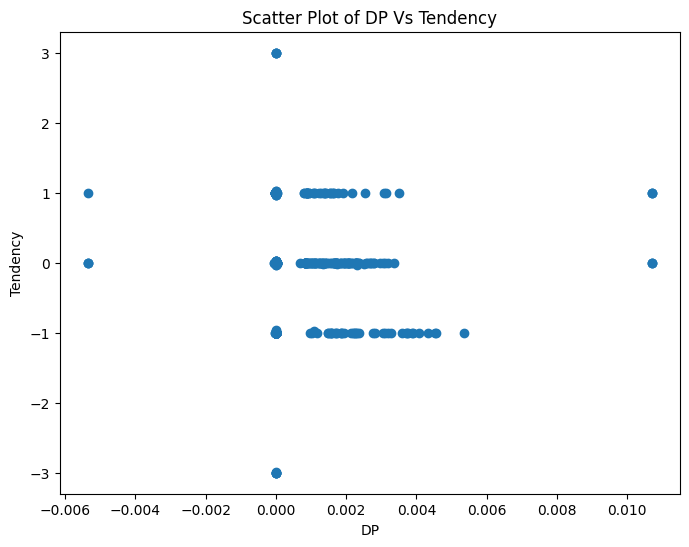

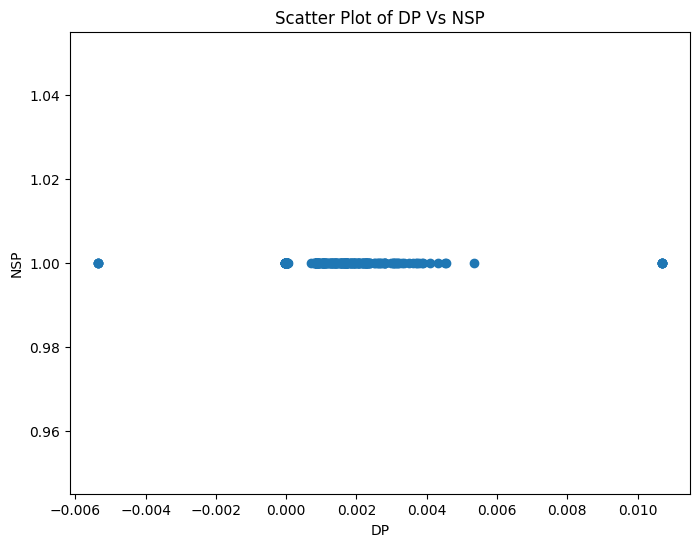

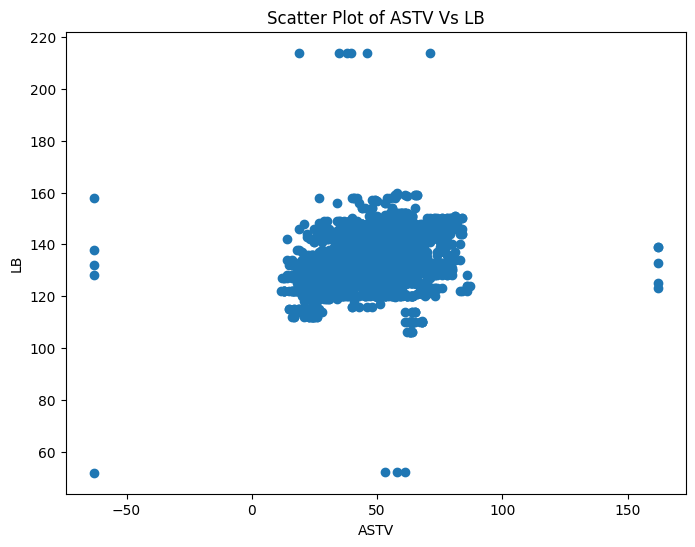

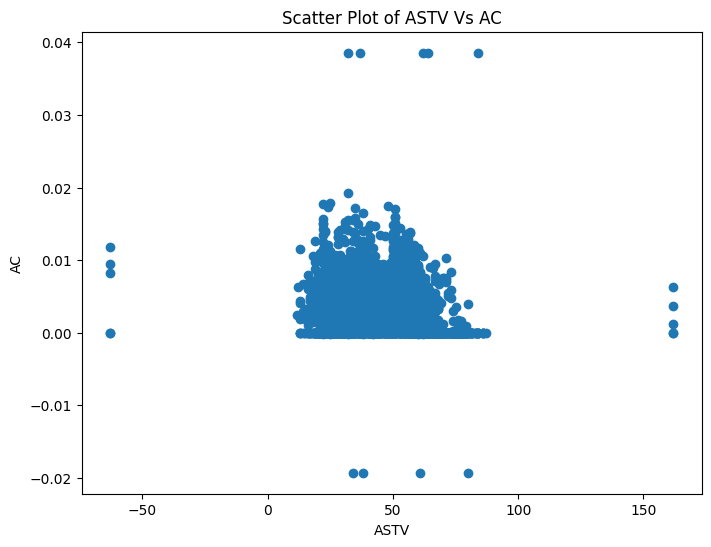

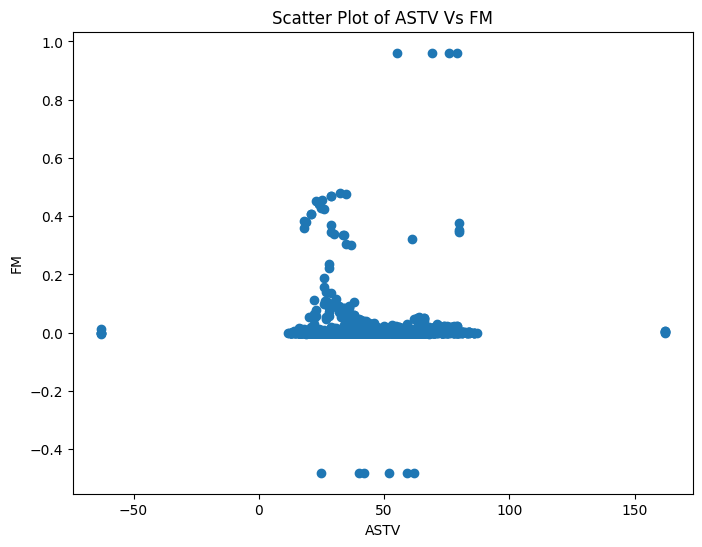

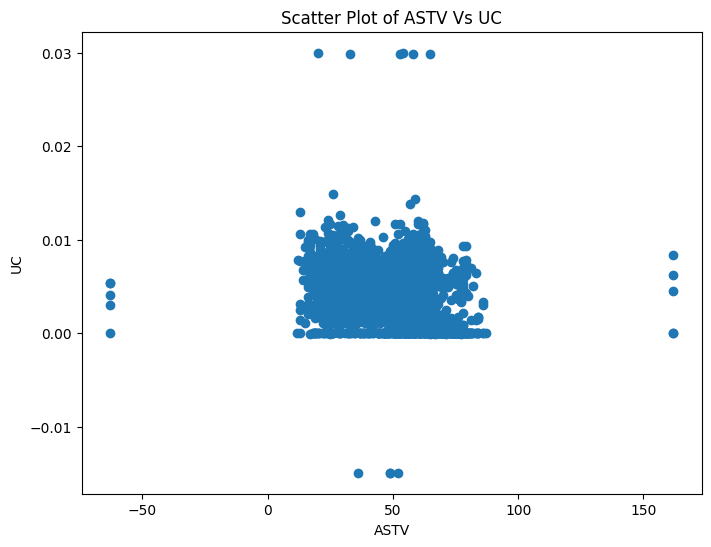

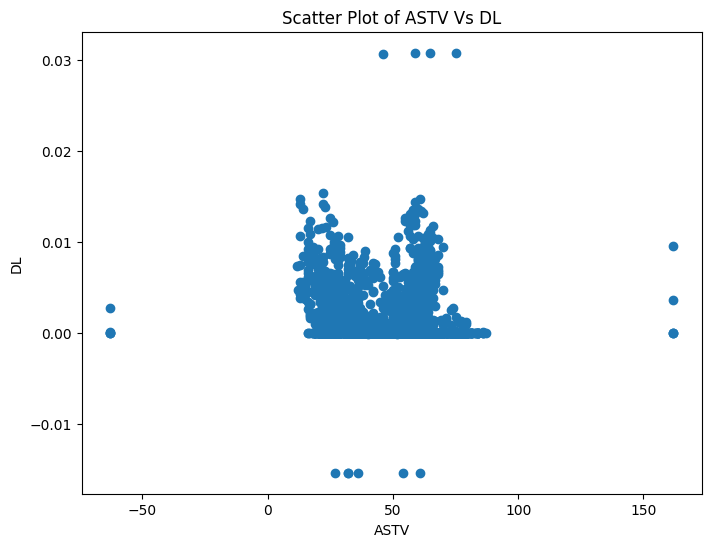

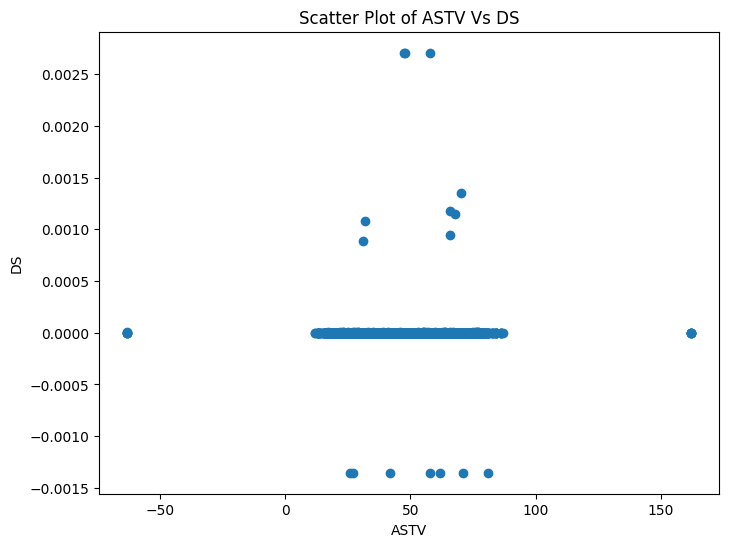

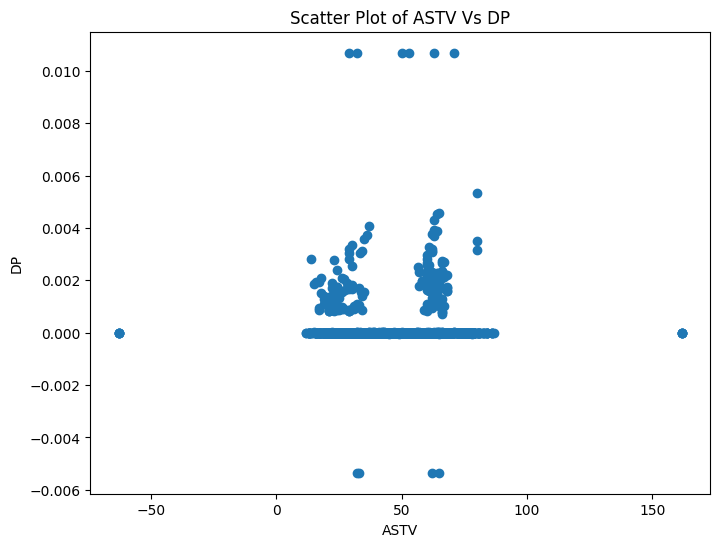

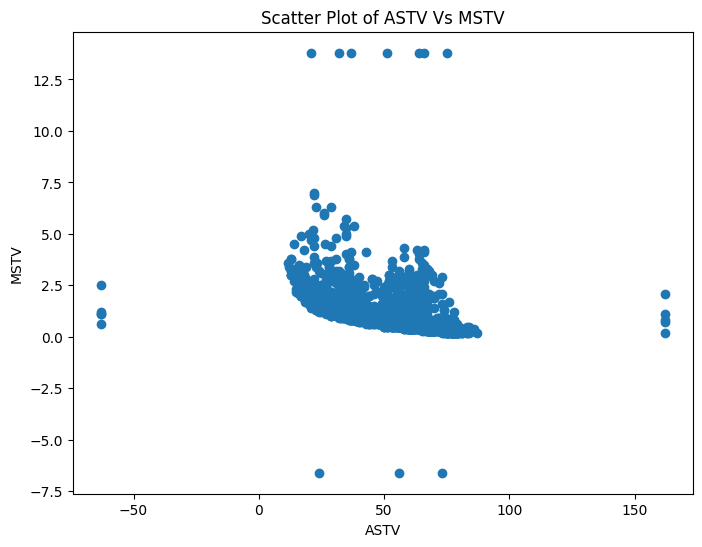

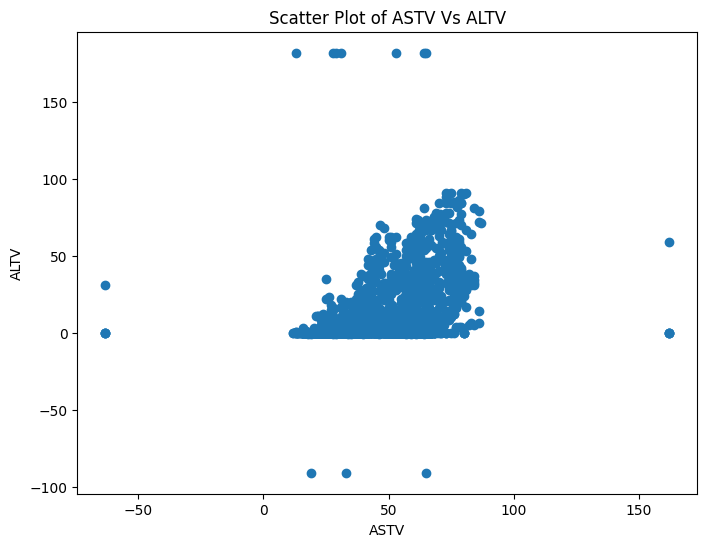

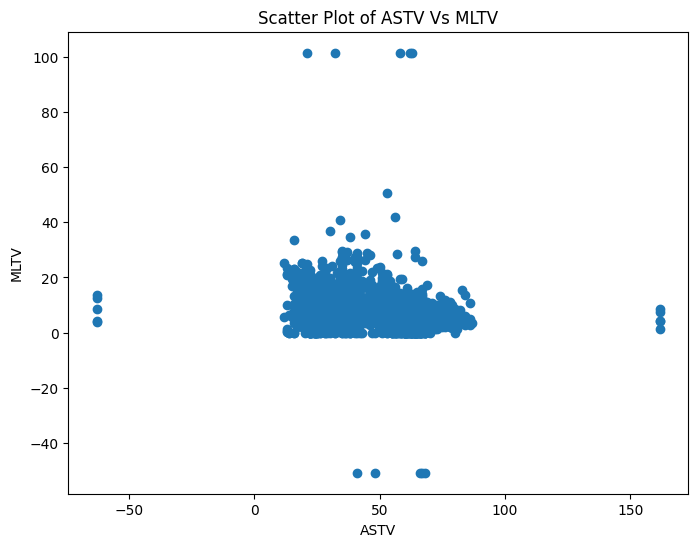

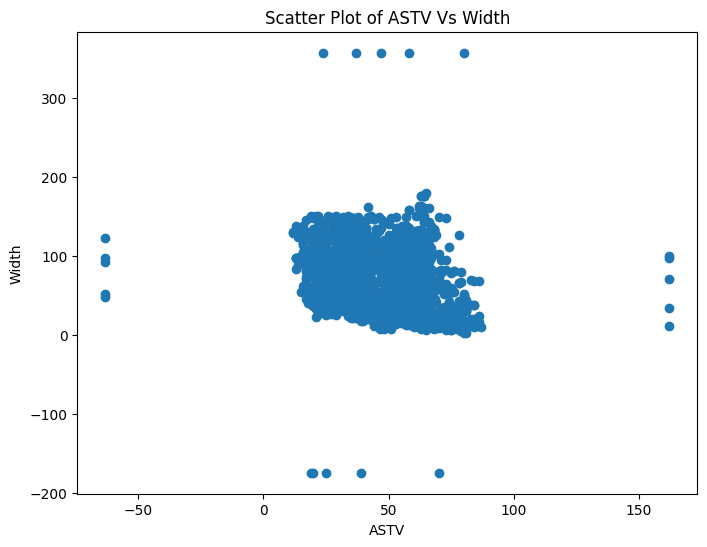

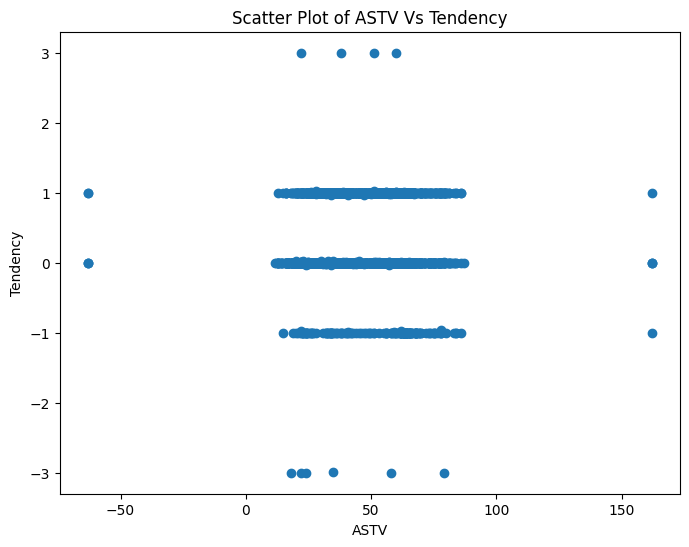

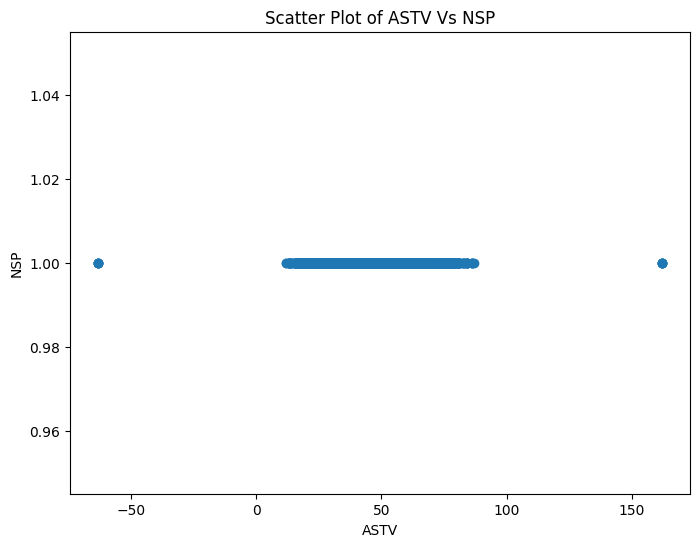

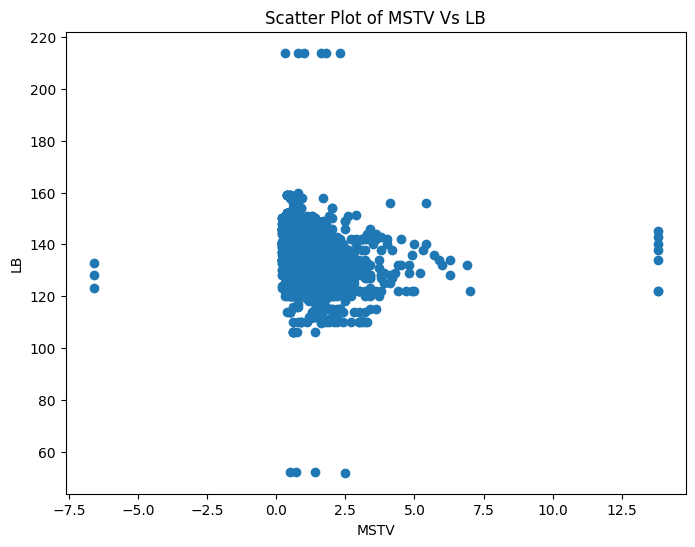

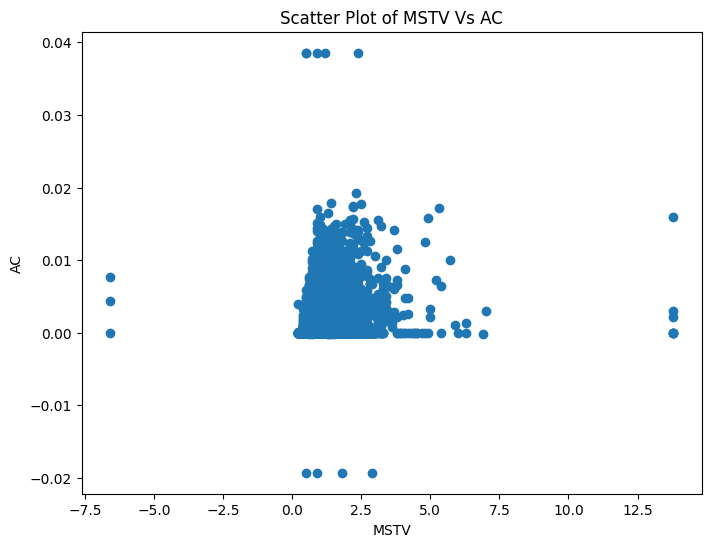

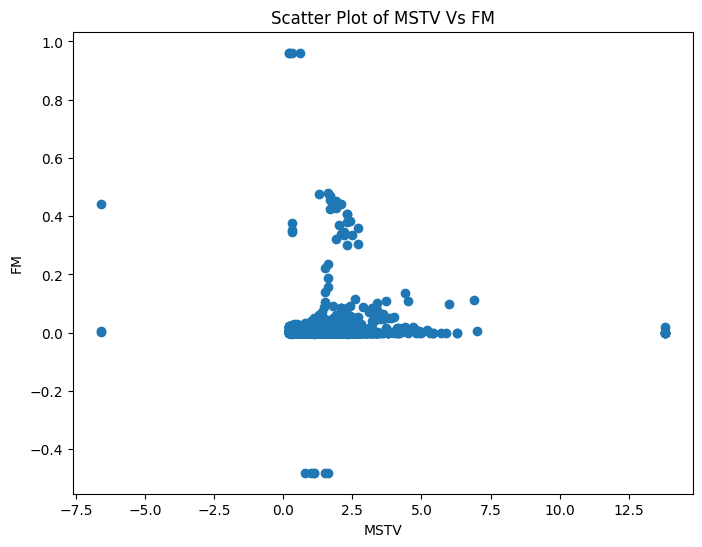

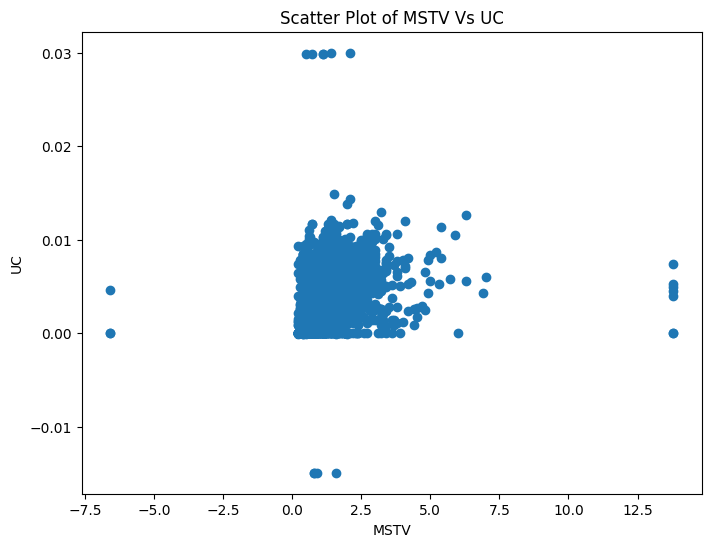

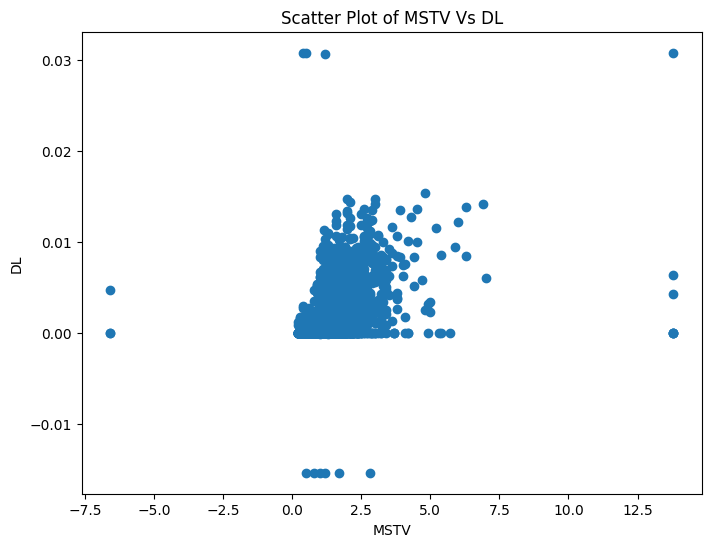

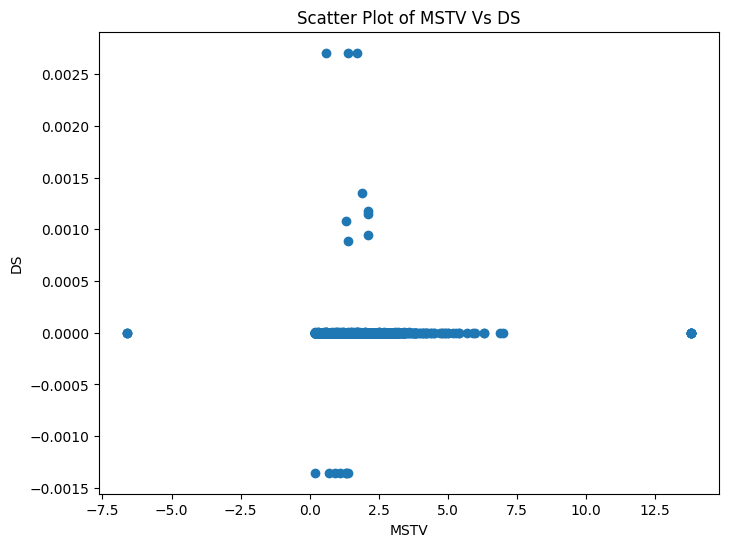

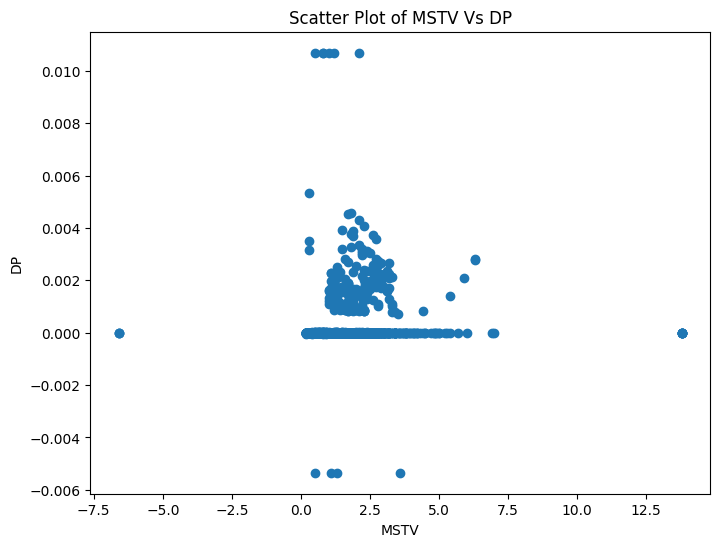

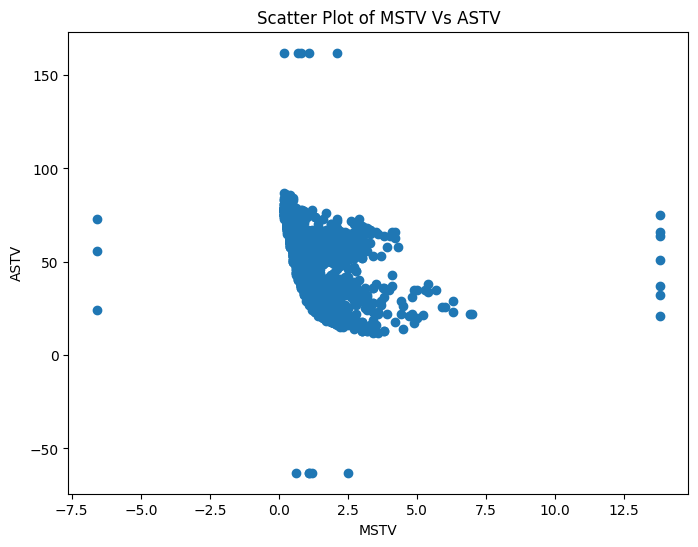

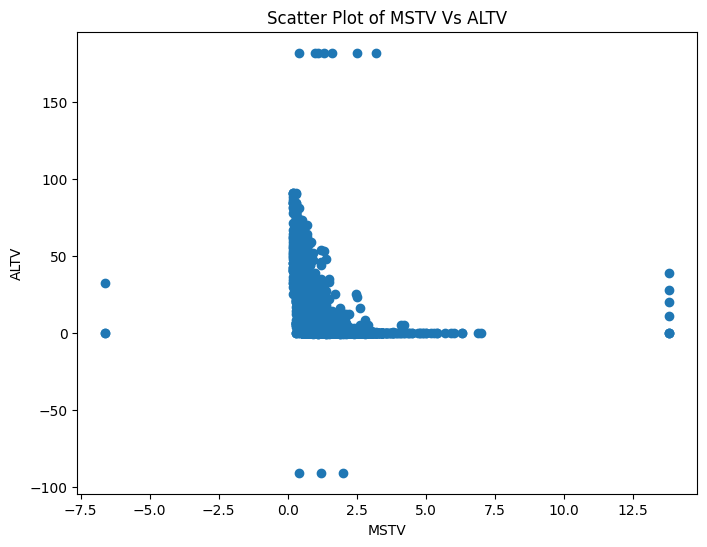

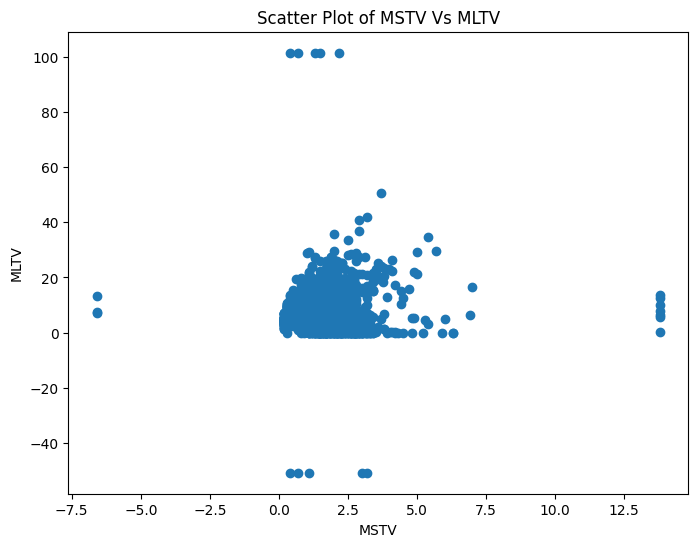

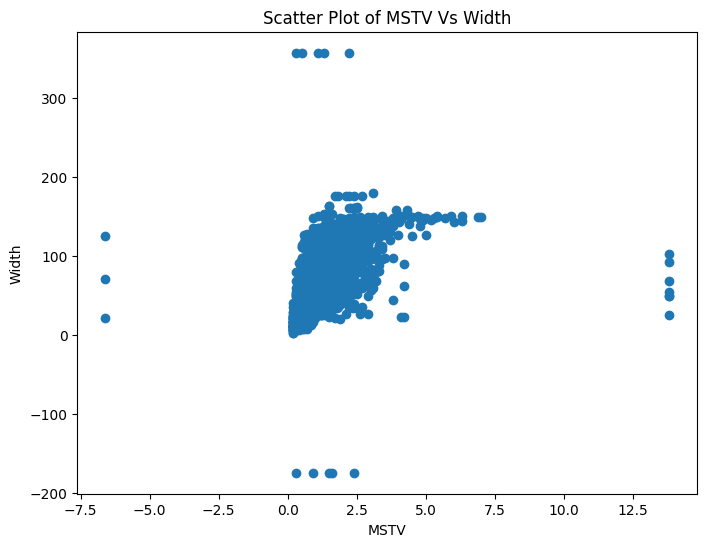

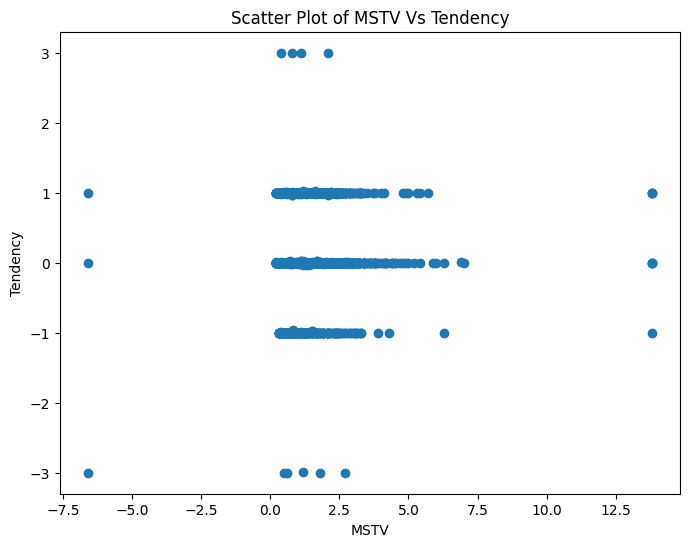

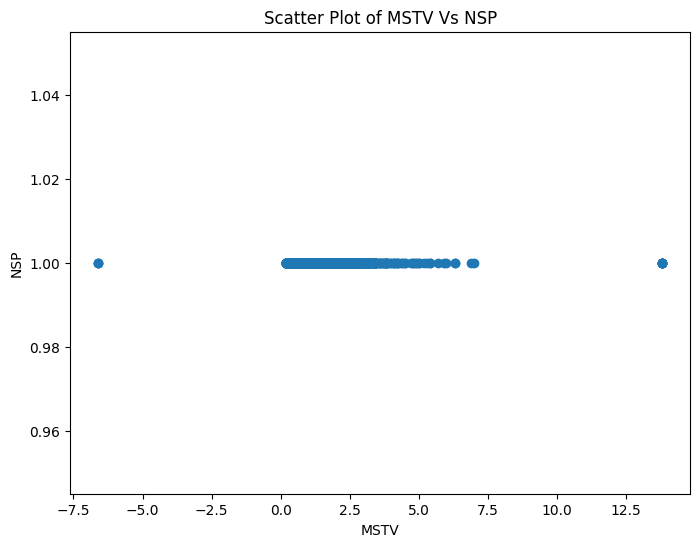

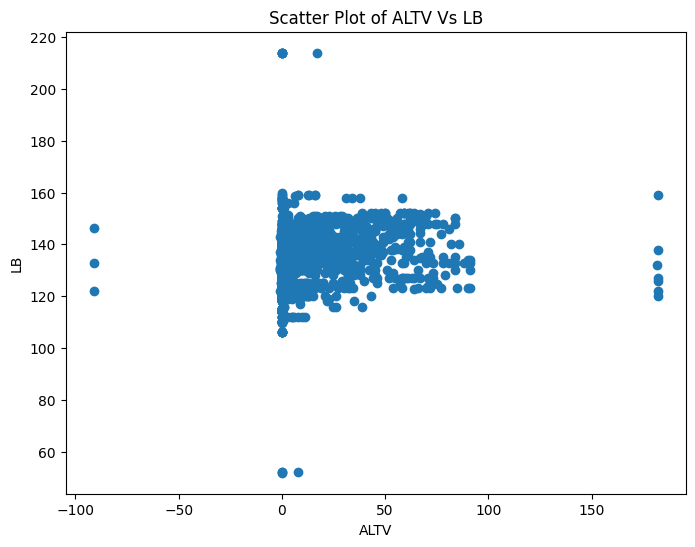

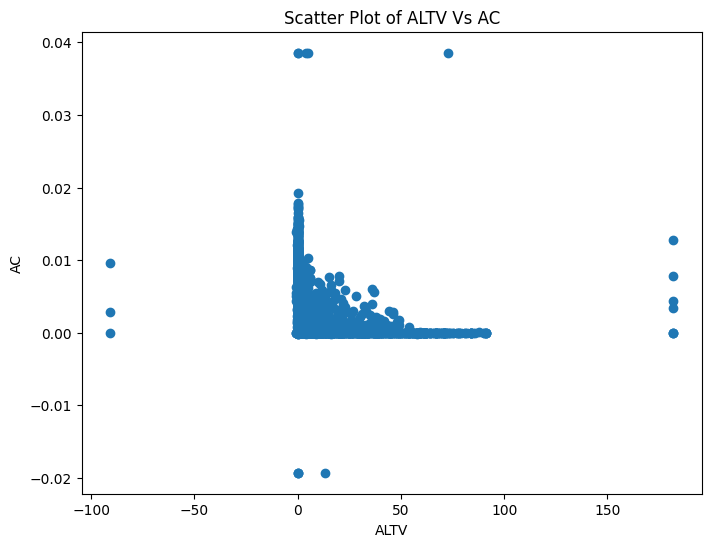

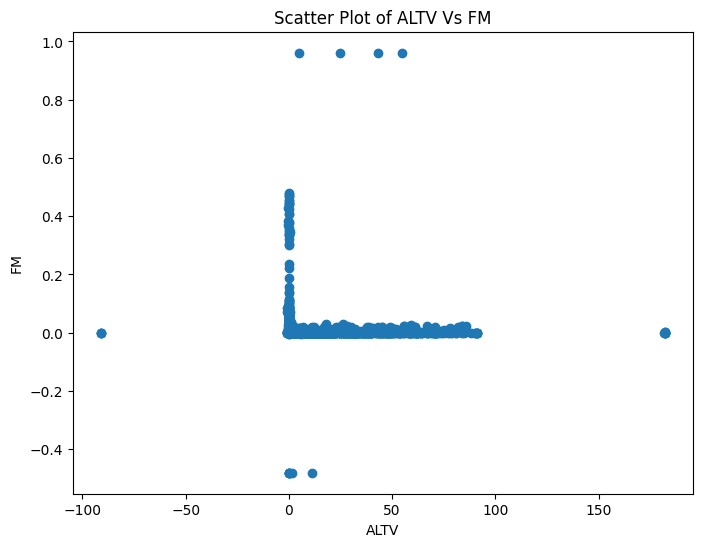

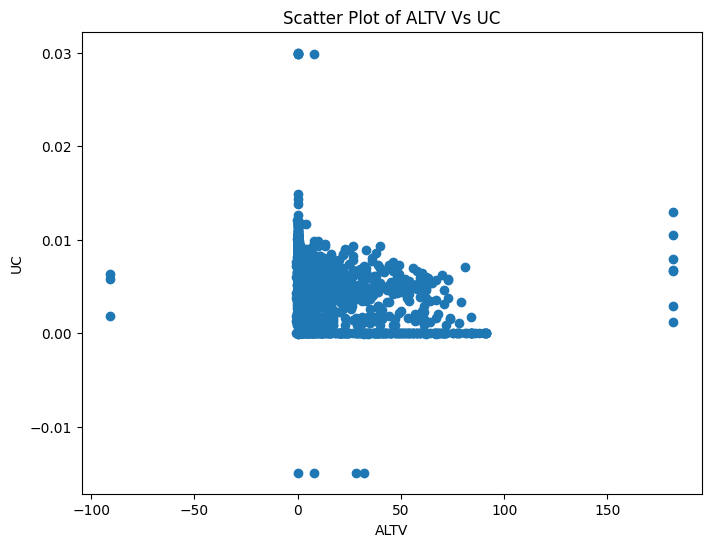

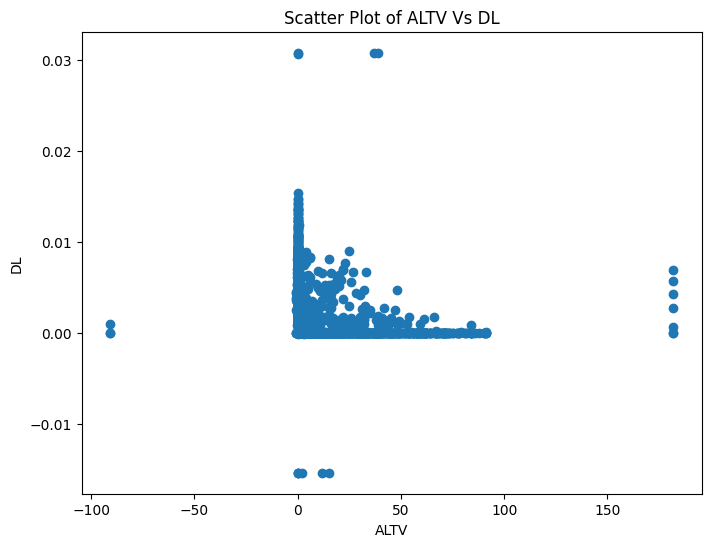

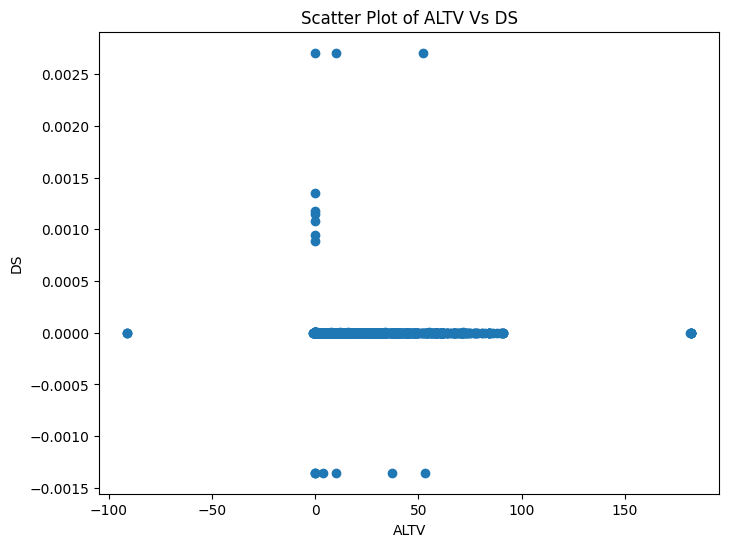

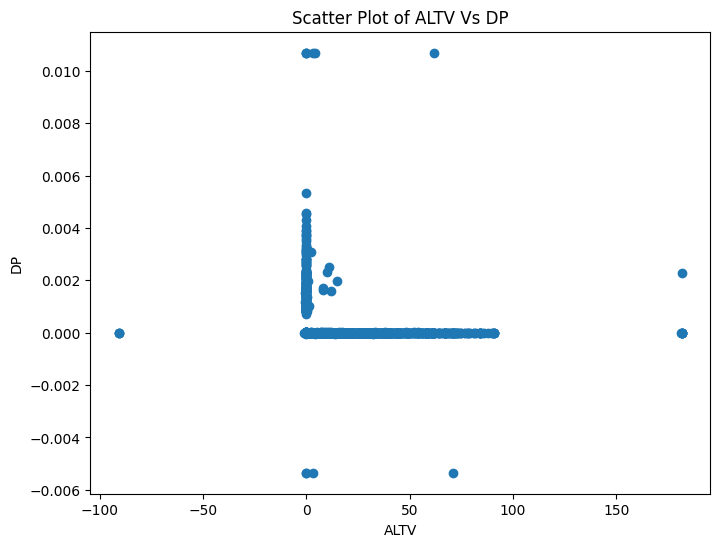

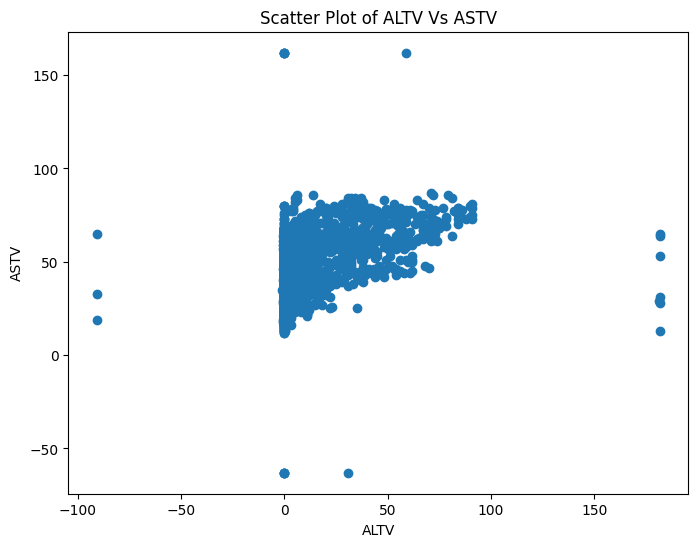

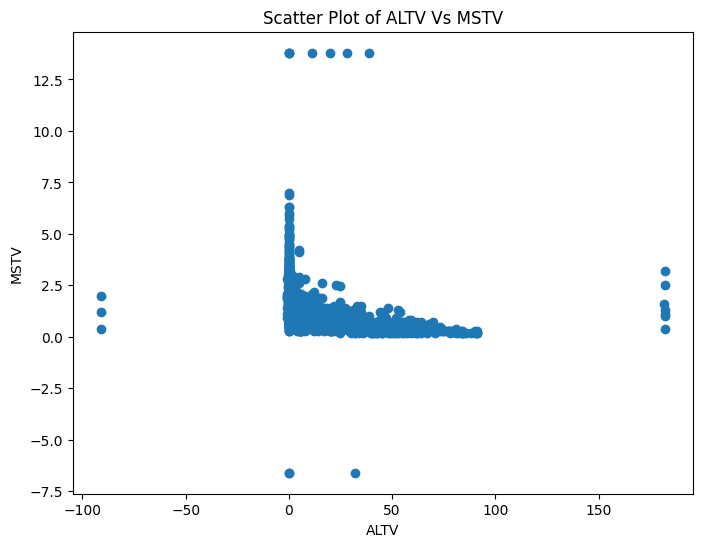

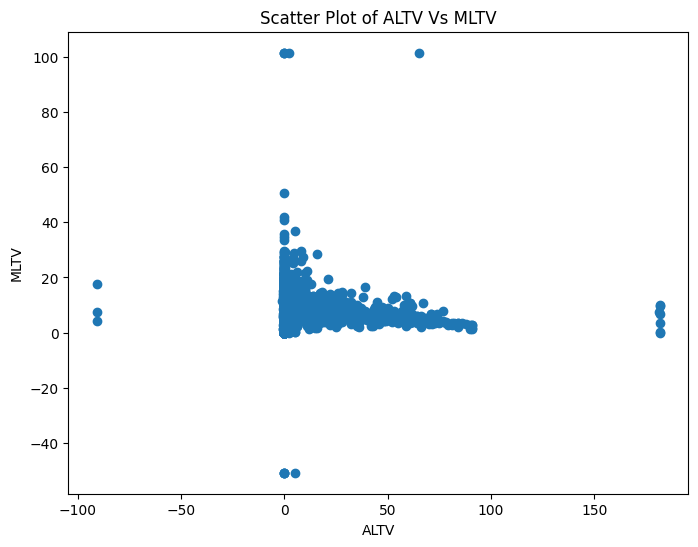

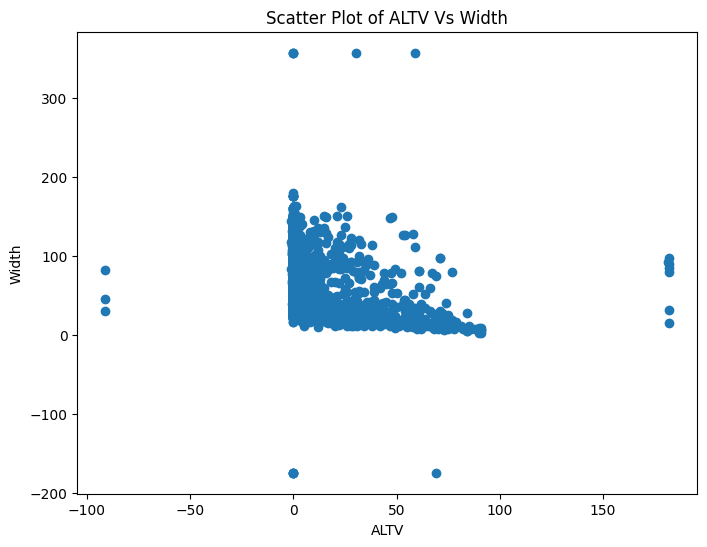

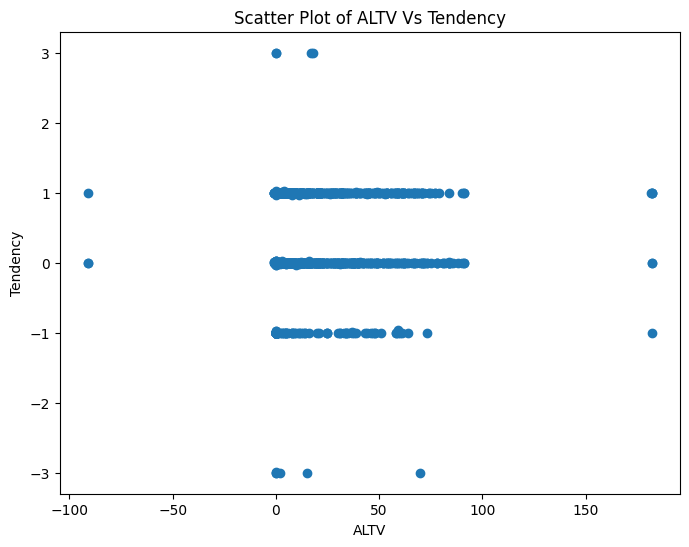

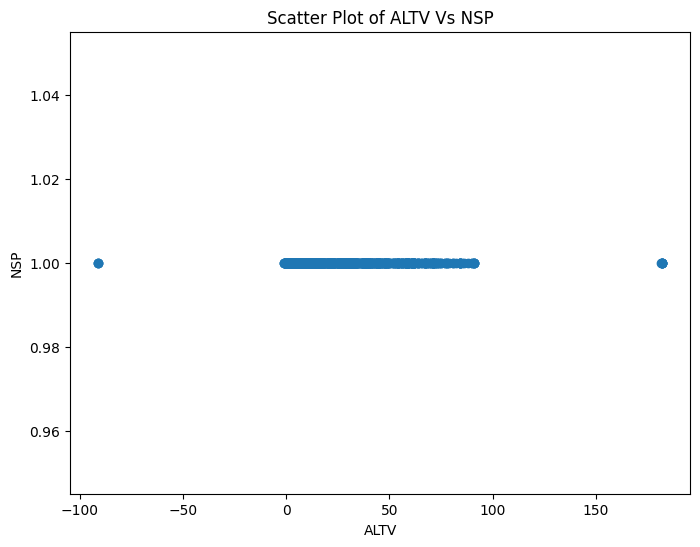

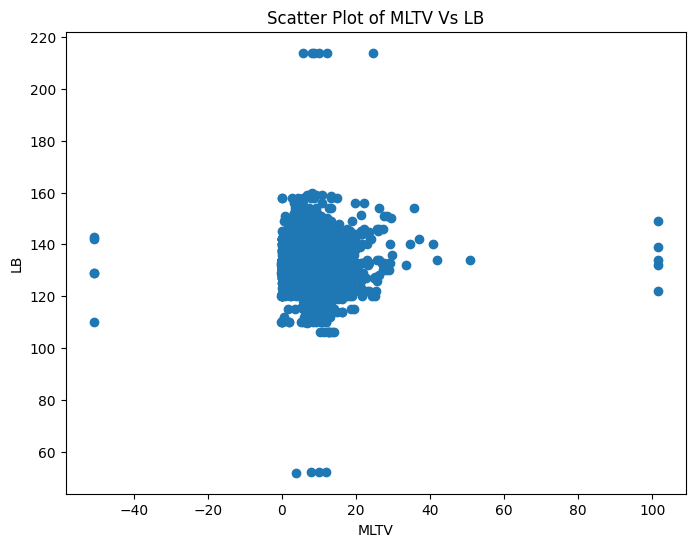

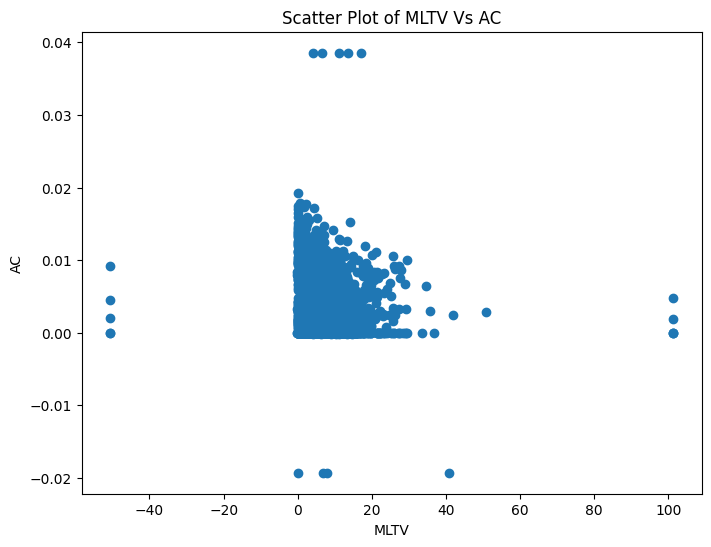

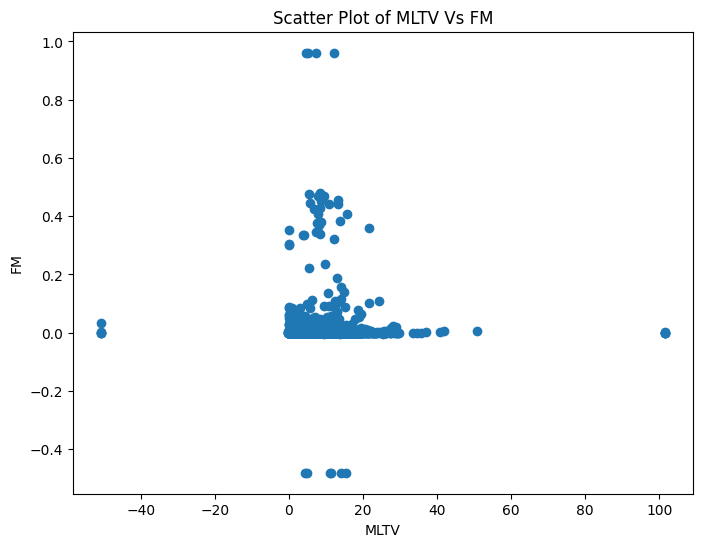

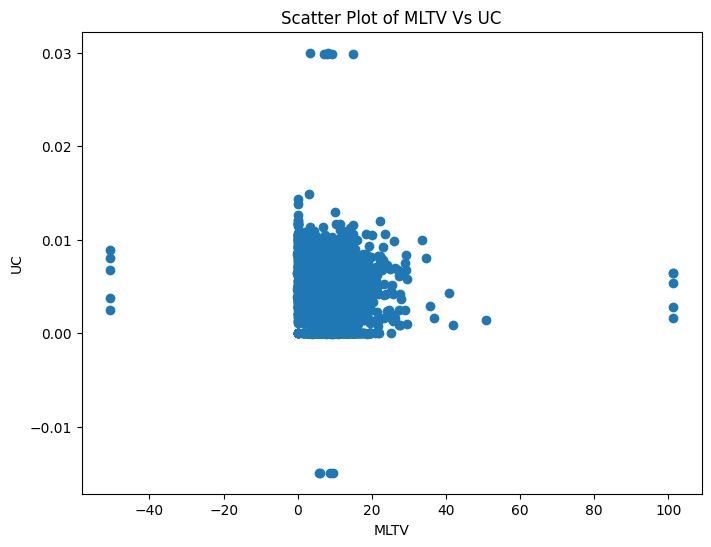

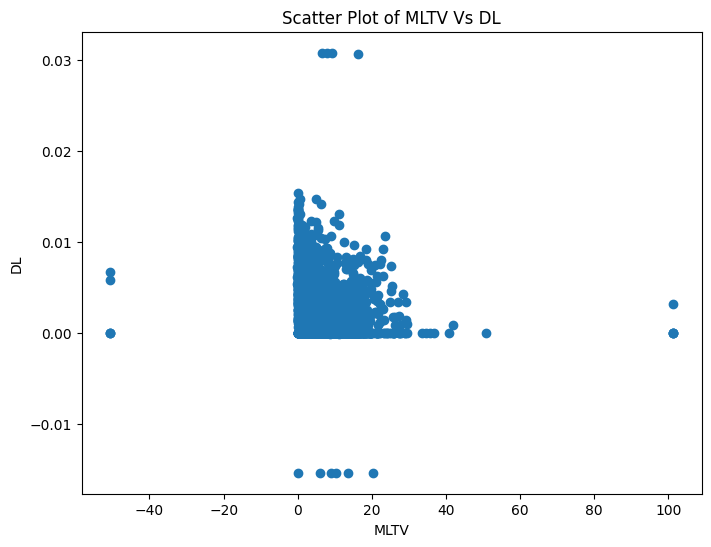

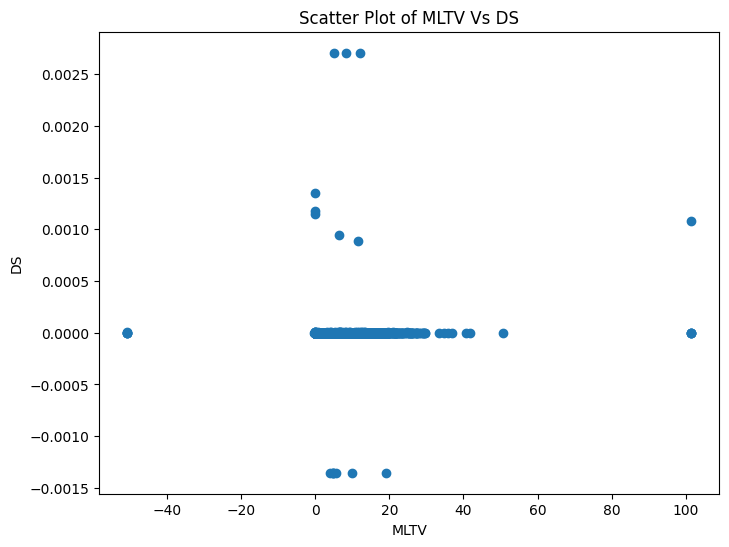

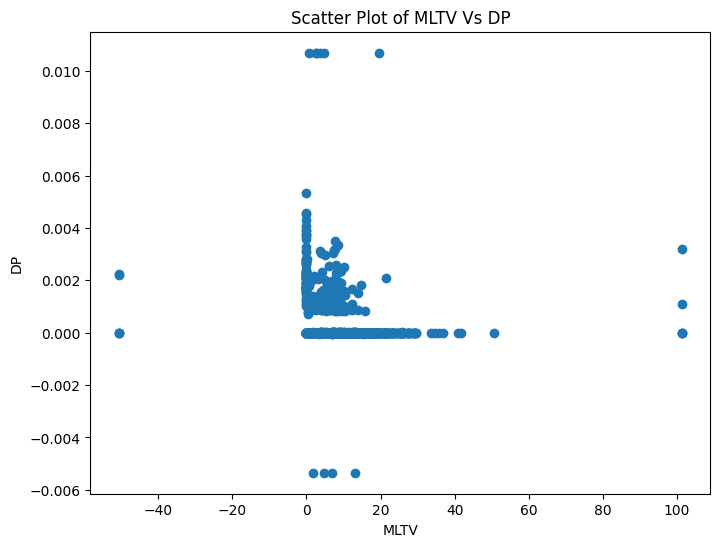

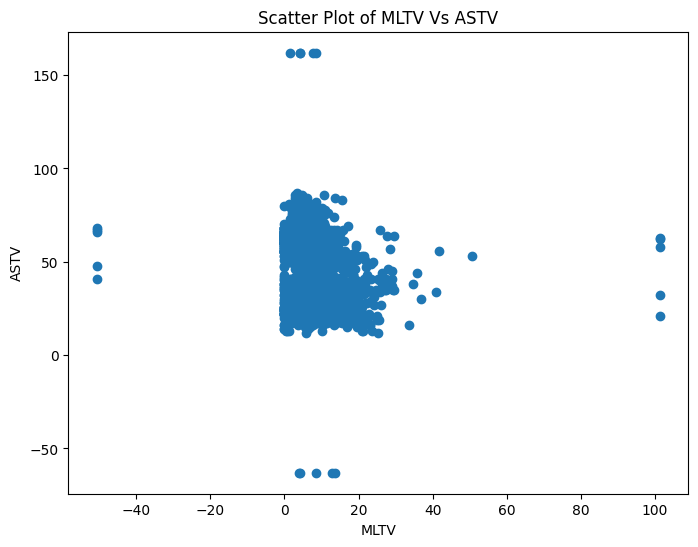

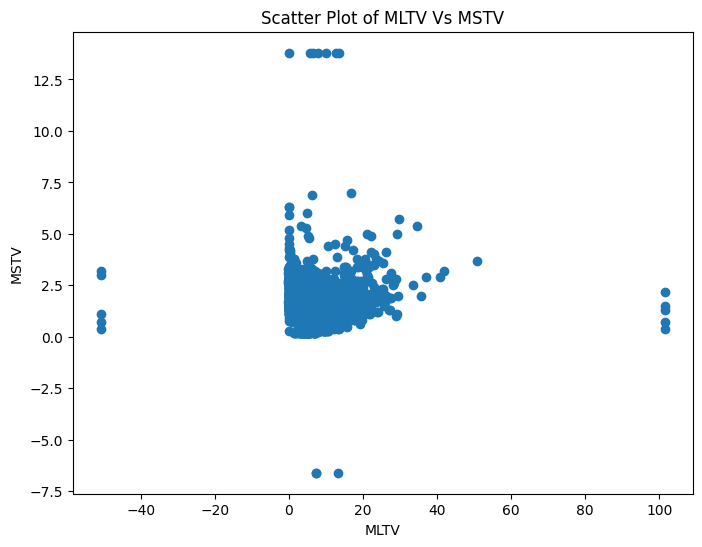

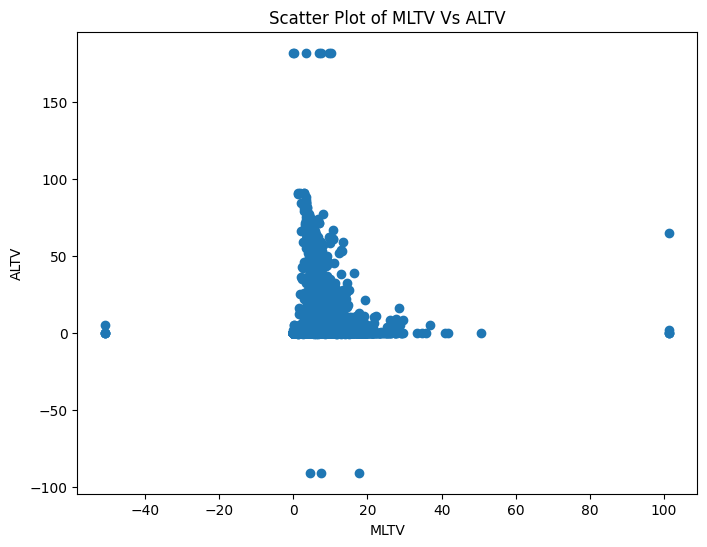

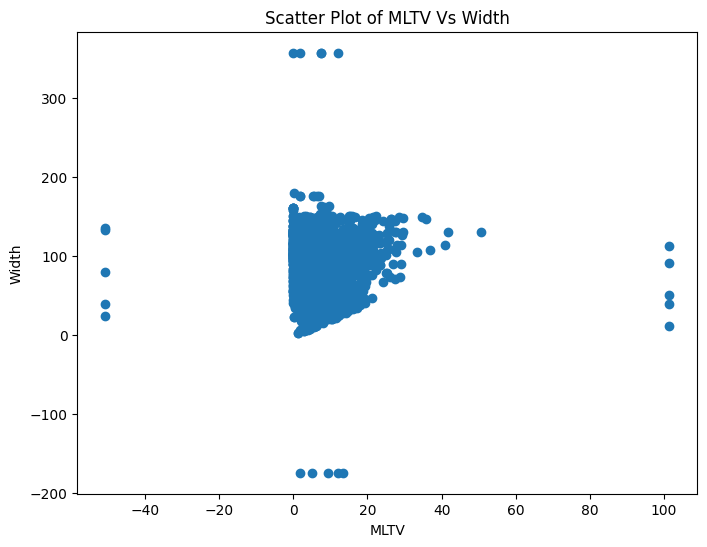

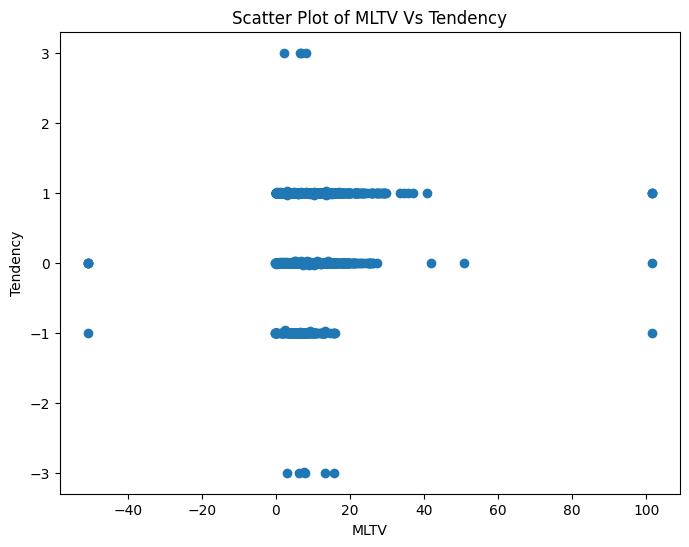

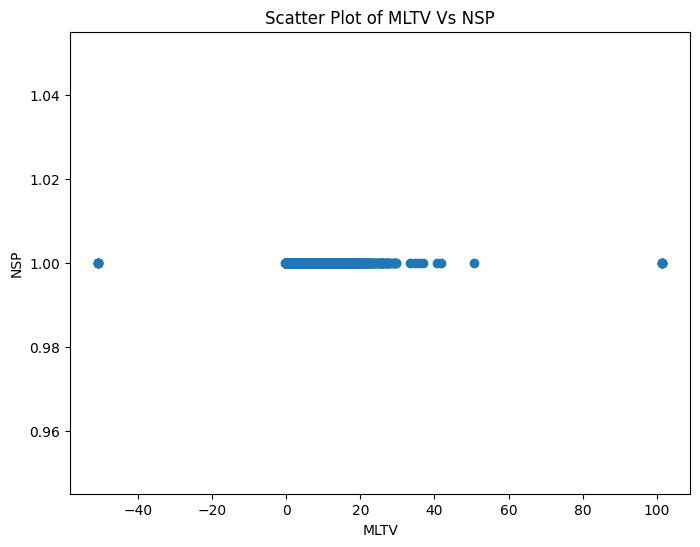

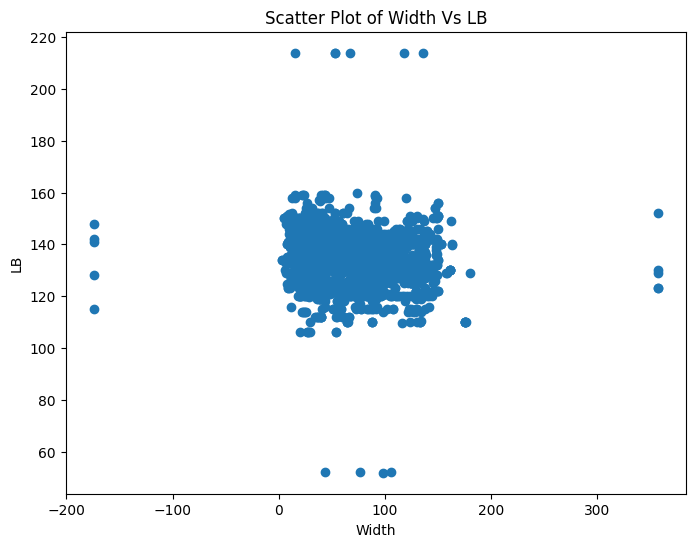

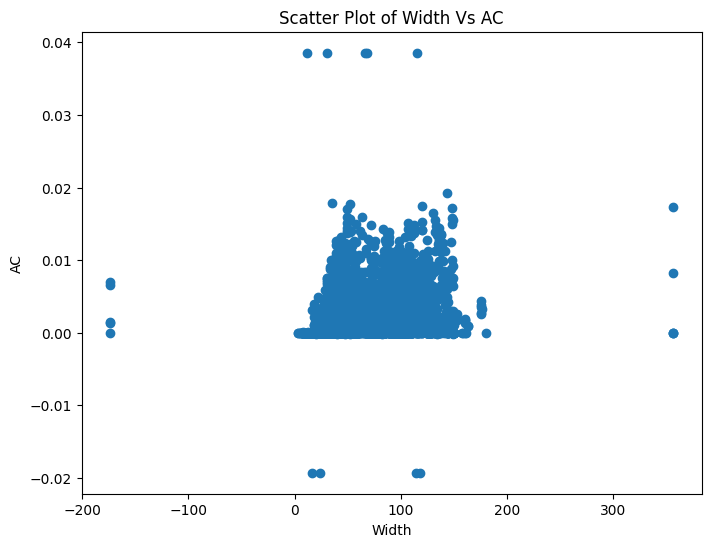

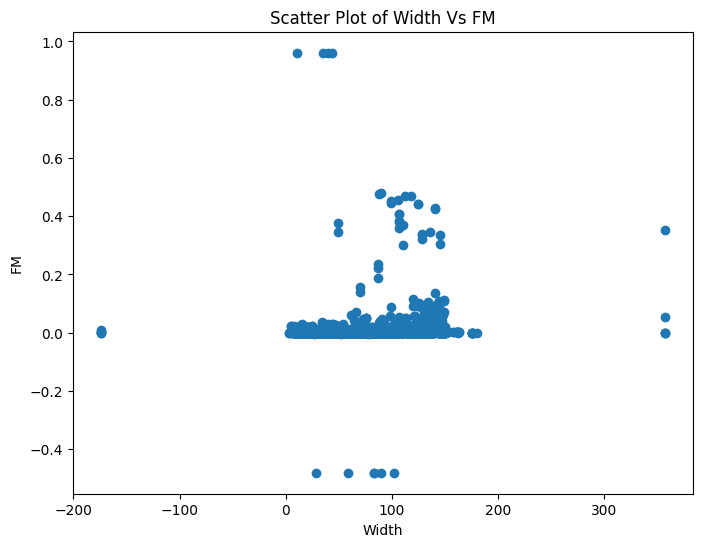

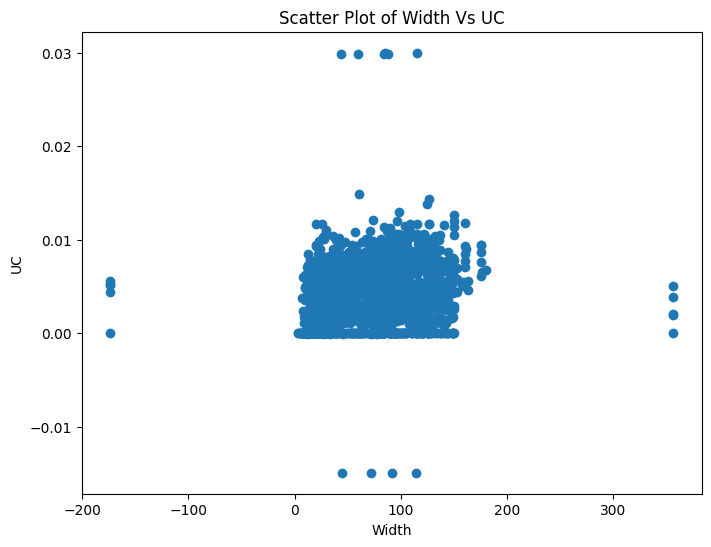

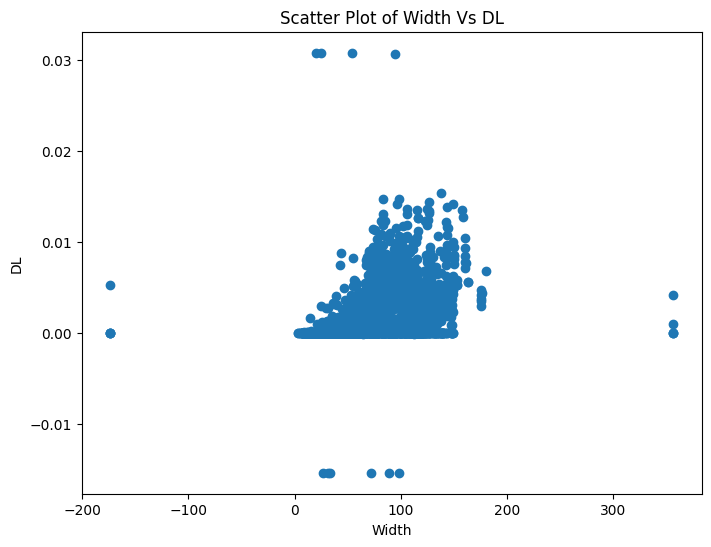

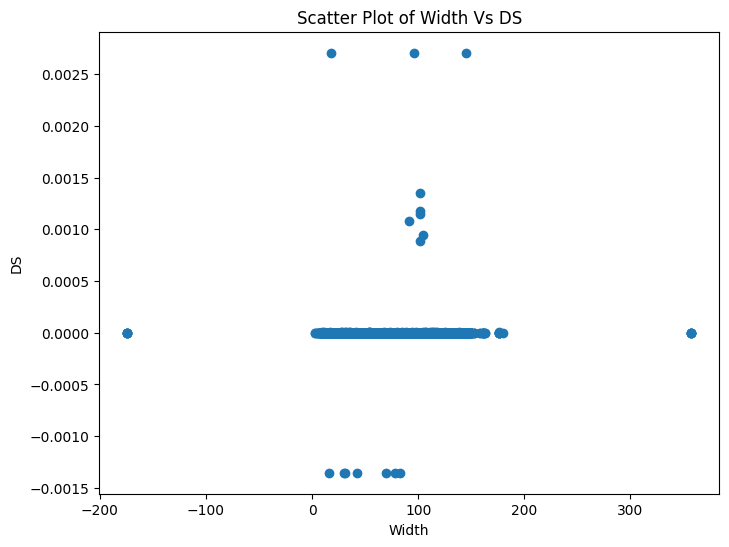

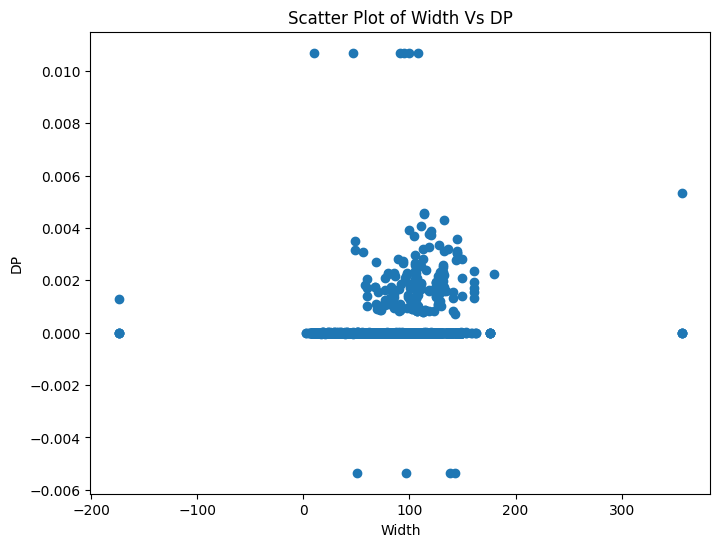

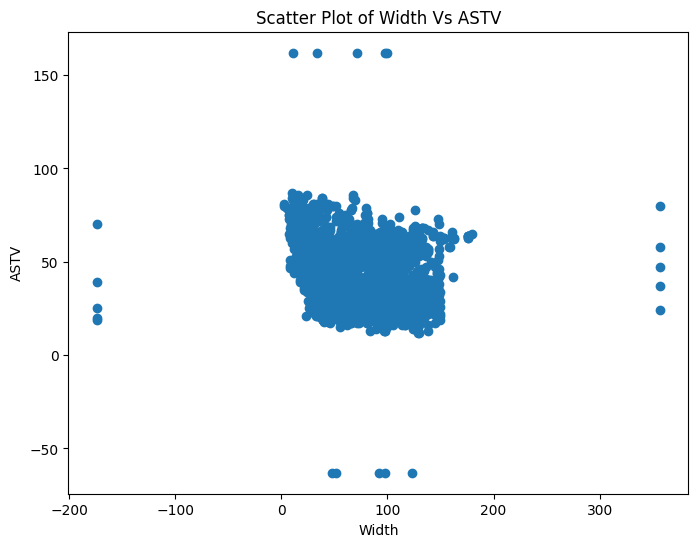

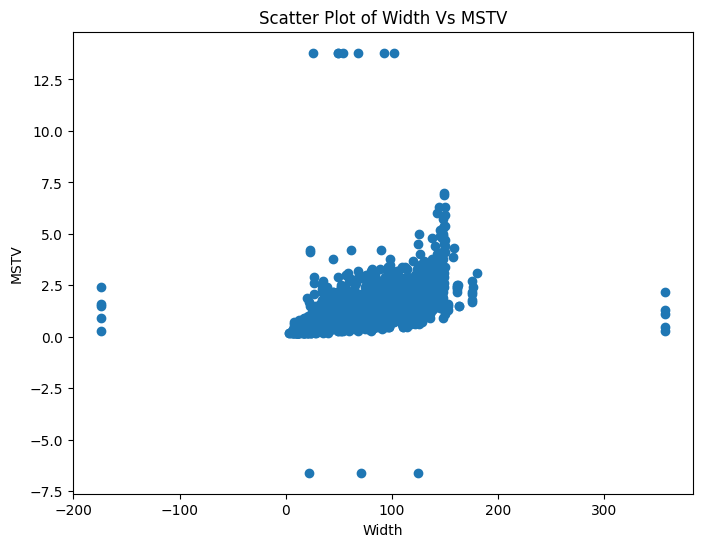

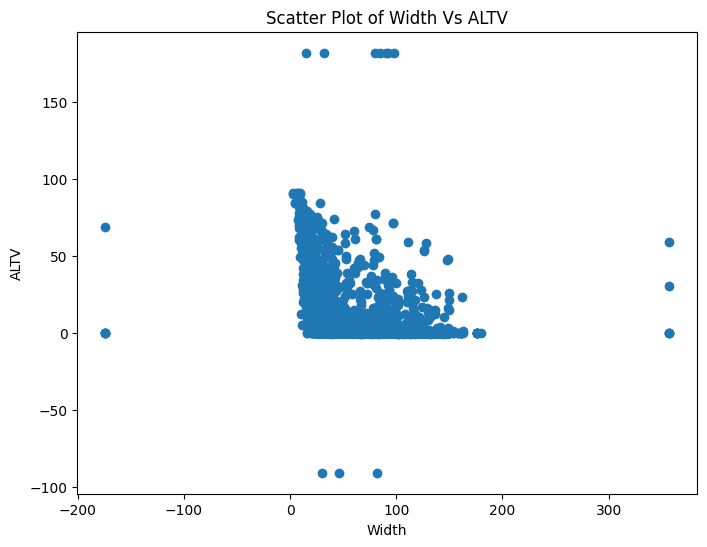

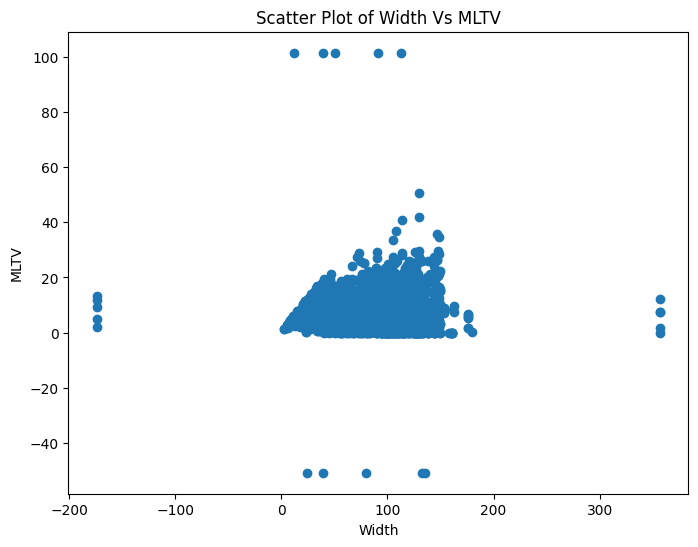

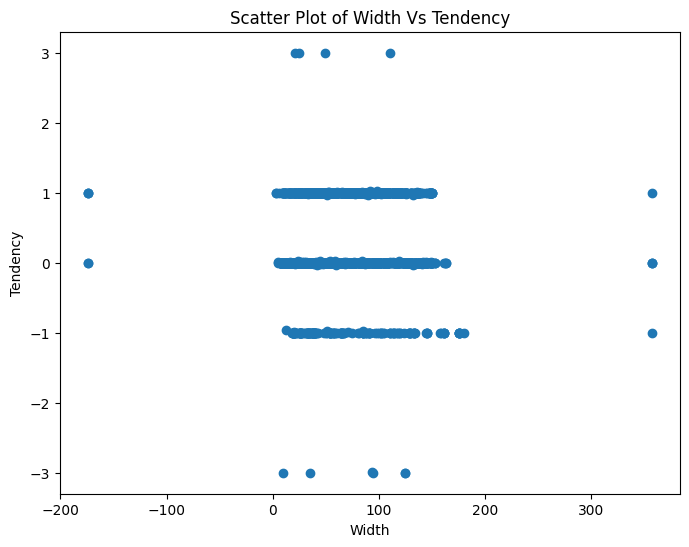

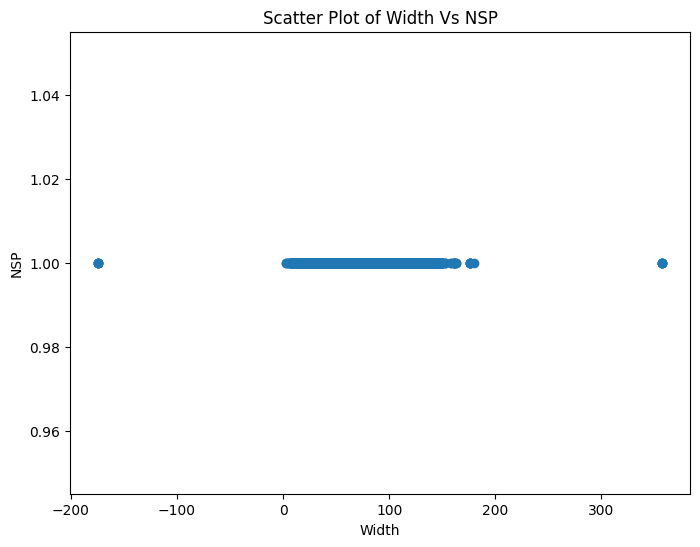

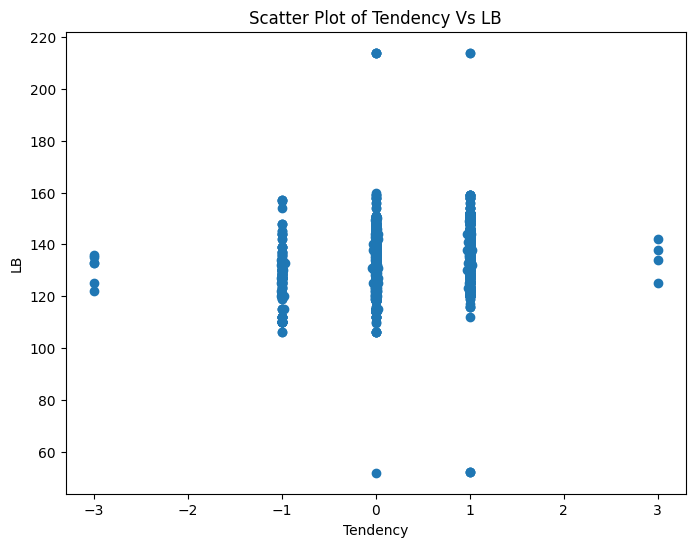

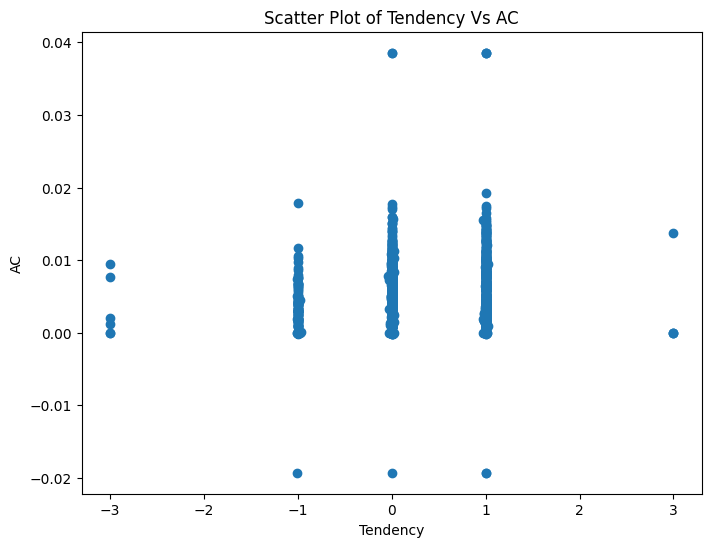

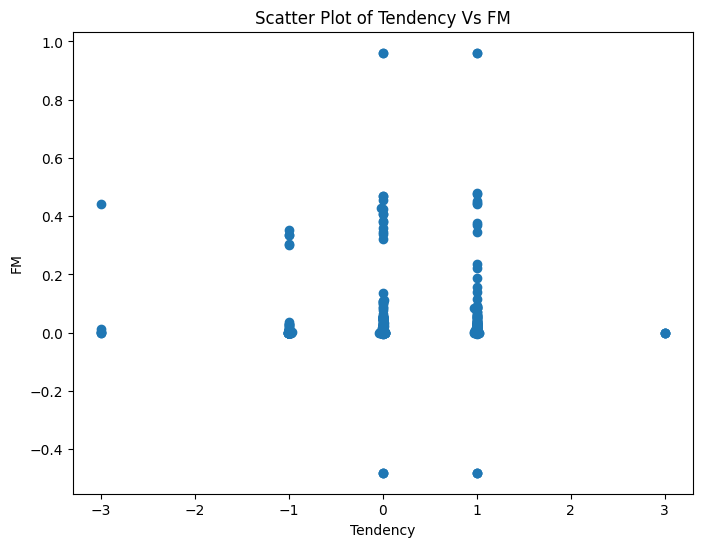

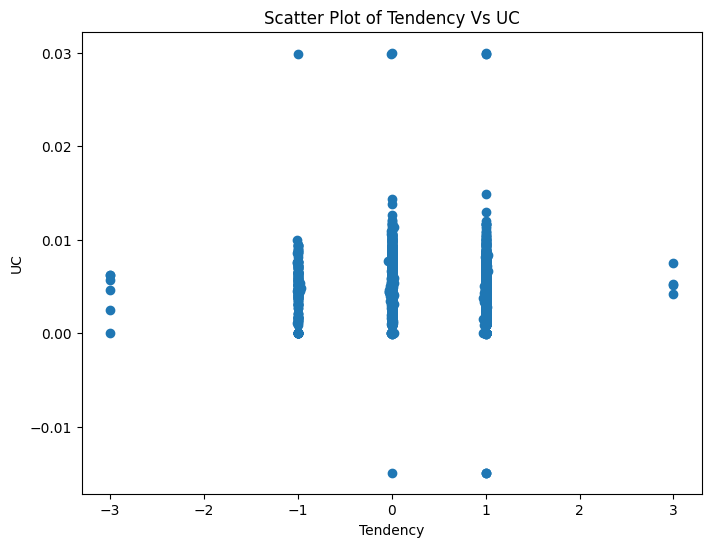

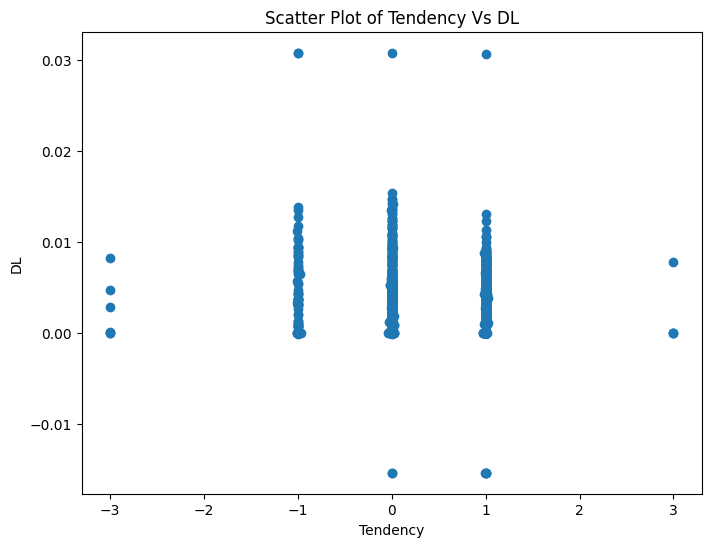

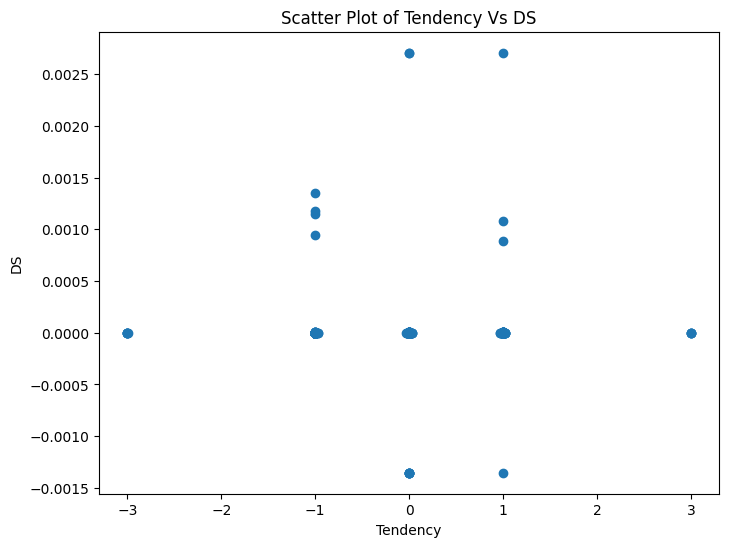

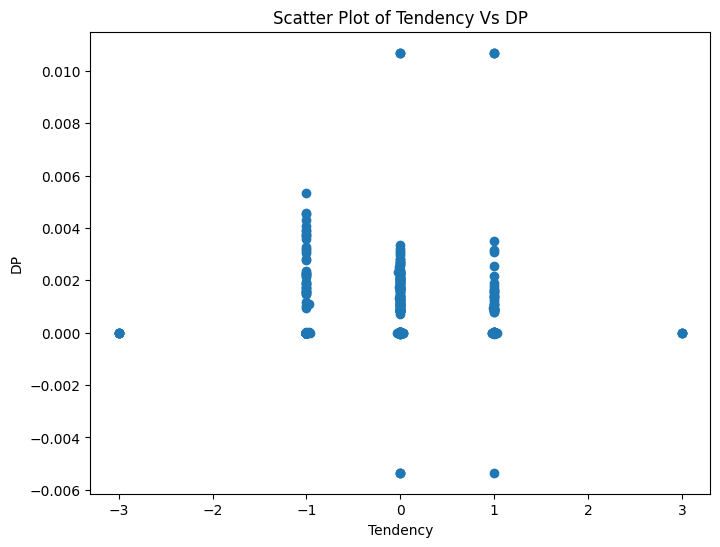

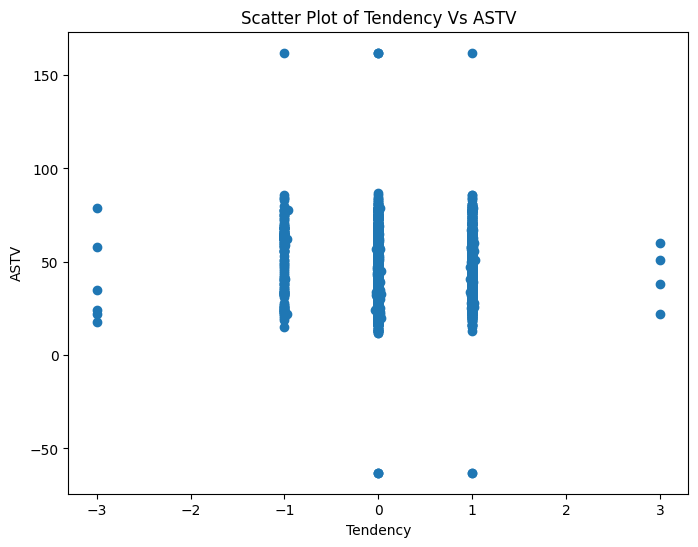

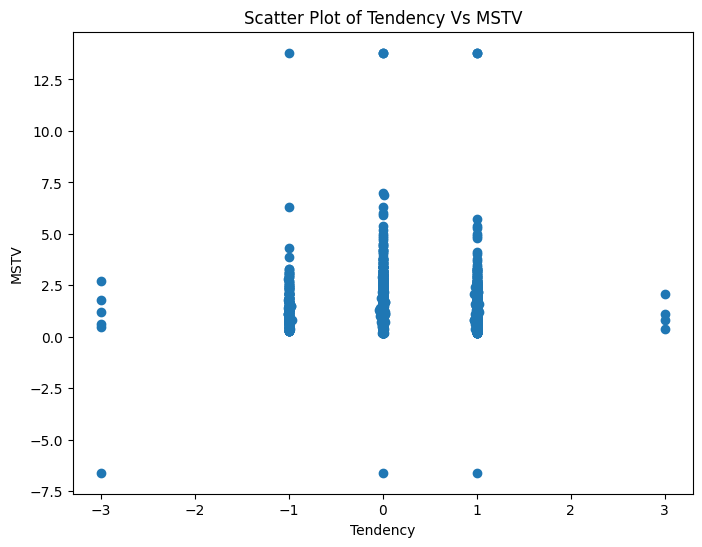

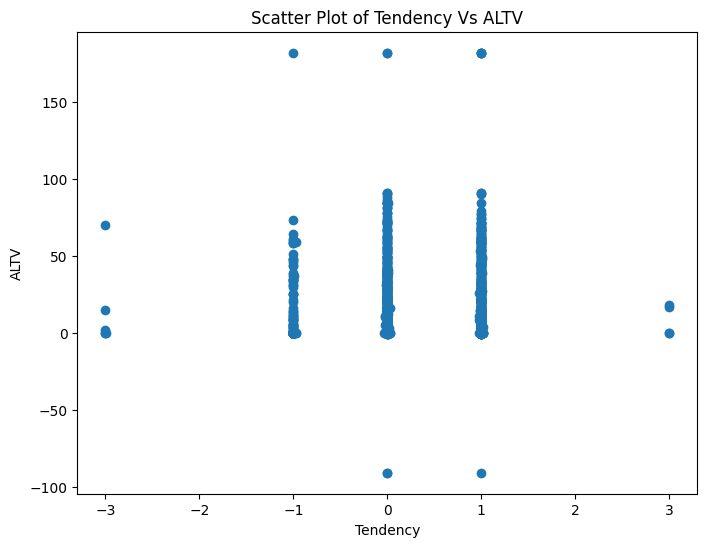

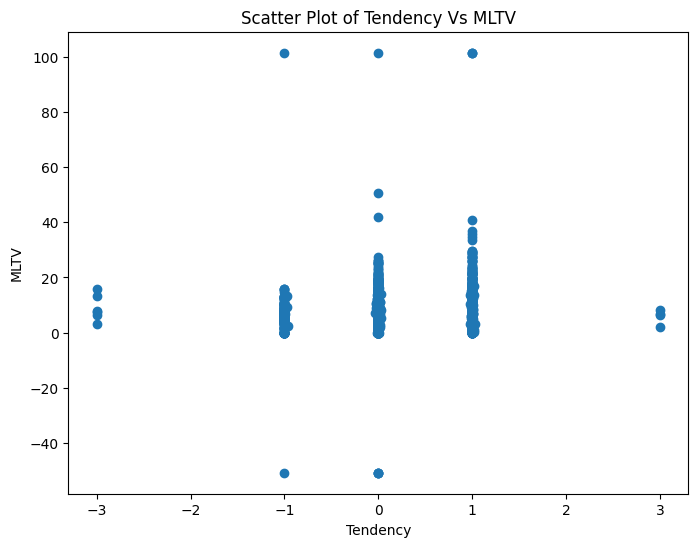

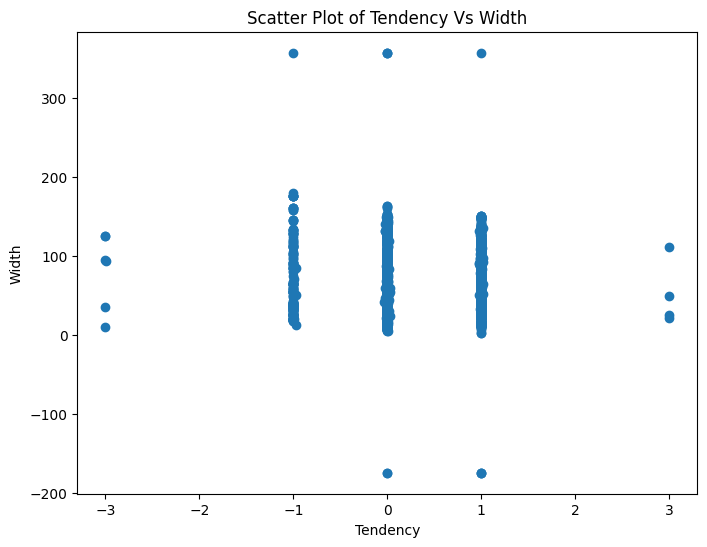

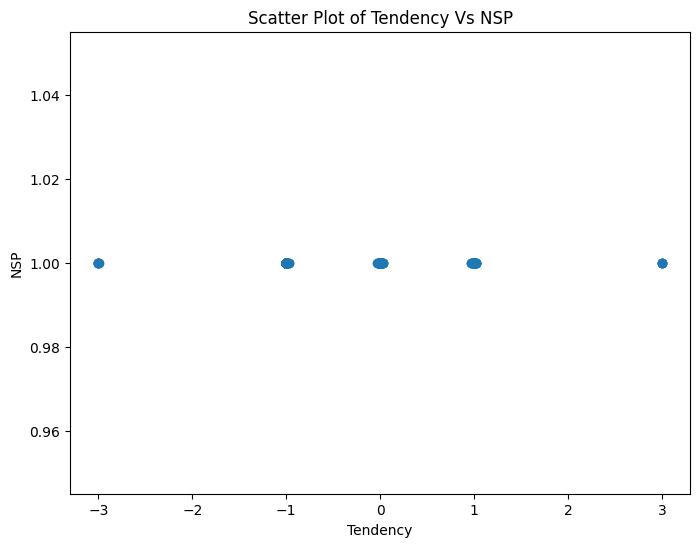

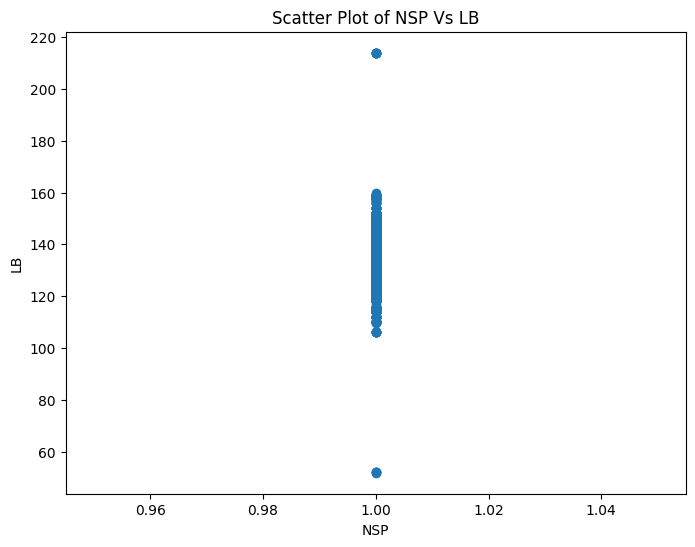

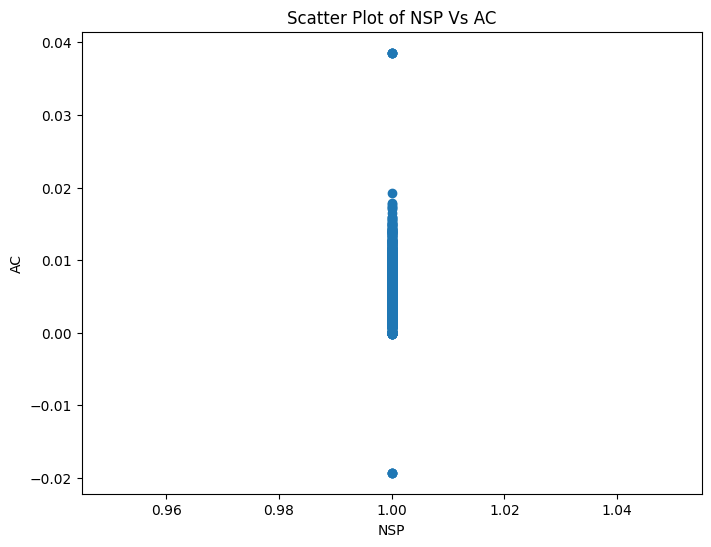

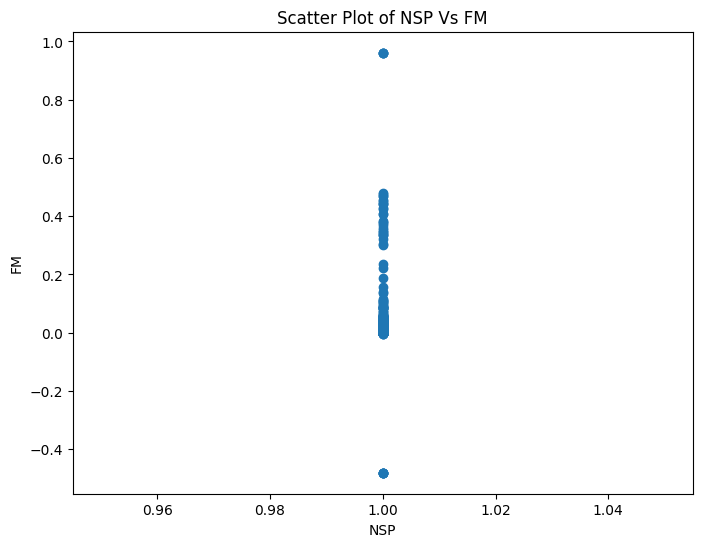

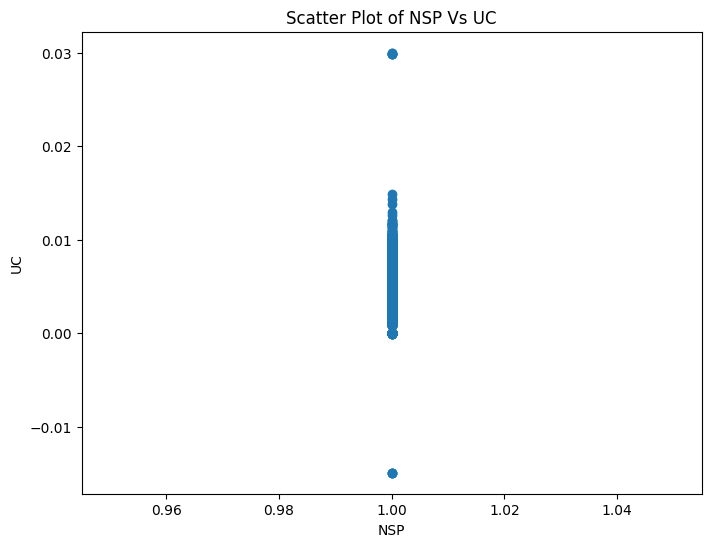

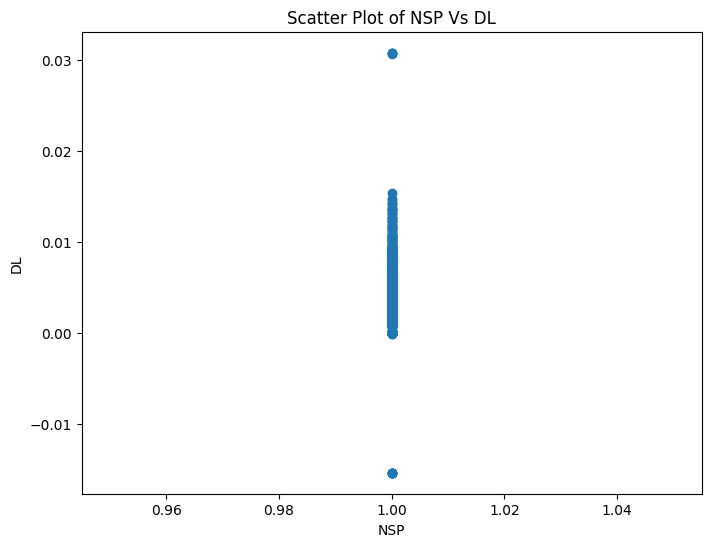

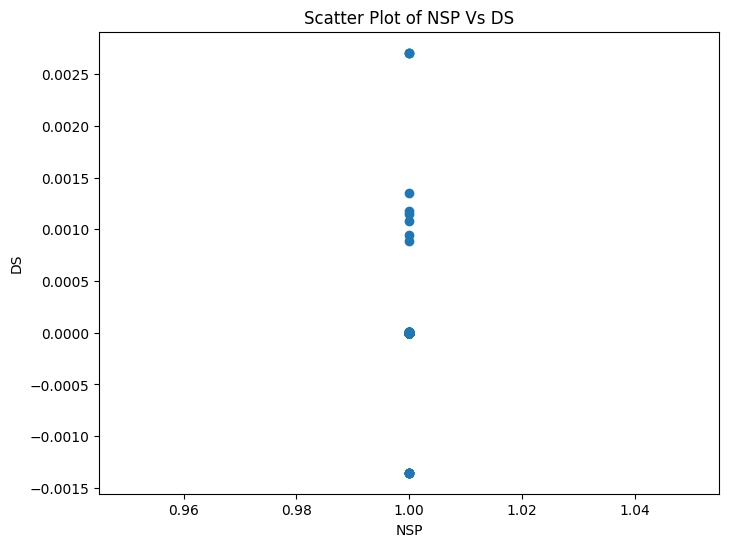

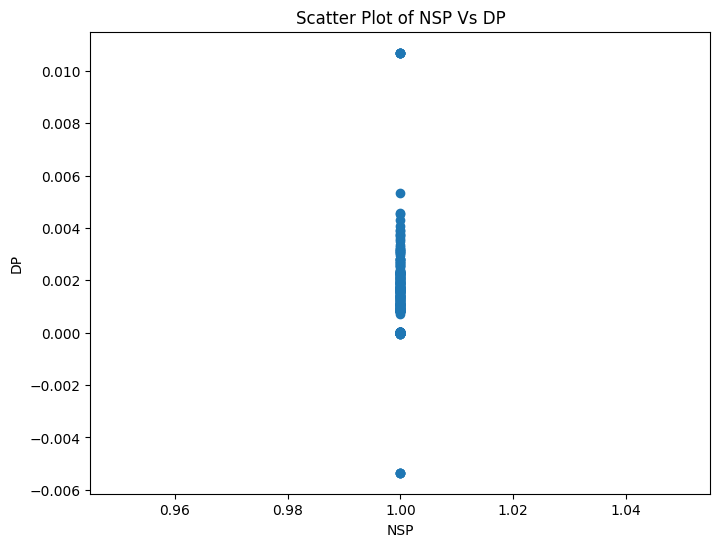

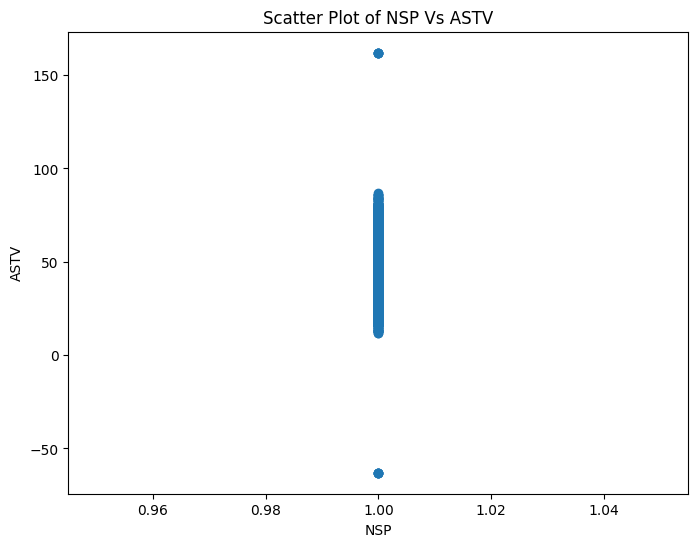

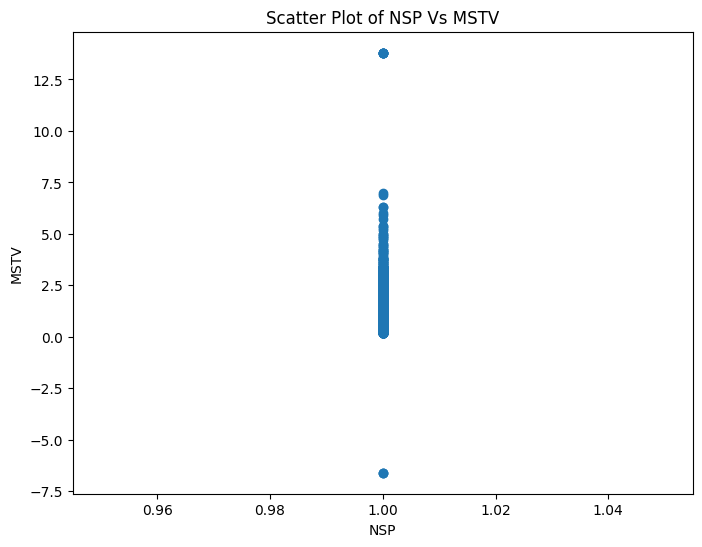

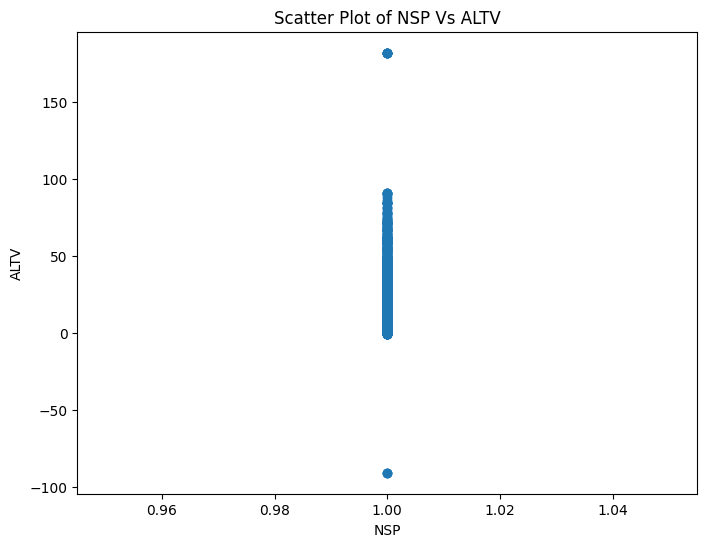

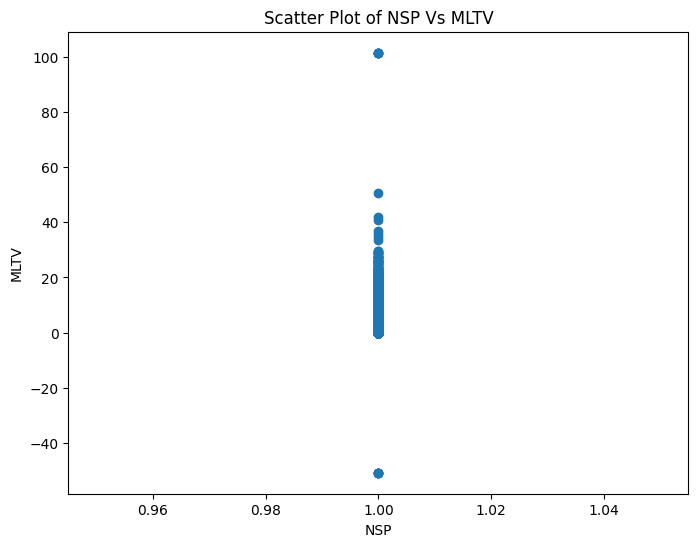

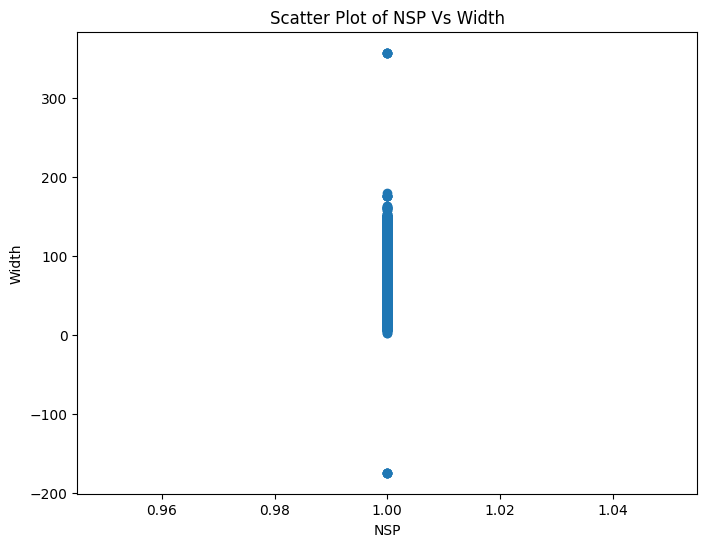

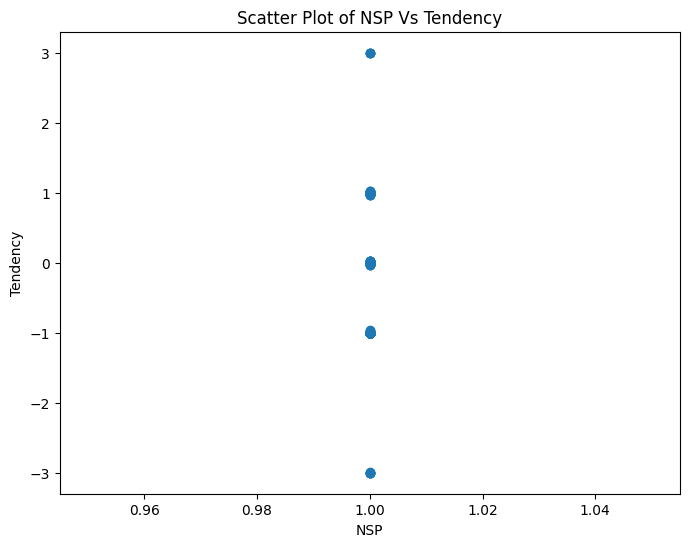

In [41]:
#Scatter plots between pairs of variables.

numerical_columns
for i, col1 in enumerate(numerical_columns):
  for j, col2 in enumerate(numerical_columns):
    if i != j:
      plt.figure(figsize=(8,6))
      plt.scatter(df[col1], df[col2])
      plt.title("Scatter Plot of {} Vs {}". format(col1, col2))
      plt.xlabel(col1)
      plt.ylabel(col2)
      plt.show()

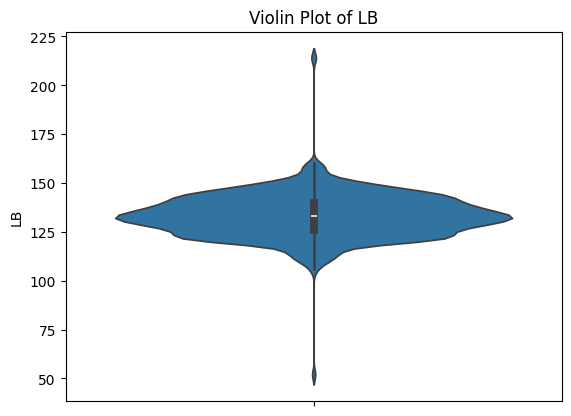

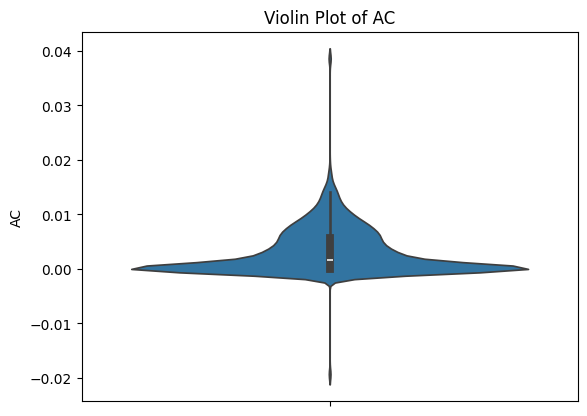

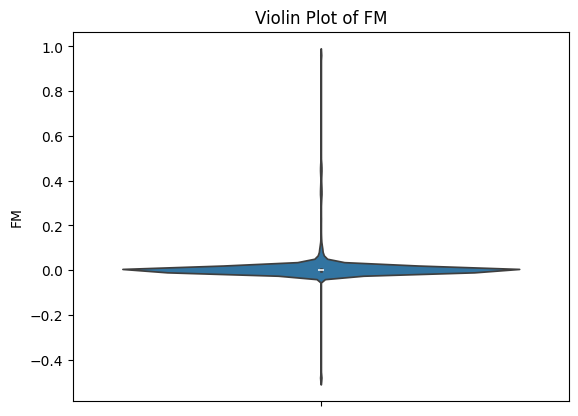

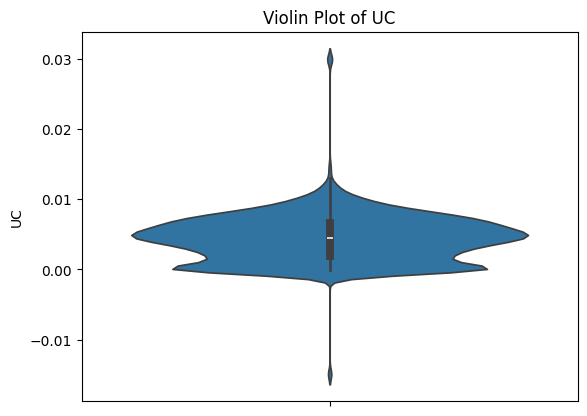

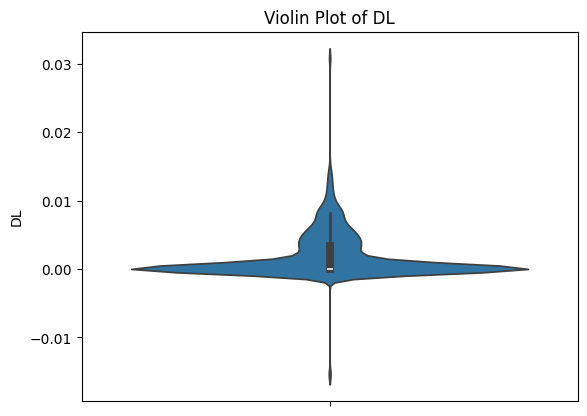

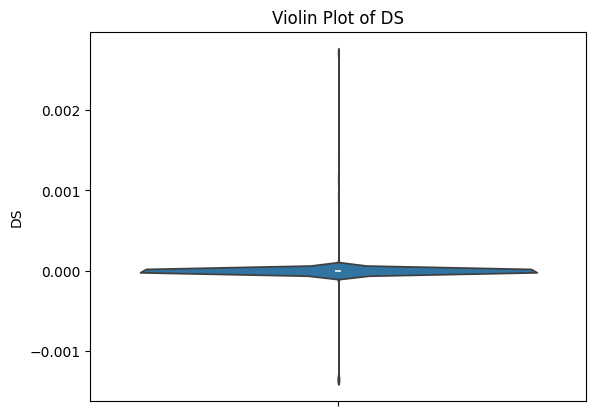

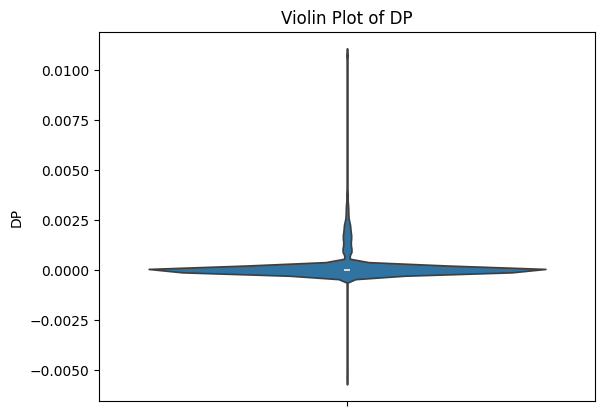

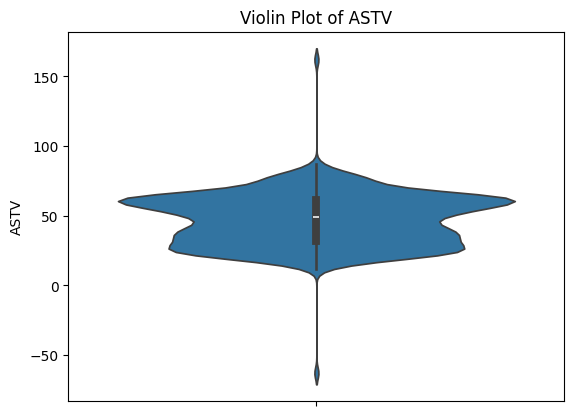

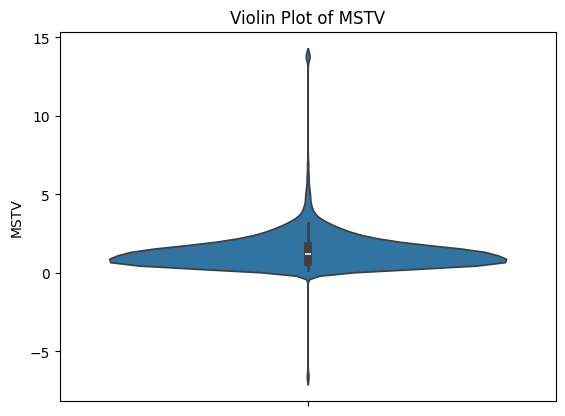

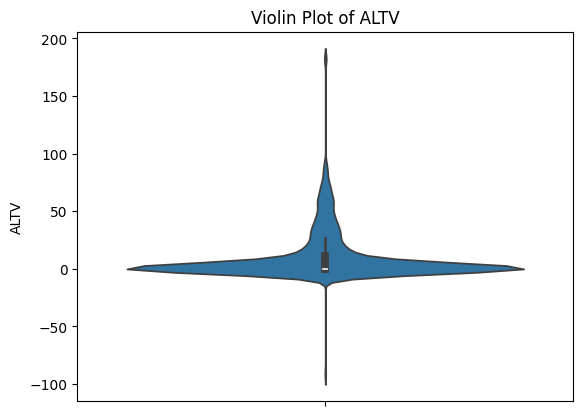

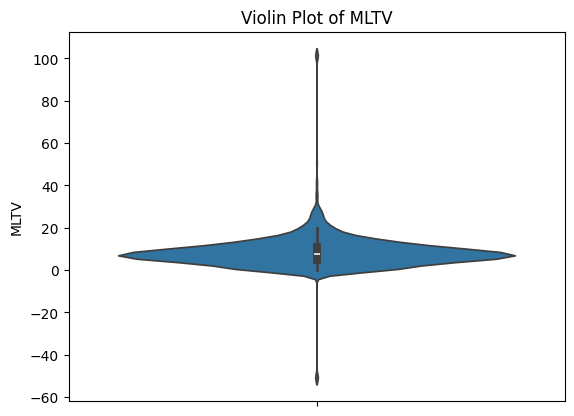

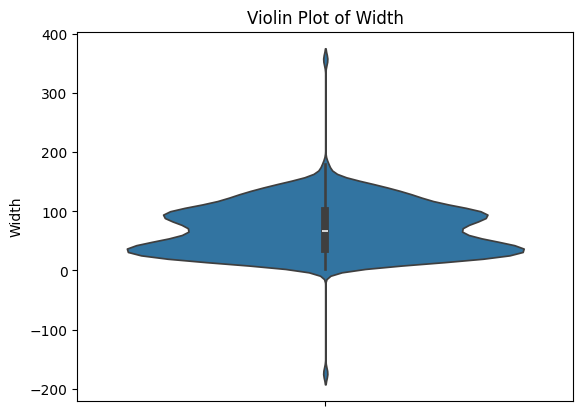

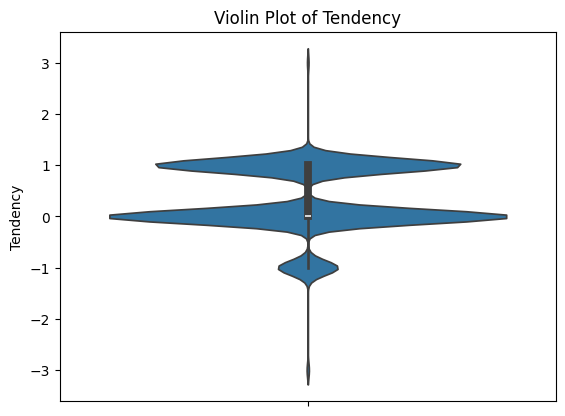

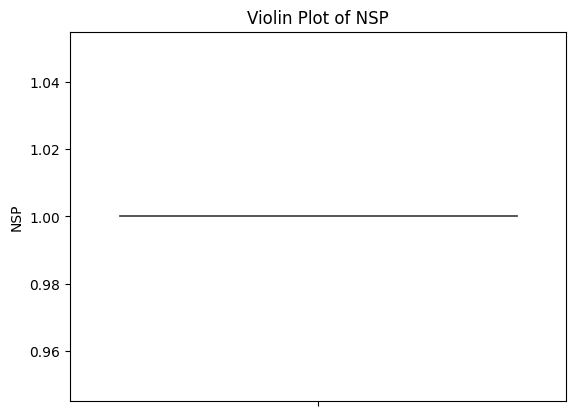

In [43]:
# Violin Plots between the variables
import seaborn as sns

for col in numerical_columns:
  sns.violinplot(y=col, data=df)
  plt.title("Violin Plot of {}". format(col))
  plt.show()



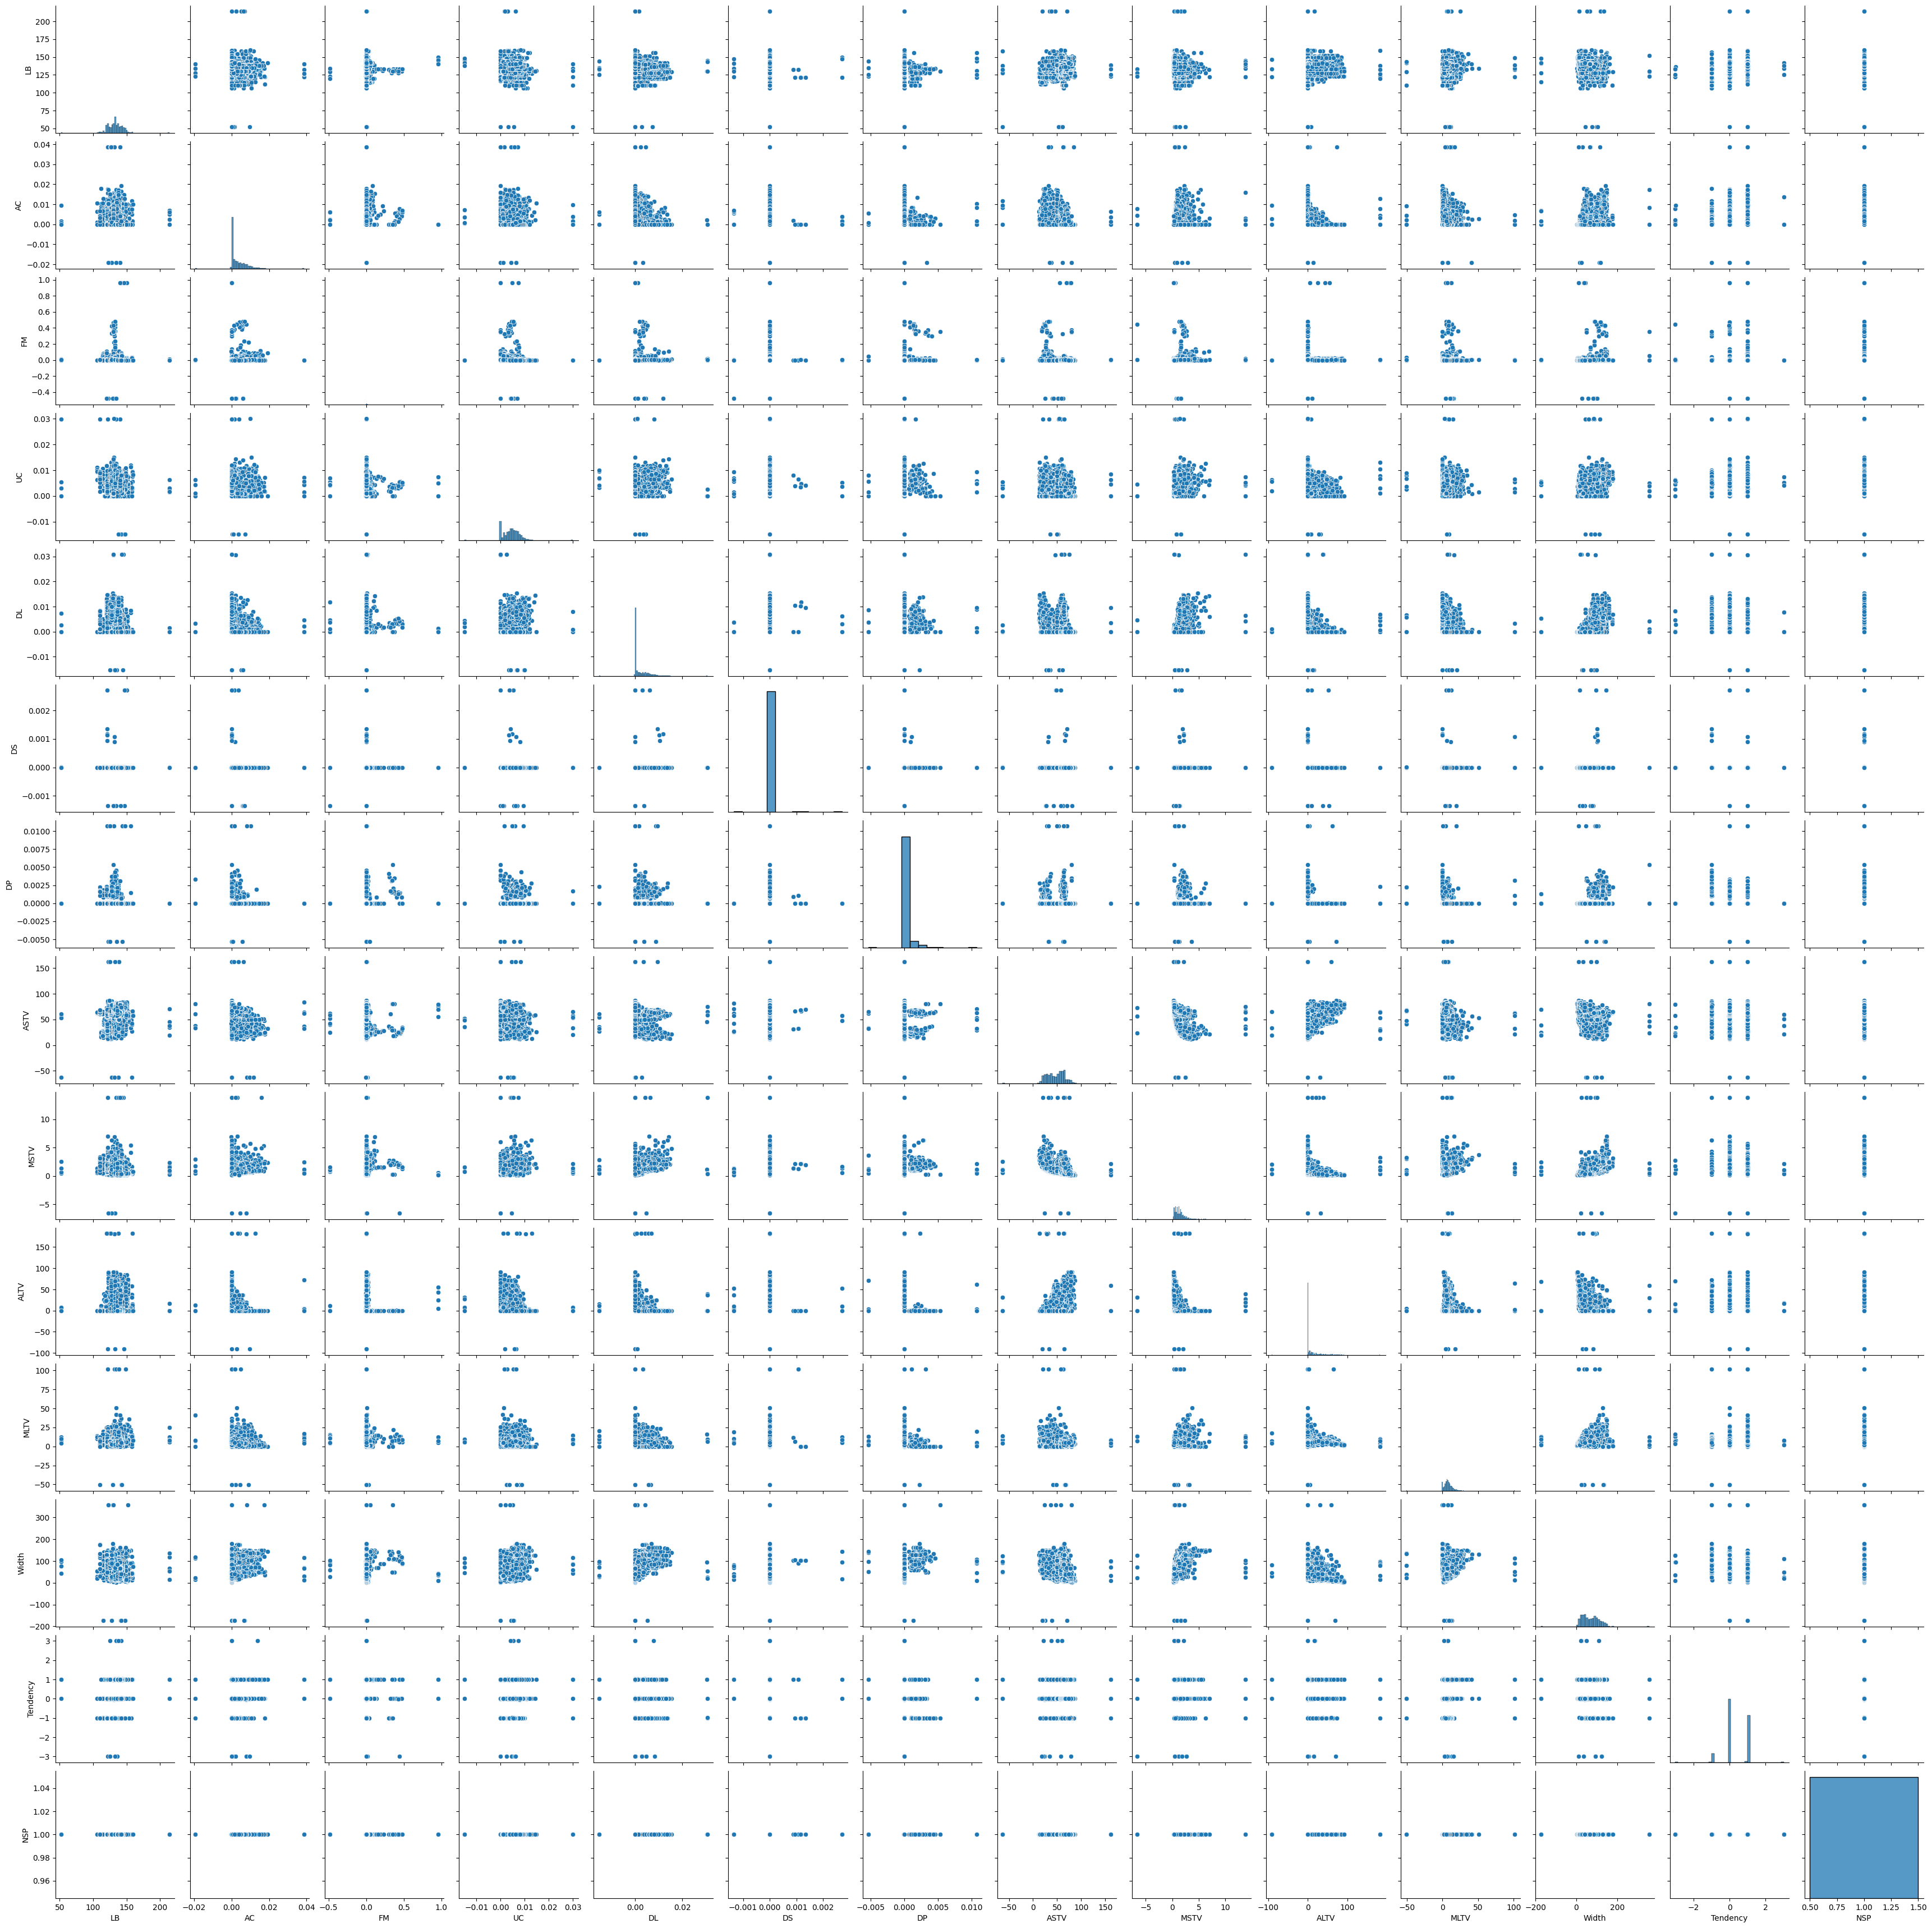

In [47]:
numerical_columns= df.select_dtypes(include=[np.number]).columns

sns.pairplot(df[numerical_columns])
plt.show()



In [49]:
df.corr()

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.010152  0.070135 -0.095491 -0.033623   
FM        0.018777  0.010152  1.000000 -0.052979  0.009830  0.029901   
UC       -0.166570  0.070135 -0.052979  1.000000  0.191864 -0.006937   
DL       -0.126959 -0.095491  0.009830  0.191864  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.230487 -0.032783 -0.181133 -0.070792  0.008452   
MSTV     -0.170473  0.126752  0.017481  0.190011  0.410155  0.016163   
ALTV      0.210728 -0.273890 -0.012276 -0.227817 -0.186571 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.015398   
NSP            NaN       NaN       NaN       NaN       NaN       NaN   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.047724  0.242625 -0.170473  0.210728 -0.003457 -0.118425   
AC       -0.084590 -0.230487  0.126752 -0.273890 -0.106529  0.238436   
FM        0.121284 -0.032783  0.017481 -0.012276 -0.006237  0.097213   
UC        0.070658 -0.181133  0.190011 -0.227817 -0.049460  0.107397   
DL        0.145425 -0.070792  0.410155 -0.186571 -0.165750  0.410031   
DS        0.004285  0.008452  0.016163 -0.004398  0.034349  0.040832   
DP        1.000000  0.038238  0.119892 -0.077758 -0.114084  0.175340   
ASTV      0.038238  1.000000 -0.293388  0.357668 -0.220427 -0.207599   
MSTV      0.119892 -0.293388  1.000000 -0.291362  0.028934  0.435393   
ALTV     -0.077758  0.357668 -0.291362  1.000000 -0.107712 -0.346460   
MLTV     -0.114084 -0.220427  0.028934 -0.107712  1.000000  0.058580   
Width     0.175340 -0.207599  0.435393 -0.346460  0.058580  1.000000   
Tendency -0.130395 -0.010927 -0.036857  0.036771  0.116361  0.081355   
NSP            NaN       NaN       NaN       NaN       NaN       NaN   

          Tendency  NSP  
LB        0.236864  NaN  
AC        0.032481  NaN  
FM       -0.018339  NaN  
UC       -0.066610  NaN  
DL       -0.023569  NaN  
DS       -0.015398  NaN  
DP       -0.130395  NaN  
ASTV     -0.010927  NaN  
MSTV     -0.036857  NaN  
ALTV      0.036771  NaN  
MLTV      0.116361  NaN  
Width     0.081355  NaN  
Tendency  1.000000  NaN  
NSP            NaN  NaN

In [55]:
# Calculate the correlation matrix

corr_matrix= df.corr()

highest_corr=corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
lowest_corr=corr_matrix.abs().unstack().sort_values().drop_duplicates()

print("Highest Correlations:")
print(highest_corr[1:])
print("\nLowest Correlations:")
print(lowest_corr[:1])


Highest Correlations:
MSTV  Width    0.435393
DL    MSTV     0.410155
      Width    0.410031
ALTV  ASTV     0.357668
      Width    0.346460
                 ...   
LB    DS       0.005438
DS    ALTV     0.004398
DP    DS       0.004285
LB    MLTV     0.003457
      NSP           NaN
Length: 79, dtype: float64

Lowest Correlations:
MLTV  LB    0.003457
dtype: float64


In [ ]:
# MSTV and Width have highest positive correlation with each other.
#ALTV and ASTV have highest positive correlation with each other.
#LB and DS, DS and ALTV, DP and DS, LB and MLTV have lowest positive correlation with each other


In [ ]:
#EDA Summary

Insights :
1). The dataset contains both numerical and categorical variables.
2). The numerical variables showing highest variance, standard deviation, and interquartile range which can be concluded as the data is non-normal distribution.
- Scatter plots and violin plots reveal varying relationships between pairs of variables.